<a href="https://colab.research.google.com/github/trang-hoang24/Python_Data-analysis-Covid-19Learning/blob/main/%5BTrang_Trinh_Hieu%5D_Finalised_Covid_19_Digital_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 LEARNING PROJECT

## SETTING UP

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
import numpy as np
import math

In [ ]:
# change according to each member's file path
PATH_TO_DB = '/content/drive/MyDrive/Data Science 02.22/FINAL PROJECT - COVID LEARNING/'

## DATA OVERVIEW

# I. Problem statement

Covid disrupts learning in the US since the Spring of 2020,  probably:
* Making the inequality in education access more serious and 
* Causing long-term loss in education


# II. Big Question


Whether the digital divide gap among students of different income groups in the US narrowed down or widened during Covid-19 time?

Sub-questions: 
- How did the online learning gap changed in 2020? 
- What caused the online learning gap? 



# III. **Original data**


### 3.1. Engagement data

* Page load events of over 10k edu tech products, collected through the LearnPlatforms’ Chrome Extension 
- Each file represents data from 1 school district 
* 233 school districts

* Description: 
    * **Time**: 	date in "YYYY-MM-DD"
    * **lp_id**: 	The unique identifier of the product
    * **Pct_access**: Percentage of students in the district have at least one page-load event of a given product and on a given day
    * **engagement_index**: Total page-load events per one thousand students of a given product and on a given day

* **NOTES**: 
    * *Cần tạo School ID để nối với file District
    * *Kích thước của mỗi file School Engagement rất lớn nên trước khi ghép file cần: 
        * Xác định xem muốn tập trung vào những school/ nhóm school nào 
        * Xử lý thông tin (groupby, probably ) trước khi ghép file 

In [ ]:
school_1000 = pd.read_csv(PATH_TO_DB+'DATA FILES/engagement_data/1000.csv')

In [ ]:
school_1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104003 entries, 0 to 104002
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time              104003 non-null  object 
 1   lp_id             104001 non-null  float64
 2   pct_access        104003 non-null  float64
 3   engagement_index  61655 non-null   float64
dtypes: float64(3), object(1)
memory usage: 3.2+ MB


In [ ]:
school_1000.head()

#VD: ngày 01/01/2020, có 3% học sinh trong quận đã mở ít nhất 1 trang của product 17941; 
# Ngày 01/01/2020, có 0.9 lần mở product 17941 trên 1000 học sinh trong quận 

school_1000[school_1000['time'] == '2020-01-02']['lp_id'].nunique()
# Có vẻ như báo cáo cho product theo từng ngày là unique, ie. mỗi ngày 1 product được báo cáo 1 lần 



362

### 3.2. District data

* Characteristics of districts 

* Description:

    * **district_id**: The unique identifier of the school district
    *  **state**: The state where the district resides in
    * **locale**: NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and Rural. 
    See Locale Boundaries User's Manual for more information.
    * **pct_black/hispanic**:	Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data
    * **pct_free/reduced**:	Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data
    * **countyconnectionsratio**: ratio (residential fixed high-speed connections over 200 kbps in at least one direction/households) based on the county level data from FCC From 477 (December 2018 version). See FCC data for more information.
    * **pptotalraw**: Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource Database on Schools (NERD$) project. The expenditure data are school-by-school, and we use the median value to represent the expenditure of a given school district.

* **NOTES**: 
 * Chỉ có 176 district có thông tin 
 * File District ghép với file Engagement bằng district_id aka tên file engagment 

In [ ]:
districts_info = pd.read_csv(PATH_TO_DB+'DATA FILES/districts_info.csv')

In [ ]:
districts_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


##3.3 Product data

In [ ]:
products_info = pd.read_csv(PATH_TO_DB+'DATA FILES/products_info.csv')

In [ ]:
products_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


# IV. DATA CLEANING


### DISTRICT DATA

In [ ]:
districts_info = pd.read_csv(PATH_TO_DB+"DATA FILES/districts_info.csv")

# Dropping districts with NaN states
districts_info = districts_info[districts_info.state.notna()].reset_index(drop=True)

districts_info = districts_info.dropna(subset=['pct_free/reduced'])

# Drop column county_connections_ratio which does not contain any valuable information
districts_info = districts_info.drop('county_connections_ratio', axis=1)

In [ ]:
districts_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 175
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   district_id         148 non-null    int64 
 1   state               148 non-null    object
 2   locale              148 non-null    object
 3   pct_black/hispanic  148 non-null    object
 4   pct_free/reduced    148 non-null    object
 5   pp_total_raw        92 non-null     object
dtypes: int64(1), object(5)
memory usage: 8.1+ KB


In [ ]:
# Clean cột black/hispanic 
def replace_ranges_pct(range_str):
    if range_str == '[0, 0.2[':
        return 0.1
    elif range_str == '[0.2, 0.4[':
        return 0.3
    elif range_str == '[0.4, 0.6[':
        return 0.5
    elif range_str == '[0.6, 0.8[':
        return 0.7
    elif range_str == '[0.8, 1[':
        return 0.9
    else:
        return np.nan
    
districts_info['new_pct_black/hispanic'] = districts_info['pct_black/hispanic'].apply(lambda x: replace_ranges_pct(x))

districts_info['new_pct_black/hispanic'].unique()

array([0.1, 0.3, 0.5, 0.9, 0.7])

In [ ]:
# Clean cột pct_free/reduced

def replace_ranges_pct(range_str):
    if range_str == '[0, 0.2[':
        return 0.1
    elif range_str == '[0.2, 0.4[':
        return 0.3
    elif range_str == '[0.4, 0.6[':
        return 0.5
    elif range_str == '[0.6, 0.8[':
        return 0.7
    elif range_str == '[0.8, 1[':
        return 0.9
    else:
        return np.nan
    
districts_info['new_pct_free/reduced'] = districts_info['pct_free/reduced'].apply(lambda x: replace_ranges_pct(x))

districts_info['new_pct_free/reduced'].unique()

array([0.1, 0.3, 0.5, 0.7, 0.9])

In [ ]:
districts_info.head()

def total_expenditure_cleaning(row): 
    if pd.isna(row) == False:
        a = row.strip('[').split(',')[0]
        b = row.strip('[').split(',')[1].strip(' ')
        c = (int(a)+int(b))/2
        return c
    else: 
        return np.nan

districts_info['new_pp_total_raw'] = districts_info['pp_total_raw'].apply(lambda x: total_expenditure_cleaning(x))

districts_info['new_pp_total_raw'].unique()

array([15000.,  7000., 11000.,  9000., 13000.,    nan, 21000., 19000.,
       23000., 17000.,  5000., 33000.])

In [ ]:
#Replace state strings with abbreviations
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'American Samoa': 'AS', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District Of Columbia': 'DC',
    'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Guam': 'GU', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Northern Mariana Islands':'MP', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Puerto Rico': 'PR', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virgin Islands': 'VI', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

districts_info['state_initial'] = districts_info['state'].replace(us_state_abbrev)

In [ ]:
districts_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 175
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   district_id             148 non-null    int64  
 1   state                   148 non-null    object 
 2   locale                  148 non-null    object 
 3   pct_black/hispanic      148 non-null    object 
 4   pct_free/reduced        148 non-null    object 
 5   pp_total_raw            92 non-null     object 
 6   new_pct_black/hispanic  148 non-null    float64
 7   new_pct_free/reduced    148 non-null    float64
 8   new_pp_total_raw        92 non-null     float64
 9   state_initial           148 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 12.7+ KB


In [ ]:
#Ghép bảng District vs Bảng state: 
state_info = pd.read_csv(PATH_TO_DB+'state_info.csv')

In [ ]:
state_info

,state,avg_poverty,avg_no_comp,avg_no_internet,avg_home_broad,avg_broad_avail,avg_access_bbn
0,California,0.143044,0.083924,0.150233,0.845930,0.956689,0.986406
1,Connecticut,0.100204,0.103784,0.157293,0.838444,0.991412,0.993728
2,Florida,0.147747,0.102529,0.189509,0.806231,0.965431,0.971582
3,Illinois,0.130527,0.115315,0.187288,0.808061,0.760500,0.968503
4,Indiana,0.141338,0.127506,0.216816,0.777076,0.722022,0.952259
5,Michigan,0.149658,0.118667,0.204497,0.790311,0.894051,0.943875
6,Missouri,0.141723,0.126083,0.217449,0.777118,0.608562,0.930155
7,New Hampshire,0.079032,0.077395,0.132311,0.862767,0.927888,0.966063
8,New Jersey,0.103928,0.098959,0.156147,0.840257,0.963526,0.993058
9,New York,0.146110,0.117105,0.186727,0.809456,0.655982,0.988170


In [ ]:
district_state = pd.merge(districts_info, state_info, how = 'left', on = 'state')

# district_state.to_csv(PATH_TO_DB+'district_state.csv', index = False)

In [ ]:
district_state

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw,new_pct_black/hispanic,new_pct_free/reduced,new_pp_total_raw,state_initial,avg_poverty,avg_no_comp,avg_no_internet,avg_home_broad,avg_broad_avail,avg_access_bbn
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000[",0.1,0.1,15000.0,IL,0.130527,0.115315,0.187288,0.808061,0.760500,0.968503
1,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[6000, 8000[",0.1,0.3,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.961070,0.983970
2,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[10000, 12000[",0.1,0.1,11000.0,WI,NaN,NaN,NaN,NaN,NaN,NaN
3,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[6000, 8000[",0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.961070,0.983970
4,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[8000, 10000[",0.3,0.3,9000.0,NC,0.153692,0.123827,0.210196,0.785462,0.766737,0.960590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,1705,Washington,City,"[0.2, 0.4[","[0.4, 0.6[","[12000, 14000[",0.3,0.5,13000.0,WA,0.114810,0.073508,0.131694,0.863714,0.947758,0.965674
144,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[18000, 20000[",0.1,0.5,19000.0,NY,0.146110,0.117105,0.186727,0.809456,0.655982,0.988170
145,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[12000, 14000[",0.1,0.5,13000.0,VA,0.109704,0.096915,0.168780,0.826518,0.783526,0.936789
146,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[",NaN,0.7,0.7,NaN,CA,0.143044,0.083924,0.150233,0.845930,0.956689,0.986406


### PRODUCT DATA

In [ ]:
products_info = pd.read_csv(PATH_TO_DB+'DATA FILES/products_info.csv')
products_info.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [ ]:
# Convert column names to lower case and replace spaces with underscores
products_info.columns = [f"{re.sub(' ', '_', col.lower())}" for col in products_info.columns]

In [ ]:
# Splitting up the primary essential functions
products_info['primary_function_main'] = products_info['primary_essential_function'].apply(lambda x: x.split(' - ')[0] if x == x else x)
products_info['primary_function_sub'] = products_info['primary_essential_function'].apply(lambda x: x.split(' - ')[1] if x == x else x)

# Synchronize similar values
products_info['primary_function_sub'] = products_info['primary_function_sub'].replace({'Sites, Resources & References' : 'Sites, Resources & Reference'})
products_info.drop("primary_essential_function", axis=1, inplace=True)

### ENGAGEMENT DATA

In [ ]:
###### engagement_data ######
temp = []

for district in (districts_info['district_id'].unique()):
    # change according to each member's path
    df = pd.read_csv(f'/content/drive/MyDrive/Data Science 02.22/FINAL PROJECT - COVID LEARNING/DATA FILES/engagement_data/{district}.csv', index_col=None, header=0)
    df["district_id"] = district
    if df.time.nunique() == 366:
        temp.append(df)

engagement = pd.concat(temp)
engagement = engagement.reset_index(drop=True)
del temp

In [ ]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12832256 entries, 0 to 12832255
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   lp_id             float64
 2   pct_access        float64
 3   engagement_index  float64
 4   district_id       int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 489.5+ MB


In [ ]:
#After cleaning data, only 112 school districts remained
engagement['district_id'].nunique()

112

In [ ]:
# Only consider engagement data with lp_id in products_info
engagement = engagement[engagement['lp_id'].isin(products_info['lp_id'].unique())].reset_index(drop=True)

In [ ]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6610517 entries, 0 to 6610516
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   lp_id             float64
 2   pct_access        float64
 3   engagement_index  float64
 4   district_id       int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 252.2+ MB


In [ ]:
# Convert time
engagement['time'] = engagement['time'].astype('datetime64[ns]')

# Create new features
engagement['cw'] = pd.DatetimeIndex(engagement['time']).week
engagement['weekday'] = pd.DatetimeIndex(engagement['time']).weekday

# Fill NaN in column engagement_index with 0
engagement['engagement_index'] = engagement['engagement_index'].fillna(0)

# # Resample average data on weekly basis
# engagement_cw = engagement.groupby(['cw', 'lp_id', 'district_id'])['pct_access', 'engagement_index'].mean().reset_index(drop=False)

# # Covid phase:
# # -1 : Summer break
# # 0 : Academic year 2019/20 before COVID-19
# # 1 : Academic year 2019/20 during COVID-19
# # 2 : Academic year 2020/21 during COVID-19
# engagement_cw['covid_phase'] = engagement_cw.cw.apply(lambda x: 0 if x < 10 else (2 if x > 35 else (1 if ((x>=10) & (x <=25)) else -1)))


# ###### Merge all dataframes to one big dataframe ######
# all_data = engagement_cw.merge(products_info[['lp_id', 'product_name', 'primary_function_main', 'primary_function_sub']], on='lp_id')
# all_data = all_data.merge(districts_info, on='district_id')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


In [ ]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6610517 entries, 0 to 6610516
Data columns (total 7 columns):
 #   Column            Dtype         
---  ------            -----         
 0   time              datetime64[ns]
 1   lp_id             float64       
 2   pct_access        float64       
 3   engagement_index  float64       
 4   district_id       int64         
 5   cw                int64         
 6   weekday           int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 353.0 MB


In [ ]:
engagement.head()

,time,lp_id,pct_access,engagement_index,district_id,cw,weekday
0,2020-01-01,15254.0,0.21,2.07,3710,1,2
1,2020-01-01,32213.0,0.62,12.40,3710,1,2
2,2020-01-01,16633.0,0.21,2.07,3710,1,2
3,2020-01-01,94324.0,0.21,6.20,3710,1,2
4,2020-01-01,64948.0,0.21,2.07,3710,1,2


In [ ]:
state_info

,state,avg_poverty,avg_no_comp,avg_no_internet,avg_home_broad,avg_broad_avail,avg_access_bbn
0,California,0.143044,0.083924,0.150233,0.845930,0.956689,0.986406
1,Connecticut,0.100204,0.103784,0.157293,0.838444,0.991412,0.993728
2,Florida,0.147747,0.102529,0.189509,0.806231,0.965431,0.971582
3,Illinois,0.130527,0.115315,0.187288,0.808061,0.760500,0.968503
4,Indiana,0.141338,0.127506,0.216816,0.777076,0.722022,0.952259
5,Michigan,0.149658,0.118667,0.204497,0.790311,0.894051,0.943875
6,Missouri,0.141723,0.126083,0.217449,0.777118,0.608562,0.930155
7,New Hampshire,0.079032,0.077395,0.132311,0.862767,0.927888,0.966063
8,New Jersey,0.103928,0.098959,0.156147,0.840257,0.963526,0.993058
9,New York,0.146110,0.117105,0.186727,0.809456,0.655982,0.988170


In [ ]:
engagement_full = engagement.merge(products_info, on='lp_id')
engagement_full = engagement_full.merge(districts_info, on='district_id')
engagement_full = engagement_full.merge(state_info, on='state')

In [ ]:
engagement_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6610517 entries, 0 to 6610516
Data columns (total 28 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   time                    datetime64[ns]
 1   lp_id                   float64       
 2   pct_access              float64       
 3   engagement_index        float64       
 4   district_id             int64         
 5   cw                      int64         
 6   weekday                 int64         
 7   url                     object        
 8   product_name            object        
 9   provider/company_name   object        
 10  sector(s)               object        
 11  primary_function_main   object        
 12  primary_function_sub    object        
 13  state                   object        
 14  locale                  object        
 15  pct_black/hispanic      object        
 16  pct_free/reduced        object        
 17  pp_total_raw            object        
 18  ne

In [ ]:
# engagement_full.to_csv(PATH_TO_DB+'Tableau/engagement_full.csv', index=False)

In [ ]:
id_unique = list(engagement_full['district_id'].unique())
id_unique

[3710,
 9812,
 7614,
 8328,
 5231,
 2165,
 7660,
 3692,
 7308,
 3864,
 7387,
 3772,
 9778,
 3160,
 9230,
 6762,
 1204,
 4668,
 4744,
 7541,
 1270,
 4183,
 2441,
 3266,
 7177,
 6584,
 7767,
 1044,
 4051,
 1742,
 2956,
 4348,
 5422,
 7457,
 2130,
 5510,
 1705,
 1904,
 8539,
 4520,
 7785,
 9589,
 1142,
 1444,
 4569,
 6250,
 1558,
 9140,
 4031,
 6194,
 1000,
 4516,
 5802,
 2729,
 1450,
 6055,
 6998,
 4083,
 3936,
 8076,
 8127,
 3640,
 3314,
 6046,
 5934,
 2201,
 2779,
 9043,
 6577,
 8784,
 2601,
 9899,
 4629,
 5890,
 9553,
 8937,
 2393,
 3248,
 1052,
 1549,
 1791,
 4929,
 7970,
 8425,
 2598,
 2991,
 5150,
 9537,
 7741,
 9478,
 8433,
 8256,
 2074,
 5604,
 3412,
 2321,
 2106,
 4550,
 3322,
 7975,
 7164,
 7798,
 3222,
 1536,
 1324,
 5627,
 3228,
 6919,
 1857,
 4314,
 6144,
 3732]

In [ ]:
districts_info_clean = districts_info[districts_info['district_id'].isin(id_unique)]
districts_info_clean

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw,new_pct_black/hispanic,new_pct_free/reduced,new_pp_total_raw,state_initial
3,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[6000, 8000[",0.1,0.5,7000.0,UT
4,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[8000, 10000[",0.3,0.3,9000.0,NC
5,9812,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[6000, 8000[",0.1,0.3,7000.0,UT
6,6584,North Carolina,Rural,"[0.4, 0.6[","[0.6, 0.8[","[8000, 10000[",0.5,0.7,9000.0,NC
7,1044,Missouri,Suburb,"[0, 0.2[","[0, 0.2[","[10000, 12000[",0.1,0.1,11000.0,MO
...,...,...,...,...,...,...,...,...,...,...
167,3266,Utah,Town,"[0, 0.2[","[0.4, 0.6[","[10000, 12000[",0.1,0.5,11000.0,UT
170,1705,Washington,City,"[0.2, 0.4[","[0.4, 0.6[","[12000, 14000[",0.3,0.5,13000.0,WA
173,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[12000, 14000[",0.1,0.5,13000.0,VA
174,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[",NaN,0.7,0.7,NaN,CA


In [ ]:
# districts_info_clean.to_csv(PATH_TO_DB+'Tableau/districts_info_clean.csv',index=False)

# V. FINAL DATA 

In [ ]:
#Bảng chính sử dụng: 
engagement_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6610517 entries, 0 to 6610516
Data columns (total 28 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   time                    datetime64[ns]
 1   lp_id                   float64       
 2   pct_access              float64       
 3   engagement_index        float64       
 4   district_id             int64         
 5   cw                      int64         
 6   weekday                 int64         
 7   url                     object        
 8   product_name            object        
 9   provider/company_name   object        
 10  sector(s)               object        
 11  primary_function_main   object        
 12  primary_function_sub    object        
 13  state                   object        
 14  locale                  object        
 15  pct_black/hispanic      object        
 16  pct_free/reduced        object        
 17  pp_total_raw            object        
 18  ne

In [ ]:
# # Đổi district id thành string: 
# engagement_full['district_id_str'] = engagement_full['district_id'].astype(str)

In [ ]:
engagement_full['state'].unique()

array(['Utah', 'North Carolina', 'Missouri', 'Washington', 'Connecticut',
       'Illinois', 'Virginia', 'Ohio', 'New Jersey', 'California',
       'New York', 'Indiana', 'Florida', 'New Hampshire', 'Michigan'],
      dtype=object)

In [ ]:
len(engagement_full['state'].unique())

15

In [ ]:
engagement_full[['pct_black/hispanic', 'pct_free/reduced', 'pp_total_raw']]

,pct_black/hispanic,pct_free/reduced,pp_total_raw
0,"[0, 0.2[","[0.4, 0.6[","[6000, 8000["
1,"[0, 0.2[","[0.4, 0.6[","[6000, 8000["
2,"[0, 0.2[","[0.4, 0.6[","[6000, 8000["
3,"[0, 0.2[","[0.4, 0.6[","[6000, 8000["
4,"[0, 0.2[","[0.4, 0.6[","[6000, 8000["
...,...,...,...
6610512,"[0.4, 0.6[","[0.4, 0.6[","[12000, 14000["
6610513,"[0.4, 0.6[","[0.4, 0.6[","[12000, 14000["
6610514,"[0.4, 0.6[","[0.4, 0.6[","[12000, 14000["
6610515,"[0.4, 0.6[","[0.4, 0.6[","[12000, 14000["


# VI. DATA ANALYSIS

## Tạo bảng engagement theo tuần và district

In [ ]:
engagement_full.head()

,time,lp_id,pct_access,engagement_index,district_id,cw,weekday,url,product_name,provider/company_name,...,new_pct_black/hispanic,new_pct_free/reduced,new_pp_total_raw,state_initial,avg_poverty,avg_no_comp,avg_no_internet,avg_home_broad,avg_broad_avail,avg_access_bbn
0,2020-01-01,15254.0,0.21,2.07,3710,1,2,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,...,0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.96107,0.98397
1,2020-01-04,15254.0,0.41,20.66,3710,1,5,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,...,0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.96107,0.98397
2,2020-01-05,15254.0,0.21,37.19,3710,1,6,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,...,0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.96107,0.98397
3,2020-01-06,15254.0,0.21,6.19,3710,2,0,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,...,0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.96107,0.98397
4,2020-01-07,15254.0,0.21,134.02,3710,2,1,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,...,0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.96107,0.98397


In [ ]:
# Tạo bảng engagement theo tuần và district
engagement_week = engagement_full.groupby(['cw', 'district_id'])['engagement_index'].sum().reset_index()
engagement_week['engagement_index'].describe()

count    5.936000e+03
mean     2.195864e+05
std      2.139976e+05
min      0.000000e+00
25%      3.576935e+04
50%      1.594153e+05
75%      3.520090e+05
max      1.404032e+06
Name: engagement_index, dtype: float64

In [ ]:
engagement_week.head()

,cw,district_id,engagement_index
0,1,1000,60677.44
1,1,1044,10626.68
2,1,1052,5948.92
3,1,1142,605.35
4,1,1204,851.68


In [ ]:
# Ghép thông tin engagement_week với thông tin district: 

district_state = pd.read_csv(PATH_TO_DB+'district_state.csv')

engagement_weekfull = pd.merge(engagement_week, district_state, how = 'left', on = 'district_id')

engagement_weekfull.head()

,cw,district_id,engagement_index,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw,new_pct_black/hispanic,new_pct_free/reduced,new_pp_total_raw,state_initial,avg_poverty,avg_no_comp,avg_no_internet,avg_home_broad,avg_broad_avail,avg_access_bbn
0,1,1000,60677.44,Connecticut,Suburb,"[0.6, 0.8[","[0.2, 0.4[",NaN,0.7,0.3,NaN,CT,0.100204,0.103784,0.157293,0.838444,0.991412,0.993728
1,1,1044,10626.68,Missouri,Suburb,"[0, 0.2[","[0, 0.2[","[10000, 12000[",0.1,0.1,11000.0,MO,0.141723,0.126083,0.217449,0.777118,0.608562,0.930155
2,1,1052,5948.92,Illinois,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[16000, 18000[",0.3,0.3,17000.0,IL,0.130527,0.115315,0.187288,0.808061,0.760500,0.968503
3,1,1142,605.35,Connecticut,Rural,"[0, 0.2[","[0.2, 0.4[",NaN,0.1,0.3,NaN,CT,0.100204,0.103784,0.157293,0.838444,0.991412,0.993728
4,1,1204,851.68,Utah,Suburb,"[0, 0.2[","[0, 0.2[","[6000, 8000[",0.1,0.1,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.961070,0.983970


In [ ]:
# Total number of states 
engagement_weekfull['state'].nunique()

15

In [ ]:
# Total number of districts 
engagement_weekfull['district_id'].nunique()

112

In [ ]:
# engagement_weekfull.to_csv(PATH_TO_DB+'Tableau/engagement_weekfull.csv', index = False)

## Online learning gap - overview


In [ ]:
# Tình trạng digitial divide trước covid: 

# # Về pct_access: 

# change = engagement_weekfull[(engagement_weekfull['cw']==1) | (engagement_weekfull['cw']==51)]

# gap = change.groupby('cw')['pct_access'].describe()
# gap['range'] = gap['max'] - gap['min']


# plt.figure(figsize = (30,10))

# plt.subplot(121)
# sns.histplot(data = change[change['cw']==1], 
#               x = 'pct_access')

# plt.title('Distribution of pct_access at the beginning')

# plt.subplot(122)
# sns.histplot(data = change[change['cw']==51], 
#               x = 'pct_access')
# plt.title('Distribution of pct_access at the end')

Text(0.5, 1.0, 'Distribution of engagement index at the end')

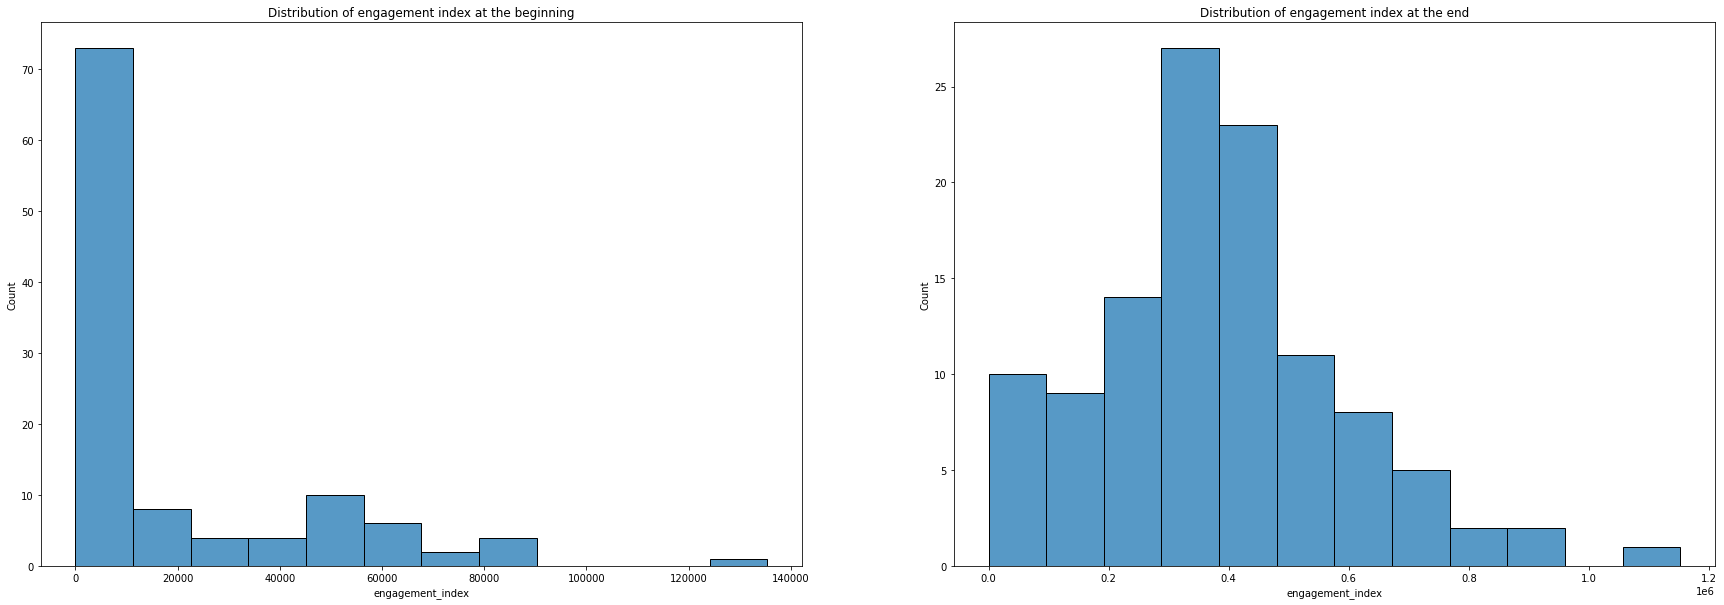

In [ ]:
# Về engagement: 
change = engagement_weekfull[(engagement_weekfull['cw']==1) | (engagement_weekfull['cw']==51)]

gap = change.groupby('cw')['engagement_index'].describe()
gap['range'] = gap['max'] - gap['min']


plt.figure(figsize = (30,10))

plt.subplot(121)
sns.histplot(data = change[change['cw']==1], 
              x = 'engagement_index')

plt.title('Distribution of engagement index at the beginning')

plt.subplot(122)
sns.histplot(data = change[change['cw']==51], 
              x = 'engagement_index')
plt.title('Distribution of engagement index at the end')

## Online learning gap - by state 

In [ ]:
# Về engagement_index: 
engagement_state = engagement_full.groupby(['cw', 'district_id', 'state'])['engagement_index'].sum().reset_index()

change = engagement_state[(engagement_week['cw']==1) | (engagement_week['cw']==51)]

gap = change.groupby(['cw', 'state'])['engagement_index'].describe()
gap['range'] = gap['max'] - gap['min']

gap_state = gap[['count', 'mean', 'std', 'range']]

In [ ]:
state_compare = pd.pivot_table(data = gap_state, 
               index = 'state', 
               columns = 'cw', 
               values = ['count', 'mean', 'std', 'range'])

state_compare.reset_index(inplace = True)

In [ ]:
state_compare.columns = ['state', 'count_w1', 'count_w51', 'mean_w1', 'mean_w51', 'range_w1', 'range_w51', 'std_w1', 'std_w51']

In [ ]:
state_compare['mean_dif'] = state_compare['mean_w51'] - state_compare['mean_w1']
state_compare['mean_times'] = state_compare['mean_w51']/state_compare['mean_w1']
state_compare['range_dif'] = state_compare['range_w51'] - state_compare['range_w1']
state_compare['range_times'] = state_compare['range_w51']/state_compare['range_w1']
state_compare['std_dif'] = state_compare['std_w51'] - state_compare['std_w1']
state_compare['std_times'] = state_compare['std_w51']/state_compare['std_w1']

In [ ]:
state_compare2 =state_compare[state_compare['count_w1']>1]

In [ ]:
state_compare2[['state', 'count_w1', 'range_times', 'std_times']].sort_values('std_times')

,state,count_w1,range_times,std_times
8,New Jersey,2.0,0.978724,0.978724
1,Connecticut,29.0,3.866147,4.818937
12,Utah,24.0,6.259042,6.511452
11,Ohio,8.0,7.897488,9.272654
13,Virginia,3.0,13.130272,12.301300
7,New Hampshire,2.0,12.661452,12.661452
3,Illinois,13.0,18.149902,23.437979
0,California,9.0,24.215769,27.342424
5,Michigan,2.0,37.875023,37.875023
14,Washington,4.0,61.763113,60.141265


In [ ]:
# state_compare2.to_csv(PATH_TO_DB+'Tableau/engagement_state.csv', index=False)

Text(0.5, 1.0, 'Change in state engagement index by range')

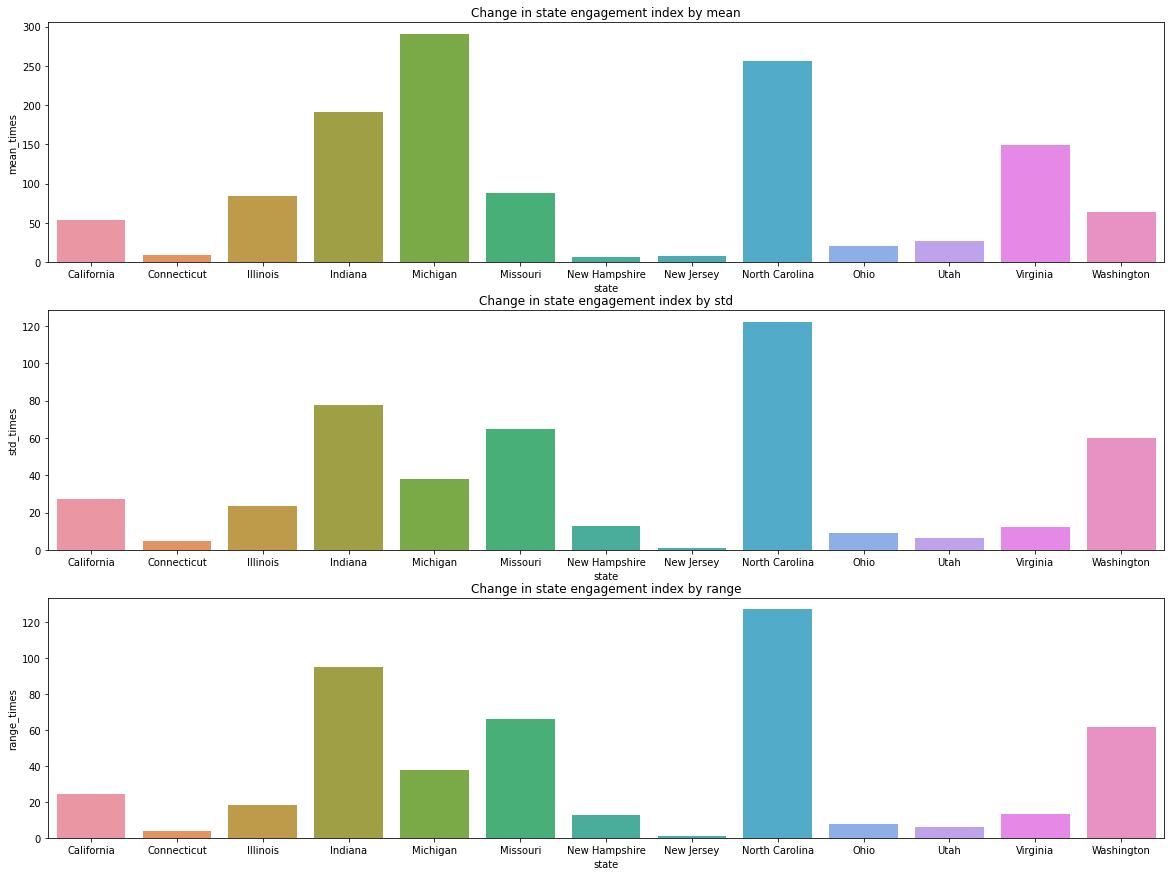

In [ ]:
plt.figure(figsize =(20,15))

plt.subplot(311)
sns.barplot(data = state_compare2, 
            x = 'state', 
            y = 'mean_times')
plt.title('Change in state engagement index by mean')

plt.subplot(312)
sns.barplot(data = state_compare2, 
            x = 'state', 
            y = 'std_times')

plt.title('Change in state engagement index by std')
            
plt.subplot(313)
sns.barplot(data = state_compare2, 
            x = 'state', 
            y = 'range_times')

plt.title('Change in state engagement index by range')

In [ ]:
state_compare2.columns

Index(['state', 'count_w1', 'count_w51', 'mean_w1', 'mean_w51', 'range_w1',
       'range_w51', 'std_w1', 'std_w51', 'mean_dif', 'mean_times', 'range_dif',
       'range_times', 'std_dif', 'std_times'],
      dtype='object')

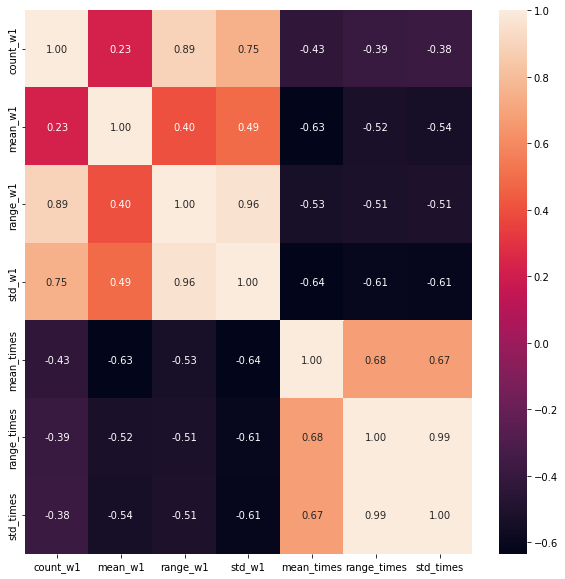

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data=state_compare2[['count_w1','mean_w1','range_w1', 'std_w1', 'mean_times', 'range_times', 'std_times']].corr(), annot=True, fmt='.2f')

## Online learning gap - by product

In [ ]:
engagement_full.head()

,time,lp_id,pct_access,engagement_index,district_id,cw,weekday,url,product_name,provider/company_name,...,new_pct_black/hispanic,new_pct_free/reduced,new_pp_total_raw,state_initial,avg_poverty,avg_no_comp,avg_no_internet,avg_home_broad,avg_broad_avail,avg_access_bbn
0,2020-01-01,15254.0,0.21,2.07,3710,1,2,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,...,0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.96107,0.98397
1,2020-01-04,15254.0,0.41,20.66,3710,1,5,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,...,0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.96107,0.98397
2,2020-01-05,15254.0,0.21,37.19,3710,1,6,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,...,0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.96107,0.98397
3,2020-01-06,15254.0,0.21,6.19,3710,2,0,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,...,0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.96107,0.98397
4,2020-01-07,15254.0,0.21,134.02,3710,2,1,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,...,0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.96107,0.98397


In [ ]:
# Tính số product sử dụng của từng district theo tuần: 
district_product = engagement_full.groupby(['cw', 'district_id'])['lp_id'].nunique().reset_index()
district_product.rename(columns = {'lp_id': 'product number'}, inplace = True)

In [ ]:
# Ghép bảng engagement_weekfull với bảng district_product: 

engagement_product = pd.merge(engagement_weekfull, district_product, how = 'left', on = ['cw', 'district_id'])

engagement_product

,cw,district_id,engagement_index,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw,new_pct_black/hispanic,new_pct_free/reduced,new_pp_total_raw,state_initial,avg_poverty,avg_no_comp,avg_no_internet,avg_home_broad,avg_broad_avail,avg_access_bbn,product number
0,1,1000,60677.44,Connecticut,Suburb,"[0.6, 0.8[","[0.2, 0.4[",NaN,0.7,0.3,NaN,CT,0.100204,0.103784,0.157293,0.838444,0.991412,0.993728,250
1,1,1044,10626.68,Missouri,Suburb,"[0, 0.2[","[0, 0.2[","[10000, 12000[",0.1,0.1,11000.0,MO,0.141723,0.126083,0.217449,0.777118,0.608562,0.930155,221
2,1,1052,5948.92,Illinois,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[16000, 18000[",0.3,0.3,17000.0,IL,0.130527,0.115315,0.187288,0.808061,0.760500,0.968503,77
3,1,1142,605.35,Connecticut,Rural,"[0, 0.2[","[0.2, 0.4[",NaN,0.1,0.3,NaN,CT,0.100204,0.103784,0.157293,0.838444,0.991412,0.993728,58
4,1,1204,851.68,Utah,Suburb,"[0, 0.2[","[0, 0.2[","[6000, 8000[",0.1,0.1,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.961070,0.983970,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5931,53,9553,27735.60,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000[",0.1,0.1,15000.0,IL,0.130527,0.115315,0.187288,0.808061,0.760500,0.968503,195
5932,53,9589,17788.84,Connecticut,Suburb,"[0.2, 0.4[","[0.2, 0.4[",NaN,0.3,0.3,NaN,CT,0.100204,0.103784,0.157293,0.838444,0.991412,0.993728,195
5933,53,9778,9460.76,Utah,Town,"[0, 0.2[","[0.4, 0.6[","[8000, 10000[",0.1,0.5,9000.0,UT,0.103676,0.055116,0.137981,0.857276,0.961070,0.983970,156
5934,53,9812,31664.93,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[6000, 8000[",0.1,0.3,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.961070,0.983970,280


In [ ]:
# PHân loại trường theo nhóm free / reduced lunch: 

def classify_social_economic(row):
    if row <0.7:
        return "More affluent"
    else: 
        return "Less affluent"

engagement_product['Socio-Economic'] = engagement_product['new_pct_free/reduced'].apply(classify_social_economic)

In [ ]:
engagement_product.groupby('Socio-Economic')['district_id'].nunique()

Socio-Economic
Less affluent     12
More affluent    100
Name: district_id, dtype: int64

In [ ]:
engagement_product.groupby('Socio-Economic')['state'].unique()[1]

array(['Connecticut', 'Missouri', 'Illinois', 'Utah', 'Indiana',
       'Virginia', 'Washington', 'New Hampshire', 'California', 'Ohio',
       'Michigan', 'Florida', 'North Carolina', 'New York', 'New Jersey'],
      dtype=object)

In [ ]:
engagement_product[(engagement_product['Socio-Economic'] == 'More affluent') & (engagement_product['cw']==1)]['product number'].describe()

count    100.00000
mean     158.54000
std       66.74078
min       16.00000
25%      117.00000
50%      154.00000
75%      218.25000
max      278.00000
Name: product number, dtype: float64

In [ ]:
engagement_product[(engagement_product['Socio-Economic'] == 'More affluent') & (engagement_product['cw']==1)]['product number'].describe()

count    100.00000
mean     158.54000
std       66.74078
min       16.00000
25%      117.00000
50%      154.00000
75%      218.25000
max      278.00000
Name: product number, dtype: float64

In [ ]:
# engagement_product.to_csv(PATH_TO_DB+'Tableau/engagement_product.csv', index=False)

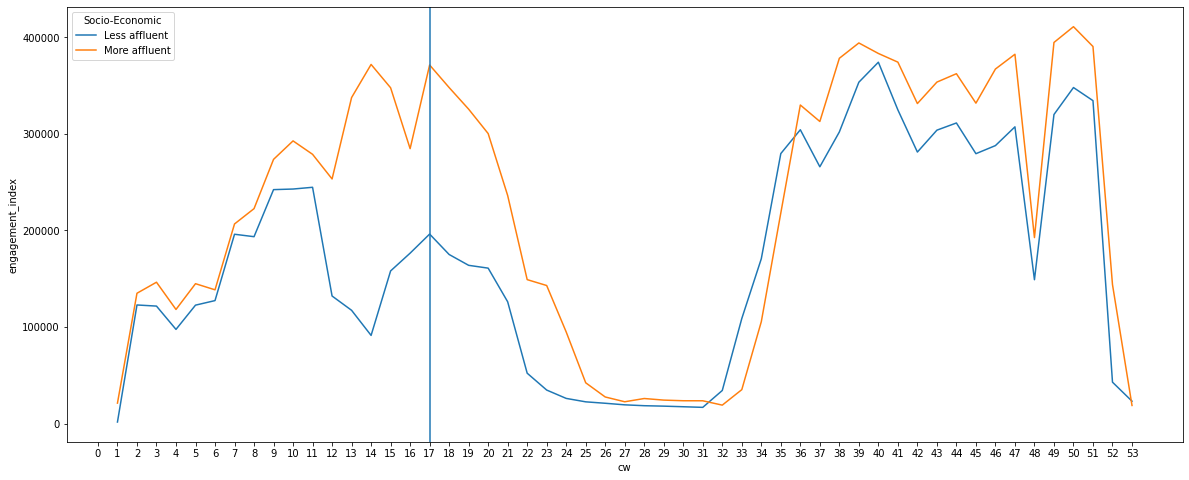

In [ ]:
temp = engagement_product.groupby(['cw','Socio-Economic'])['engagement_index'].mean().reset_index()

plt.figure(figsize = (20,8))
sns.lineplot(data = temp, 
             x = 'cw', 
             y = 'engagement_index', 
             hue = 'Socio-Economic')
plt.xticks(ticks = range(0,54,1))
plt.axvline(x=17)

plt.show()

In [ ]:
# Thay đổi

corr = pd.DataFrame()

for week in range(1,52): 
    temp = engagement_product[engagement_product['cw']==week]
    index = temp[['engagement_index','product number','new_pct_black/hispanic', 'new_pct_free/reduced', 'new_pp_total_raw', 'avg_poverty', 'avg_no_comp', 'avg_no_internet',
       'avg_home_broad', 'avg_broad_avail', 'avg_access_bbn']]
    df = index.corr()
    df_engage = df.iloc[0,]
    df_engage['week'] = week
    corr = corr.append(df_engage)
    

In [ ]:
corr

,engagement_index,product number,new_pct_black/hispanic,new_pct_free/reduced,new_pp_total_raw,avg_poverty,avg_no_comp,avg_no_internet,avg_home_broad,avg_broad_avail,avg_access_bbn,week
engagement_index,1.0,0.392303,-0.163945,-0.296316,0.149416,-0.464062,0.090148,-0.195971,0.199152,0.377744,0.414431,1.0
engagement_index,1.0,0.381883,-0.118275,-0.115644,0.209665,0.229687,0.521812,0.492786,-0.493661,-0.335961,-0.252990,2.0
engagement_index,1.0,0.346746,-0.097674,-0.128287,0.314173,0.208755,0.495782,0.437973,-0.438071,-0.316396,-0.214373,3.0
engagement_index,1.0,0.340195,-0.154425,-0.143886,0.296968,0.236494,0.478285,0.437273,-0.438341,-0.322708,-0.250210,4.0
engagement_index,1.0,0.342756,-0.146241,-0.147947,0.278382,0.327068,0.503388,0.522595,-0.523436,-0.427395,-0.350678,5.0
engagement_index,1.0,0.365609,-0.070546,-0.126167,0.306868,0.274562,0.512089,0.482747,-0.482587,-0.384972,-0.261498,6.0
engagement_index,1.0,0.316180,-0.074893,-0.059403,0.278913,0.325811,0.476136,0.507195,-0.508106,-0.439400,-0.327482,7.0
engagement_index,1.0,0.484864,-0.120682,-0.042025,0.072560,0.269023,0.441848,0.517894,-0.522946,-0.473516,-0.457025,8.0
engagement_index,1.0,0.390260,-0.101233,-0.139931,0.249490,0.318627,0.513443,0.512001,-0.511649,-0.383874,-0.268847,9.0
engagement_index,1.0,0.316994,-0.142159,-0.143170,0.198945,0.328881,0.519054,0.540489,-0.542042,-0.429062,-0.333394,10.0


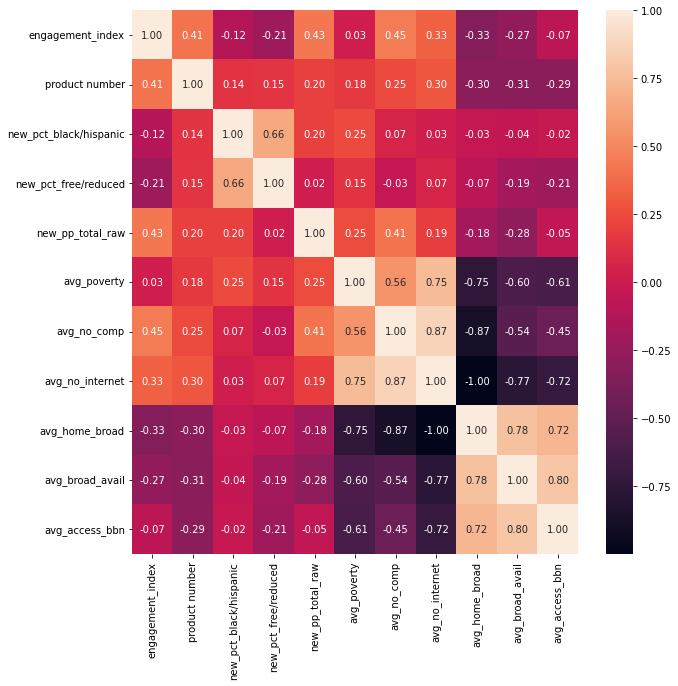

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data=temp[['engagement_index','product number','new_pct_black/hispanic', 'new_pct_free/reduced', 'new_pp_total_raw', 'avg_poverty', 'avg_no_comp', 'avg_no_internet',
       'avg_home_broad', 'avg_broad_avail', 'avg_access_bbn']].corr(), annot=True, fmt='.2f')

In [ ]:
#How about các district khác nhau trong cùng 1 state: 

temp_c = engagement_product[(engagement_product['cw']==51) & (engagement_product['state'] == 'Connecticut')]

temp_c.columns

Index(['cw', 'district_id', 'engagement_index', 'state', 'locale',
       'pct_black/hispanic', 'pct_free/reduced', 'pp_total_raw',
       'new_pct_black/hispanic', 'new_pct_free/reduced', 'new_pp_total_raw',
       'state_initial', 'avg_poverty', 'avg_no_comp', 'avg_no_internet',
       'avg_home_broad', 'avg_broad_avail', 'avg_access_bbn', 'product number',
       'Socio-Economic'],
      dtype='object')

In [ ]:
temp_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 5600 to 5708
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cw                      29 non-null     int64  
 1   district_id             29 non-null     int64  
 2   engagement_index        29 non-null     float64
 3   state                   29 non-null     object 
 4   locale                  29 non-null     object 
 5   pct_black/hispanic      29 non-null     object 
 6   pct_free/reduced        29 non-null     object 
 7   pp_total_raw            0 non-null      object 
 8   new_pct_black/hispanic  29 non-null     float64
 9   new_pct_free/reduced    29 non-null     float64
 10  new_pp_total_raw        0 non-null      float64
 11  state_initial           29 non-null     object 
 12  avg_poverty             29 non-null     float64
 13  avg_no_comp             29 non-null     float64
 14  avg_no_internet         29 non-null    

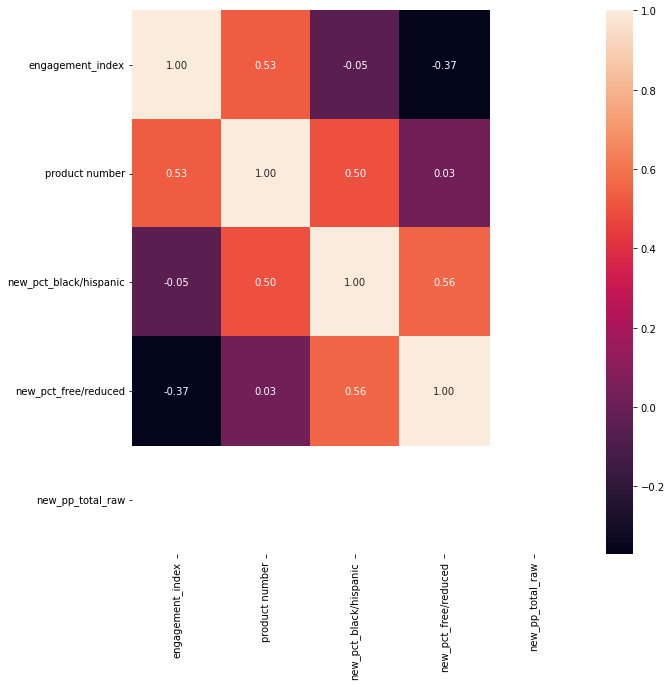

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data=temp_c[['engagement_index','product number','new_pct_black/hispanic', 'new_pct_free/reduced', 'new_pp_total_raw']].corr(), annot=True, fmt='.2f')

In [ ]:
engagement_weekfull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5936 entries, 0 to 5935
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cw                      5936 non-null   int64  
 1   district_id             5936 non-null   int64  
 2   engagement_index        5936 non-null   float64
 3   state                   5936 non-null   object 
 4   locale                  5936 non-null   object 
 5   pct_black/hispanic      5936 non-null   object 
 6   pct_free/reduced        5936 non-null   object 
 7   pp_total_raw            3392 non-null   object 
 8   new_pct_black/hispanic  5936 non-null   float64
 9   new_pct_free/reduced    5936 non-null   float64
 10  new_pp_total_raw        3392 non-null   float64
 11  state_initial           5936 non-null   object 
 12  avg_poverty             5936 non-null   float64
 13  avg_no_comp             5936 non-null   float64
 14  avg_no_internet         5936 non-null   

## Online learning gap - by economic status 

In [ ]:
engagement_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5936 entries, 0 to 5935
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cw                      5936 non-null   int64  
 1   district_id             5936 non-null   int64  
 2   engagement_index        5936 non-null   float64
 3   state                   5936 non-null   object 
 4   locale                  5936 non-null   object 
 5   pct_black/hispanic      5936 non-null   object 
 6   pct_free/reduced        5936 non-null   object 
 7   pp_total_raw            3392 non-null   object 
 8   new_pct_black/hispanic  5936 non-null   float64
 9   new_pct_free/reduced    5936 non-null   float64
 10  new_pp_total_raw        3392 non-null   float64
 11  state_initial           5936 non-null   object 
 12  avg_poverty             5936 non-null   float64
 13  avg_no_comp             5936 non-null   float64
 14  avg_no_internet         5936 non-null   

In [ ]:
# Tính engagement index và product number của hai nhóm wealthy và poor theo tuần 
group_gap = pd.pivot_table(data = engagement_product, 
               index = 'cw', 
               columns = 'Socio-Economic', 
               values = ['engagement_index', 'product number'],
               aggfunc = 'mean')
group_gap.columns

MultiIndex([('engagement_index', 'Less affluent'),
            ('engagement_index', 'More affluent'),
            (  'product number', 'Less affluent'),
            (  'product number', 'More affluent')],
           names=[None, 'Socio-Economic'])

In [ ]:
group_gap.columns = ['engagement_less_affluent','engagement_more_affluent', 'product_less_affluent', 'product_more_affluent']

group_gap.reset_index(inplace = True)

# Tính gap giữa nhóm wealthy và nhóm poor theo tuần:
group_gap['engagement_gap'] = group_gap['engagement_more_affluent'] - group_gap['engagement_less_affluent']

group_gap['product_gap'] = group_gap['product_more_affluent'] - group_gap['product_less_affluent']


In [ ]:
group_gap.head()

,cw,engagement_less_affluent,engagement_more_affluent,product_less_affluent,product_more_affluent,engagement_gap,product_gap
0,1,1534.692500,21126.1831,151.083333,158.54,19591.490600,7.456667
1,2,122755.175000,134891.3205,248.833333,229.27,12136.145500,-19.563333
2,3,121602.029167,146322.3508,257.583333,230.25,24720.321633,-27.333333
3,4,97466.625000,118112.2948,252.000000,224.99,20645.669800,-27.010000
4,5,122572.989167,144793.3888,259.583333,232.00,22220.399633,-27.583333


In [ ]:
# group_gap.to_csv(PATH_TO_DB+'Tableau/group_gap_week.csv', index=False)

In [ ]:
# Thay đổi về engagement gap giữa nhóm more affluent và less affluent từ đầu năm đến cuối năm: 
a = group_gap.loc[group_gap['cw'] ==51, 'engagement_gap'].values[0] 
b = group_gap.loc[group_gap['cw'] ==1, 'engagement_gap'].values[0]

print(f'Engagement gap between more affluent and less affluent groups increased {a/b} times in 2020')

Engagement gap between more affluent and less affluent groups increased 2.861283430538629 times in 2020


In [ ]:
# Thay đổi về engagement gap của từng nhóm: 

# More affluent: 
a1 = group_gap.loc[group_gap['cw'] ==51, 'engagement_more_affluent'].values[0] 
b1 = group_gap.loc[group_gap['cw'] ==1, 'engagement_more_affluent'].values[0]
c1 = a1/b1

print(f'More affluent group: engagement week 1: {b1}, engagement week 51: {a1}, growth rate: {c1} times')

# Less affluent: 
a2 = group_gap.loc[group_gap['cw'] ==51, 'engagement_less_affluent'].values[0] 
b2 = group_gap.loc[group_gap['cw'] ==1, 'engagement_less_affluent'].values[0]
c2 = a2/b2

print(f'Less affluent group: engagement week 1: {b2}, engagement week 51: {a2}, growth rate {c2} times')

More affluent group: engagement week 1: 21126.183100000002, engagement week 51: 390402.01159999997, growth rate: 18.479533655087934 times
Less affluent group: engagement week 1: 1534.6924999999999, engagement week 51: 334345.20416666666, growth rate 217.85810784027856 times


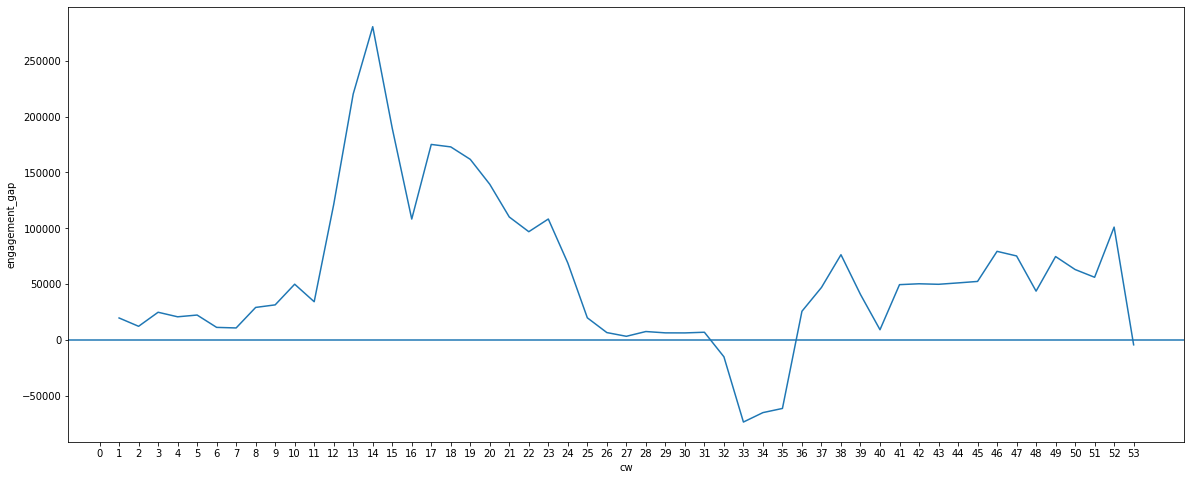

In [ ]:
# Thay đổi về engagement theo tuần 

plt.figure(figsize = (20,8))

sns.lineplot(data = group_gap, 
             x = 'cw', 
             y = 'engagement_gap')
plt.xticks(ticks = range(0,54,1))
# plt.twinx()

# sns.lineplot(data = group_gap, 
#              x = 'cw', 
#              y = 'access_gap', 
#              color = 'r')
# plt.axvline(x = 16)
plt.axhline(y= 0)

Thay đổi về engagement index gap theo tuần: 

* Từ tuần 1 đến tuần 6: hầu như không thay đổi 
* Từ tuần 6 đến tuần 11: tăng nhẹ
* Từ tuần 11 đến tuần 14: tăng đột ngột => WHAT HAPPENED?
* Từ tuần 14 đến tuần 16: giảm đột ngột => WHAT HAPPENED? 
* Từ tuần 16 đến tuần 24: tiếp tục giảm => WHAT HAPPENED?
* Từ tuần 24 đến tuần 32: hầu như ko còn gap
* Từ tuần 32 đến tuần 35: giảm xuống dưới 0 rồi tăng trở lại => WHAT HAPPENED? 
* Từ tuần 35 đến tuần 38: tăng mạnh => WHAT HAPPENED? 
* Từ tuần 38 đến tuần 51: duy trì

([<matplotlib.axis.XTick at 0x7fb4a9510950>,
 <a list of 54 Text major ticklabel objects>)

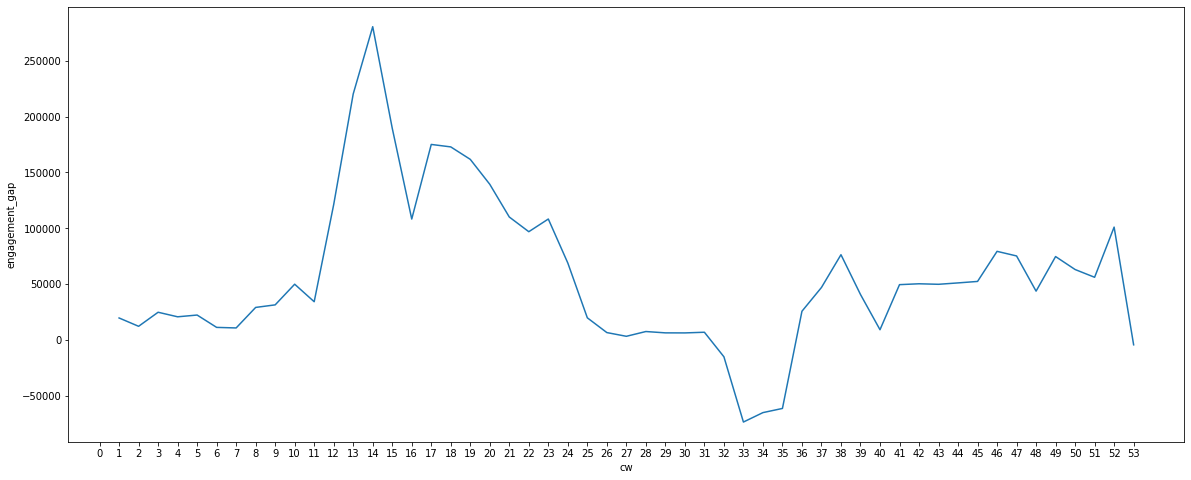

In [ ]:
# Thay đổi về engagement, access và product theo tuần:

plt.figure(figsize = (20,8))

sns.lineplot(data = group_gap, 
             x = 'cw', 
             y = 'engagement_gap')
plt.xticks(ticks = range(0,54,1))
# plt.twinx()

# sns.lineplot(data = group_gap, 
#              x = 'cw', 
#              y = 'product_gap', 
#              color = 'r')

# Đầu tiên nhóm wealthy dùng nhiều sản phẩm hơn nhóm poor, nhưng càng về cuối thì số sản phẩm nhóm poor dùng lại càng nhiều hơn nhóm wealthy 

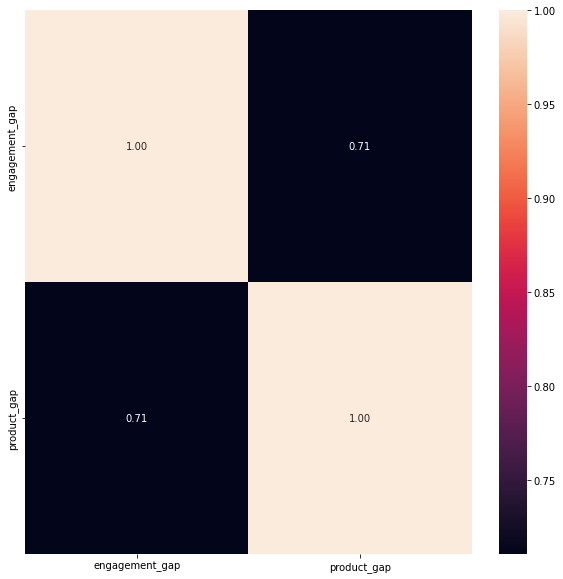

In [ ]:
# Mối quan hệ giữa thay đổi về engagement, access và product: 
plt.figure(figsize=(10,10))
sns.heatmap(data=group_gap[['engagement_gap', 'product_gap']].corr(), annot=True, fmt='.2f')

#Chênh lệch về access càng lớn thì chênh leehcj về engagement càng lớn 
#Chênh lệch về số lượng product sử dụng càng lớn thì chênh lệch về engagemnet càng lớn 

# Online learning gap explained by products

### Tạo bảng tổng hợp engagement index theo tuần, district và product 

In [ ]:
product = engagement_full[['time', 'lp_id', 'engagement_index', 'pct_access','district_id', 'cw', 'state', 'locale', 'product_name', 'provider/company_name', 
                 'sector(s)','primary_function_sub','primary_function_main','new_pct_free/reduced']]

product.head()

,time,lp_id,engagement_index,pct_access,district_id,cw,state,locale,product_name,provider/company_name,sector(s),primary_function_sub,primary_function_main,new_pct_free/reduced
0,2020-01-01,15254.0,2.07,0.21,3710,1,Utah,Suburb,MIT App Inventor,Massachusetts Institute of Technology,PreK-12; Higher Ed; Corporate,Content Creation & Curation,LC,0.5
1,2020-01-04,15254.0,20.66,0.41,3710,1,Utah,Suburb,MIT App Inventor,Massachusetts Institute of Technology,PreK-12; Higher Ed; Corporate,Content Creation & Curation,LC,0.5
2,2020-01-05,15254.0,37.19,0.21,3710,1,Utah,Suburb,MIT App Inventor,Massachusetts Institute of Technology,PreK-12; Higher Ed; Corporate,Content Creation & Curation,LC,0.5
3,2020-01-06,15254.0,6.19,0.21,3710,2,Utah,Suburb,MIT App Inventor,Massachusetts Institute of Technology,PreK-12; Higher Ed; Corporate,Content Creation & Curation,LC,0.5
4,2020-01-07,15254.0,134.02,0.21,3710,2,Utah,Suburb,MIT App Inventor,Massachusetts Institute of Technology,PreK-12; Higher Ed; Corporate,Content Creation & Curation,LC,0.5


In [ ]:
product.columns

Index(['time', 'lp_id', 'engagement_index', 'pct_access', 'district_id', 'cw',
       'state', 'locale', 'product_name', 'provider/company_name', 'sector(s)',
       'primary_function_sub', 'primary_function_main',
       'new_pct_free/reduced'],
      dtype='object')

In [ ]:
# Group engagement index by tên sản phẩm, tuần, district_id

product_weekly = product.groupby(['cw', 'district_id', 'lp_id'])['engagement_index', 'pct_access'].agg({'engagement_index': 'mean', 'pct_access': 'mean'}).reset_index()

product_weekly.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431316 entries, 0 to 1431315
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cw                1431316 non-null  int64  
 1   district_id       1431316 non-null  int64  
 2   lp_id             1431316 non-null  float64
 3   engagement_index  1431316 non-null  float64
 4   pct_access        1431316 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 54.6 MB


In [ ]:
# Group bảng product_weekly với thông tin sản phẩm : 

products_info.columns 

product_weekly = pd.merge(product_weekly, products_info, how = 'left', on ='lp_id')

In [ ]:
product_weekly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431316 entries, 0 to 1431315
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   cw                     1431316 non-null  int64  
 1   district_id            1431316 non-null  int64  
 2   lp_id                  1431316 non-null  float64
 3   engagement_index       1431316 non-null  float64
 4   pct_access             1431316 non-null  float64
 5   url                    1431316 non-null  object 
 6   product_name           1431316 non-null  object 
 7   provider/company_name  1431316 non-null  object 
 8   sector(s)              1363803 non-null  object 
 9   primary_function_main  1363803 non-null  object 
 10  primary_function_sub   1363803 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 131.0+ MB


In [ ]:
# Group bảng product_weekly với socio-economic status: 

district_state = pd.read_csv(PATH_TO_DB+'district_state.csv')

In [ ]:
# PHân loại trường theo nhóm free / reduced lunch: 

def classify_social_economic(row):
    if row <0.7:
        return "More affluent"
    else: 
        return "Less affluent"

district_state['Socio-Economic'] = district_state['new_pct_free/reduced'].apply(classify_social_economic)

In [ ]:
product_weekly_full = pd.merge(product_weekly, district_state[['district_id', 'state', 'Socio-Economic']], how = 'left', on = 'district_id')

In [ ]:
# Group product engagement theo tuần, loại product và nhóm 

product_socio = product_weekly_full.groupby(['cw', 'product_name', 'Socio-Economic'])[['engagement_index', 'pct_access']].mean().reset_index()

### Công thức tính tuần thần thánh 


In [ ]:
engagement_full[engagement_full['cw'].isin([15])]['time'].unique()

array(['2020-04-06T00:00:00.000000000', '2020-04-07T00:00:00.000000000',
       '2020-04-08T00:00:00.000000000', '2020-04-09T00:00:00.000000000',
       '2020-04-10T00:00:00.000000000', '2020-04-11T00:00:00.000000000',
       '2020-04-12T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
product_weekly_full.groupby('state')['district_id'].nunique()

state
California         9
Connecticut       29
Florida            1
Illinois          13
Indiana            5
Michigan           2
Missouri           6
New Hampshire      2
New Jersey         2
New York           1
North Carolina     3
Ohio               8
Utah              24
Virginia           3
Washington         4
Name: district_id, dtype: int64

### So sánh sự thay đổi giữa các district trong cùng state: Illinois vs California về engagement index 

In [ ]:
engagement_full

,time,lp_id,pct_access,engagement_index,district_id,cw,weekday,url,product_name,provider/company_name,...,new_pct_black/hispanic,new_pct_free/reduced,new_pp_total_raw,state_initial,avg_poverty,avg_no_comp,avg_no_internet,avg_home_broad,avg_broad_avail,avg_access_bbn
0,2020-01-01,15254.0,0.21,2.07,3710,1,2,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,...,0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.961070,0.983970
1,2020-01-04,15254.0,0.41,20.66,3710,1,5,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,...,0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.961070,0.983970
2,2020-01-05,15254.0,0.21,37.19,3710,1,6,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,...,0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.961070,0.983970
3,2020-01-06,15254.0,0.21,6.19,3710,2,0,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,...,0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.961070,0.983970
4,2020-01-07,15254.0,0.21,134.02,3710,2,1,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,...,0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.961070,0.983970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6610512,2020-12-27,87841.0,0.07,2.69,3732,52,6,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,...,0.5,0.5,13000.0,MI,0.149658,0.118667,0.204497,0.790311,0.894051,0.943875
6610513,2020-12-28,87841.0,0.13,8.83,3732,53,0,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,...,0.5,0.5,13000.0,MI,0.149658,0.118667,0.204497,0.790311,0.894051,0.943875
6610514,2020-12-29,87841.0,0.17,8.06,3732,53,1,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,...,0.5,0.5,13000.0,MI,0.149658,0.118667,0.204497,0.790311,0.894051,0.943875
6610515,2020-12-30,87841.0,0.10,9.37,3732,53,2,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,...,0.5,0.5,13000.0,MI,0.149658,0.118667,0.204497,0.790311,0.894051,0.943875


In [ ]:
# Illinois 

i1 = product_weekly_full[product_weekly_full['state'] == 'Illinois'].groupby(['cw', 'district_id'])['engagement_index'].sum().reset_index()

i2 = pd.merge(i1, district_state, how = 'left', on = 'district_id')

i3  = i2.groupby(['cw', 'Socio-Economic'])['engagement_index'].mean().reset_index()

#California: 

c1 = product_weekly_full[product_weekly_full['state'] == 'California'].groupby(['cw', 'district_id'])['engagement_index'].mean().reset_index()

c2 = pd.merge(c1, district_state, how = 'left', on = 'district_id')

c3  = c2.groupby(['cw', 'Socio-Economic'])['engagement_index'].mean().reset_index()


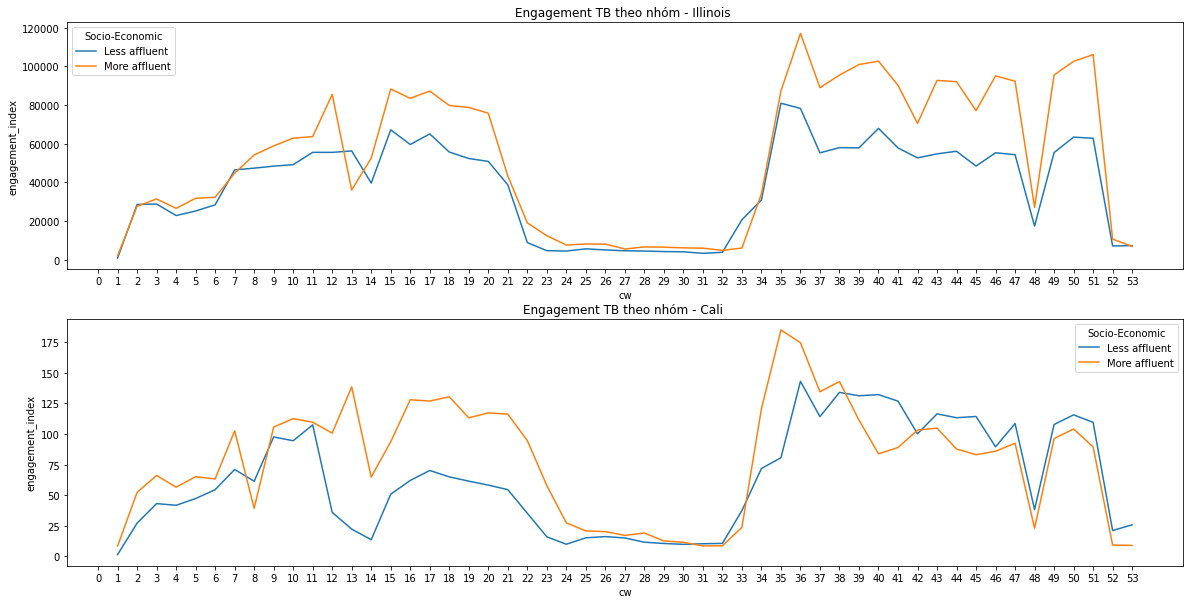

In [ ]:
# Biểu đồ nhóm: 

plt.figure(figsize = (20,10))

plt.subplot(211)
plt.title('Engagement TB theo nhóm - Illinois ')
sns.lineplot(data = i3, 
             x = 'cw', 
             y = 'engagement_index', 
             hue = 'Socio-Economic')
plt.xticks(ticks =range(0,54,1))

plt.subplot(212)
plt.title('Engagement TB theo nhóm - Cali ')
sns.lineplot(data = c3, 
             x = 'cw', 
             y = 'engagement_index', 
             hue = 'Socio-Economic')

plt.xticks(ticks =range(0,54,1))


plt.show()

In [ ]:
# i3.to_csv(PATH_TO_DB+'Tableau/Illinois_engagement_by_socioeconomic.csv', index=False)
# c3.to_csv(PATH_TO_DB+'Tableau/California_engagement_by_socioeconomic.csv', index=False)

In [ ]:
# Illinois và Cali: 

ic1 = product_weekly_full[product_weekly_full['state'].isin(['Illinois', 'California'])].groupby(['cw', 'district_id'])['engagement_index'].sum().reset_index()

ic2 = pd.merge(ic1, district_state, how = 'left', on = 'district_id')

ic3  = ic2.groupby(['cw', 'Socio-Economic', 'state'])['engagement_index'].mean().reset_index()

ic3

ic4 = pd.pivot_table(data = ic3, 
               index = 'cw', 
               columns = ['Socio-Economic', 'state'], 
               values = 'engagement_index').reset_index()
ic4.columns

ic4.columns = ['cw', 'less_affluent_cali', 'less_affluent_ill', 'more_affluent_cali', 'more_affluent_ill']
ic4['diff_cali'] = ic4['more_affluent_cali'] - ic4['less_affluent_cali']
ic4['diff_ill'] = ic4['more_affluent_ill'] - ic4['less_affluent_ill']

In [ ]:
# ic5.to_csv(PATH_TO_DB+'Tableau/Engagement_diff_by_state.csv', index=False)

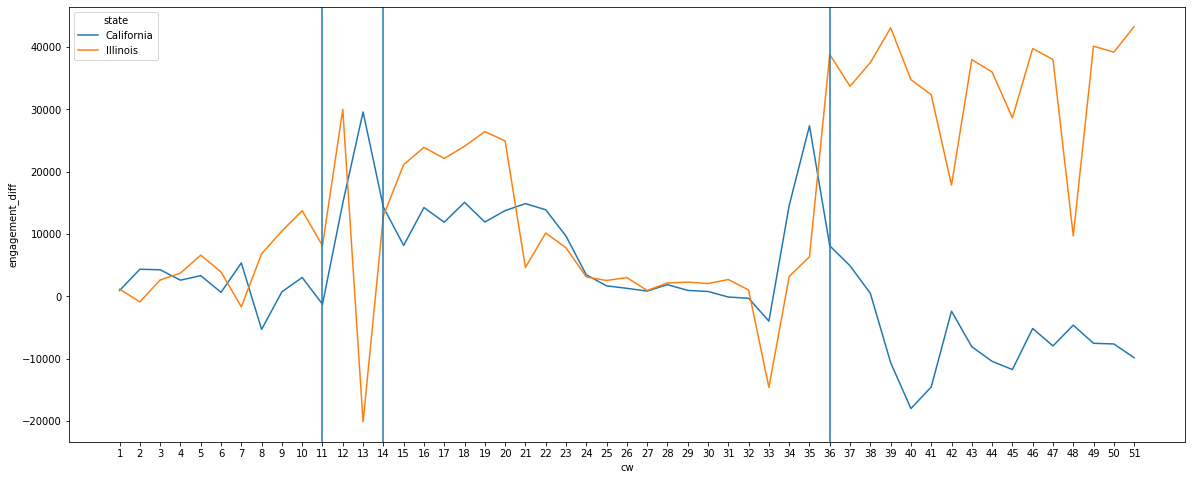

In [ ]:
# Vẽ biểu đồ thể hiện sự khác biệt giữa hai state 
identifiers = ic4.columns[0]
vars = ic4.columns[5:,]

ic5 = ic4.melt(id_vars=identifiers, 
                       value_vars=vars,
                       var_name='state',
                       value_name='engagement_diff')
ic5['state'] = ic5['state'].str.replace('diff_cali','California')
ic5['state'] = ic5['state'].str.replace('diff_ill','Illinois')
plt.figure(figsize = (20,8))
sns.lineplot(data=ic5[ic5['cw']<=51], 
             x = 'cw', 
             y = 'engagement_diff', 
             hue = 'state')
plt.xticks(ticks = range(1,52,1))
plt.axvline(x = 11)
plt.axvline(x = 14)
plt.axvline(x = 36)

plt.show()

In [ ]:
identifiers, vars

('cw', Index(['diff_cali', 'diff_ill'], dtype='object'))

In [ ]:
i3['engagement_index'].describe()

count       106.000000
mean      45634.767770
std       31853.199675
min         765.300889
25%       11005.319243
50%       48700.987004
75%       66544.285278
max      116934.956395
Name: engagement_index, dtype: float64

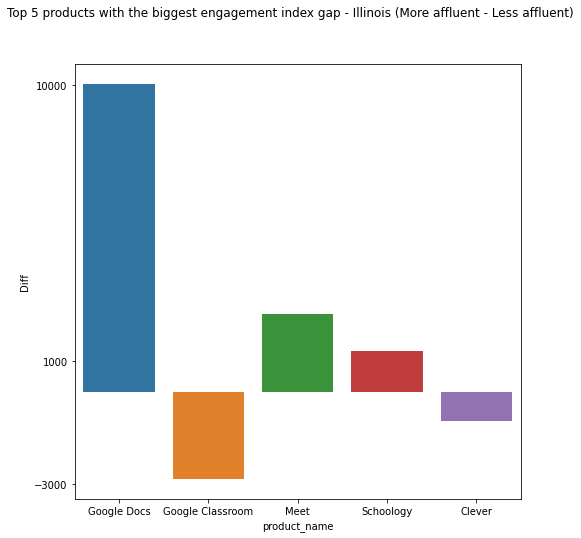

In [ ]:
# Engagement index theo product - Illinois: 

temp1_ill = product_weekly_full[product_weekly_full['state'] == 'Illinois']

temp2_ill = pd.pivot_table(data = temp1_ill[temp1_ill['cw']<=51],
               index = 'product_name', 
               columns = 'Socio-Economic', 
               values = 'engagement_index', 
               aggfunc = 'mean').reset_index()

temp2_ill['Diff'] = temp2_ill['More affluent'] - temp2_ill['Less affluent']
temp2_ill['Abs_diff'] = abs(temp2_ill['Diff'])

temp3_ill = temp2_ill.sort_values('Abs_diff', ascending = False).head()

plt.figure(figsize = (8,8))
plt.suptitle('Top 5 products with the biggest engagement index gap - Illinois (More affluent - Less affluent)')
sns.barplot(data = temp3_ill, 
            x = 'product_name', 
            y = 'Diff')
plt.yticks(ticks = (-3000,10000,1000))
plt.show()

In [ ]:
temp3_ill

Socio-Economic,product_name,Less affluent,More affluent,Diff,Abs_diff
123,Google Docs,11124.539113,21168.881182,10044.342069,10044.342069
121,Google Classroom,7519.055800,4686.199503,-2832.856298,2832.856298
197,Meet,324.821936,2884.519023,2559.697087,2559.697087
269,Schoology,4.837118,1360.307237,1355.470119,1355.470119
47,Clever,1076.194885,146.608904,-929.585981,929.585981


In [ ]:
# temp3_ill.to_csv(PATH_TO_DB+'Tableau/Products_in_Illinois.csv', index=False)
# temp3_ca.to_csv(PATH_TO_DB+'Tableau/Products_in_California.csv', index=False)

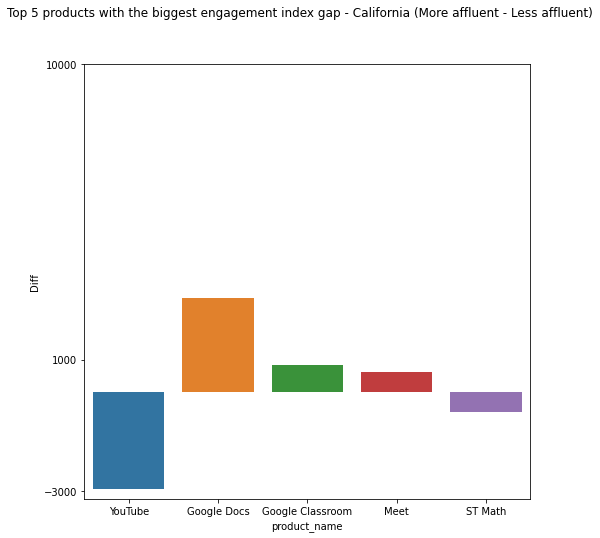

In [ ]:
# Engagement index theo product - California 

temp1_ca = product_weekly_full[product_weekly_full['state'] == 'California']

temp2_ca = pd.pivot_table(data = temp1_ca[temp1_ca['cw']<=51],
               index = 'product_name', 
               columns = 'Socio-Economic', 
               values = 'engagement_index', 
               aggfunc = 'mean').reset_index()
               
temp2_ca['Diff'] = temp2_ca['More affluent'] - temp2_ca['Less affluent']
temp2_ca['Abs_diff'] = abs(temp2_ca['Diff'])

temp3_ca = temp2_ca.sort_values('Abs_diff', ascending = False).head()

plt.figure(figsize = (8,8))
plt.suptitle('Top 5 products with the biggest engagement index gap - California (More affluent - Less affluent)')

sns.barplot(data = temp3_ca, 
            x = 'product_name', 
            y = 'Diff')
plt.yticks(ticks = (-3000,10000,1000))
plt.show()

In [ ]:
product_weekly_full[product_weekly_full['primary_function_sub'] == 'Virtual Classroom']['product_name'].unique()

array(['WebEx', 'Zoom', 'GoToMeeting', 'Google Hangouts', 'Meet',
       'ZOOM Cloud Meetings',
       'Loom - Video Recorder: Screen, Webcam and Mic'], dtype=object)

state       Socio-Economic
California  Less affluent      522.795234
            More affluent      675.714009
Illinois    Less affluent      667.930228
            More affluent     1484.132657
Name: engagement_index, dtype: float64

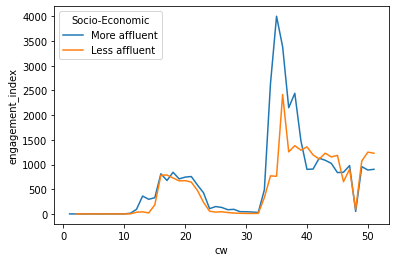

In [ ]:
# Engagement index gap của các ứng dụng học trực tuyến giữa hai bang: 

v1 = product_weekly_full[(product_weekly_full['state'].isin(['California', 'Illinois'])) & (product_weekly_full['product_name'].isin(['Meet', 'Zoom']))]

v2 = v1[v1['cw']<=51].groupby(['cw','state', 'Socio-Economic'])['engagement_index'].mean().reset_index()

sns.lineplot(data = v2[v2['state']=='California'], 
             x = 'cw', 
             y = 'engagement_index',
             hue = 'Socio-Economic')

v2.groupby(['state', 'Socio-Economic'])['engagement_index'].mean()
               
# temp2_ca['Diff'] = temp2_ca['More affluent'] - temp2_ca['Less affluent']
# temp2_ca['Abs_diff'] = abs(temp2_ca['Diff'])

# temp3_ca = temp2_ca.sort_values('Abs_diff', ascending = False).head()

# plt.figure(figsize = (8,8))
# plt.suptitle('Top 5 products with the biggest engagement index gap - California (More affluent - Less affluent)')

# sns.barplot(data = temp3_ca, 
#             x = 'product_name', 
#             y = 'Diff')
# plt.show()

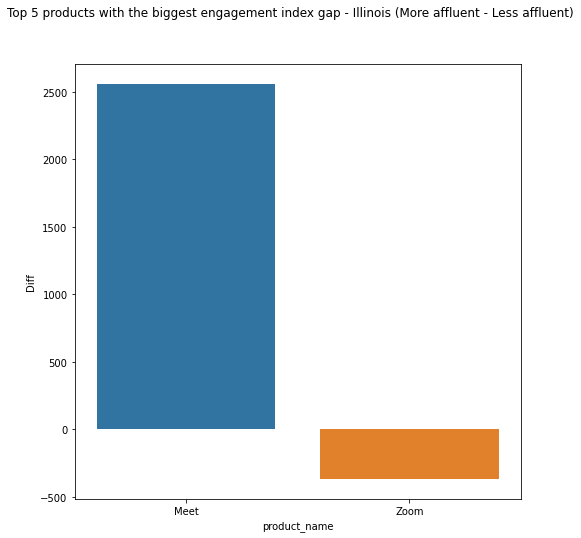

In [ ]:
# Engagement index theo product - Illinois: 

temp1_ill = product_weekly_full[product_weekly_full['state'] == 'Illinois']

temp2_ill = pd.pivot_table(data = temp1_ill[(temp1_ill['cw']<=51)&(temp1_ill['product_name'].isin(['Meet', 'Zoom']))],
               index = 'product_name', 
               columns = 'Socio-Economic', 
               values = 'engagement_index', 
               aggfunc = 'mean').reset_index()

temp2_ill['Diff'] = temp2_ill['More affluent'] - temp2_ill['Less affluent']
temp2_ill['Abs_diff'] = abs(temp2_ill['Diff'])

temp3_ill = temp2_ill.sort_values('Abs_diff', ascending = False).head()

plt.figure(figsize = (8,8))
plt.suptitle('Top 5 products with the biggest engagement index gap - Illinois (More affluent - Less affluent)')
sns.barplot(data = temp3_ill, 
            x = 'product_name', 
            y = 'Diff')
plt.show()

In [ ]:
# Engagement index của Cali: 

temp1_ca = product_weekly_full[product_weekly_full['state'] == 'California']

temp2_ca = pd.pivot_table(data = temp1_ca[temp1_ca['product_name'] == 'Google Docs'],
               index = 'cw', 
               columns = 'Socio-Economic', 
               values = 'engagement_index', 
               aggfunc = 'mean').reset_index()

temp2_ca['Diff'] = temp2_ca['More affluent'] - temp2_ca['Less affluent']
temp2_ca['Abs_diff'] = abs(temp2_ca['Diff'])
temp2_ca

# temp2 = pd.merge(temp2_ca, temp2_ill, how = 'inner', on ='cw')

# temp2.columns

# temp2.columns =['cw', 'Less affluent_CA', 'More affluent_CA', 'Diff_CA', 'Abs_diff_CA',
#        'Less affluent_ILL', 'More affluent_ILL', 'Diff_ILL', 'Abs_diff_ILL']

# temp3 = temp2[['cw', 'Diff_CA', 'Diff_ILL']]


Socio-Economic,cw,Less affluent,More affluent,Diff,Abs_diff
0,1,31.426000,347.118333,315.692333,315.692333
1,2,935.282857,2075.871429,1140.588571,1140.588571
2,3,1292.476190,3059.413571,1766.937381,1766.937381
3,4,1178.819048,3117.587143,1938.768095,1938.768095
4,5,1570.625714,3895.687857,2325.062143,2325.062143
5,6,2018.512381,3846.410952,1827.898571,1827.898571
6,7,2848.201905,5660.721190,2812.519286,2812.519286
7,8,2533.311905,1953.330714,-579.981190,579.981190
8,9,3988.239048,6270.681429,2282.442381,2282.442381
9,10,2945.869048,6943.707381,3997.838333,3997.838333


In [ ]:
temp2_ill

Socio-Economic,product_name,Less affluent,More affluent,Diff,Abs_diff
0,Meet,324.821936,2884.519023,2559.697087,2559.697087
1,Zoom,1138.907728,771.112924,-367.794804,367.794804


In [ ]:
# temp3.to_csv(PATH_TO_DB+'Tableau/diff_GoogleDoc_byweek.csv', index=False)

In [ ]:
# identifiers = temp3.columns[0]
# vars = temp3.columns[1:3]

# temp4 = temp3.melt(id_vars = identifiers,
#                    value_vars = vars, 
#                    var_name = 'state', 
#                    value_name= 'diff')
# plt.figure(figsize =(20,8))
# sns.lineplot(data = temp4[temp4['cw']<=51], 
#              x = 'cw', 
#              y = 'diff', 
#              hue = 'state')

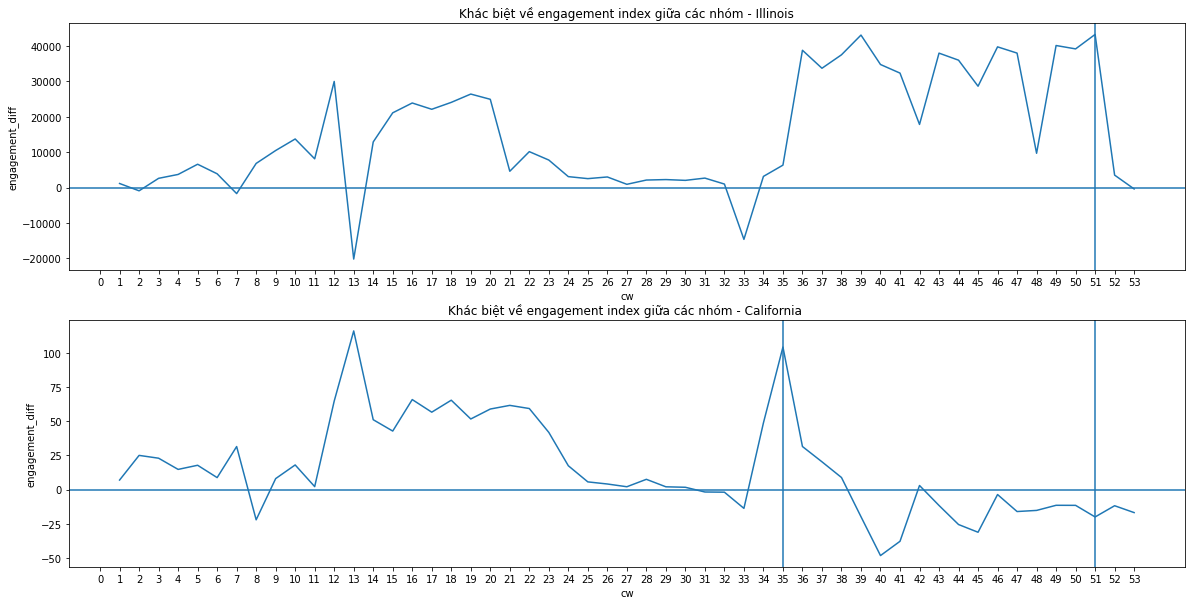

In [ ]:
# Tính sự thay đổi về engagement index giữa hai nhóm: 
# Illinois 
i4 = pd.pivot_table(data = i3, 
               index = 'cw', 
               columns = 'Socio-Economic', 
               values = 'engagement_index')

i4.columns=['Less affluent', 'More affluent']
i4['engagement_diff'] = i4['More affluent'] - i4['Less affluent']

i4.reset_index()

# Cali
c4 = pd.pivot_table(data = c3, 
               index = 'cw', 
               columns = 'Socio-Economic', 
               values = 'engagement_index')

c4.columns=['Less affluent', 'More affluent']
c4.reset_index()

c4['engagement_diff'] = c4['More affluent'] - c4['Less affluent']

#Biểu đồ 

plt.figure(figsize = (20,10))

plt.subplot(211)
plt.title('Khác biệt về engagement index giữa các nhóm - Illinois')
sns.lineplot(data = i4, 
             x = 'cw',
             y = 'engagement_diff')
plt.axhline(y = 0)
plt.axvline(x = 51)
plt.xticks(ticks = range(0,54,1))

plt.subplot(212)
plt.title('Khác biệt về engagement index giữa các nhóm - California ')
sns.lineplot(data = c4, 
             x = 'cw',
             y = 'engagement_diff')
plt.axhline(y = 0)
plt.xticks(ticks = range(0,54,1))
plt.axvline(x = 51)
plt.axvline(x = 35)
plt.show()

In [ ]:
# i4.to_csv(PATH_TO_DB+'Tableau/Illinois_engagement_by_socioeconomic_2.csv', index=False)
# c4.to_csv(PATH_TO_DB+'Tableau/California_engagement_by_socioeconomic_2.csv', index=False)

In [ ]:
a = list(product_weekly_full[product_weekly_full['state'].isin(['Illinois', 'California'])]['district_id'].unique())

district_state[(district_state['district_id'].isin(a)) & (district_state['Socio-Economic']=='Less affluent')]

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw,new_pct_black/hispanic,new_pct_free/reduced,new_pp_total_raw,state_initial,avg_poverty,avg_no_comp,avg_no_internet,avg_home_broad,avg_broad_avail,avg_access_bbn,Socio-Economic
18,9043,Illinois,Suburb,"[0.8, 1[","[0.8, 1[","[12000, 14000[",0.9,0.9,13000.0,IL,0.130527,0.115315,0.187288,0.808061,0.760500,0.968503,Less affluent
37,8784,Illinois,Suburb,"[0.6, 0.8[","[0.6, 0.8[","[10000, 12000[",0.7,0.7,11000.0,IL,0.130527,0.115315,0.187288,0.808061,0.760500,0.968503,Less affluent
105,3248,Illinois,Suburb,"[0.6, 0.8[","[0.6, 0.8[","[12000, 14000[",0.7,0.7,13000.0,IL,0.130527,0.115315,0.187288,0.808061,0.760500,0.968503,Less affluent
108,4550,California,City,"[0.8, 1[","[0.6, 0.8[",NaN,0.9,0.7,NaN,CA,0.143044,0.083924,0.150233,0.845930,0.956689,0.986406,Less affluent
174,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[",NaN,0.7,0.7,NaN,CA,0.143044,0.083924,0.150233,0.845930,0.956689,0.986406,Less affluent
175,7164,California,City,"[0.6, 0.8[","[0.6, 0.8[",NaN,0.7,0.7,NaN,CA,0.143044,0.083924,0.150233,0.845930,0.956689,0.986406,Less affluent


### So sánh sự thay đổi giữa các district trong cùng state: Illinois vs California về pct access 

In [ ]:
product_weekly_full

,cw,district_id,lp_id,engagement_index,pct_access,url,product_name,provider/company_name,sector(s),primary_function_main,primary_function_sub,state,Socio-Economic
0,1,1000,10533.0,19.524000,0.1380,http://www.scholastic.com,Scholastic,Scholastic Inc,PreK-12,LC,"Sites, Resources & Reference",Connecticut,More affluent
1,1,1000,10650.0,2.996667,0.0600,http://www.loc.gov,Library of Congress,Library of Congress,PreK-12; Higher Ed; Corporate,LC,"Sites, Resources & Reference",Connecticut,More affluent
2,1,1000,11069.0,0.300000,0.0300,http://www.mrdonn.org/index.html,Mr. Donn,mrdonn.org,PreK-12,LC,"Sites, Resources & Reference",Connecticut,More affluent
3,1,1000,11206.0,1.350000,0.1200,http://www.google.com/earth/,Google Earth,Google LLC,PreK-12; Higher Ed; Corporate,LC,"Sites, Resources & Reference",Connecticut,More affluent
4,1,1000,11237.0,0.000000,0.0000,http://www.online-stopwatch.com/,online-stopwatch.com,online-stopwatch.com,PreK-12; Higher Ed,LC,"Sites, Resources & Reference",Connecticut,More affluent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431311,53,9899,98468.0,2.506667,0.0400,https://gsuite.google.com/products/jamboard/,Jamboard,Google LLC,PreK-12; Higher Ed; Corporate,LC,Content Creation & Curation,Illinois,More affluent
1431312,53,9899,98845.0,3.455000,0.0375,https://meet.google.com/_meet,Meet,Google LLC,PreK-12; Higher Ed; Corporate,CM,Virtual Classroom,Illinois,More affluent
1431313,53,9899,99580.0,0.825000,0.0375,https://loom.com/,"Loom - Video Recorder: Screen, Webcam and Mic","Loom, Inc",PreK-12; Higher Ed; Corporate,CM,Virtual Classroom,Illinois,More affluent
1431314,53,9899,99789.0,0.000000,0.0000,https://www.evite.com,Evite,Evite,PreK-12; Higher Ed; Corporate,LC,Content Creation & Curation,Illinois,More affluent


In [ ]:
#Illinois 

i1 = product_weekly_full[product_weekly_full['state'] == 'Illinois'].groupby(['cw', 'district_id'])['pct_access'].mean().reset_index()

i2 = pd.merge(i1, district_state, how = 'left', on = 'district_id')

i3  = i2.groupby(['cw', 'Socio-Economic'])['pct_access'].mean().reset_index()

#California: 

c1 = product_weekly_full[product_weekly_full['state'] == 'California'].groupby(['cw', 'district_id'])['pct_access'].mean().reset_index()

c2 = pd.merge(c1, district_state, how = 'left', on = 'district_id')

c3  = c2.groupby(['cw', 'Socio-Economic'])['pct_access'].mean().reset_index()


In [ ]:
# i3.to_csv(PATH_TO_DB+'Tableau/Illinois_access_by_socioeconomic.csv', index=False)
# c3.to_csv(PATH_TO_DB+'Tableau/California_access_by_socioeconomic.csv', index=False)

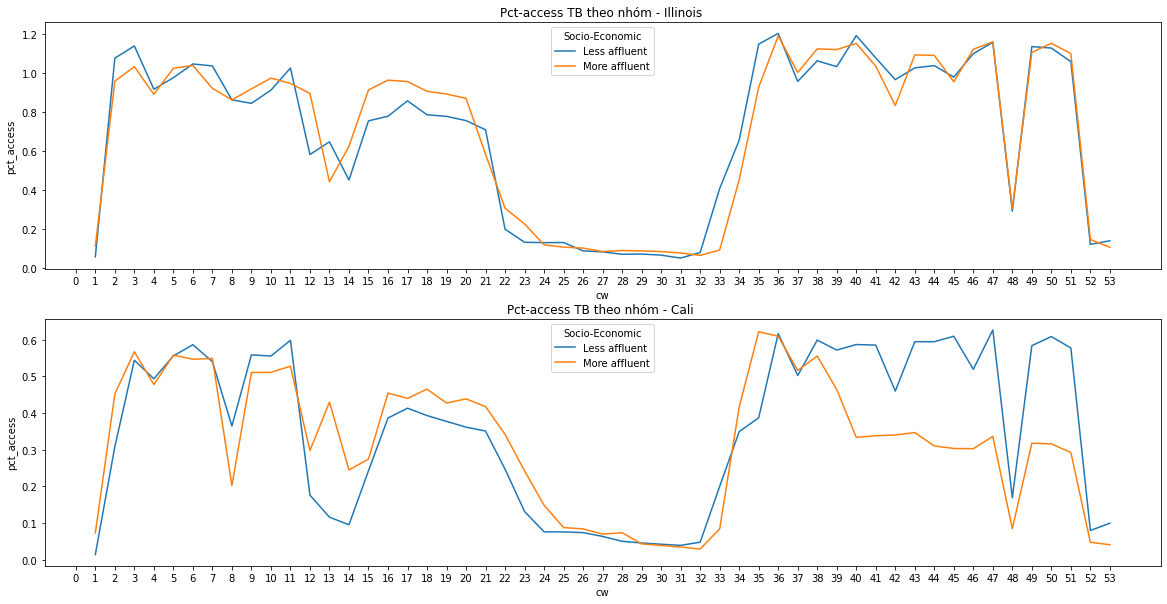

In [ ]:
# Biểu đồ nhóm: 

plt.figure(figsize = (20,10))

plt.subplot(211)
plt.title('Pct-access TB theo nhóm - Illinois ')
sns.lineplot(data = i3, 
             x = 'cw', 
             y = 'pct_access', 
             hue = 'Socio-Economic')
plt.xticks(ticks =range(0,54,1))

plt.subplot(212)
plt.title('Pct-access TB theo nhóm - Cali ')
sns.lineplot(data = c3, 
             x = 'cw', 
             y = 'pct_access', 
             hue = 'Socio-Economic')

plt.xticks(ticks =range(0,54,1))


plt.show()

# PRODUCT ORIENTED 

In [ ]:
engagement_full['engagement_index'].value_counts()

0.00       1271936
0.10         38236
0.05         37587
0.09         34680
0.20         30229
            ...   
1029.83          1
2246.02          1
2633.55          1
1455.25          1
642.52           1
Name: engagement_index, Length: 235999, dtype: int64

In [ ]:
top10_access = engagement_full.groupby('product_name')['pct_access'].mean().sort_values(ascending = False).head(10).reset_index()

In [ ]:
a = list(top10_access['product_name'])

In [ ]:
top10_access = engagement_full[engagement_full['product_name'].isin(a)]

top10_access['time'] = pd.to_datetime(top10_access['time'])

top10_access['month'] = top10_access['time'].dt.to_period('M')

top10_access['month'].unique()

temp = top10_access.groupby(['month','product_name'])['pct_access'].mean().reset_index()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
temp['month'] = temp['month'].astype(str)
temp['product_name'].nunique()

10

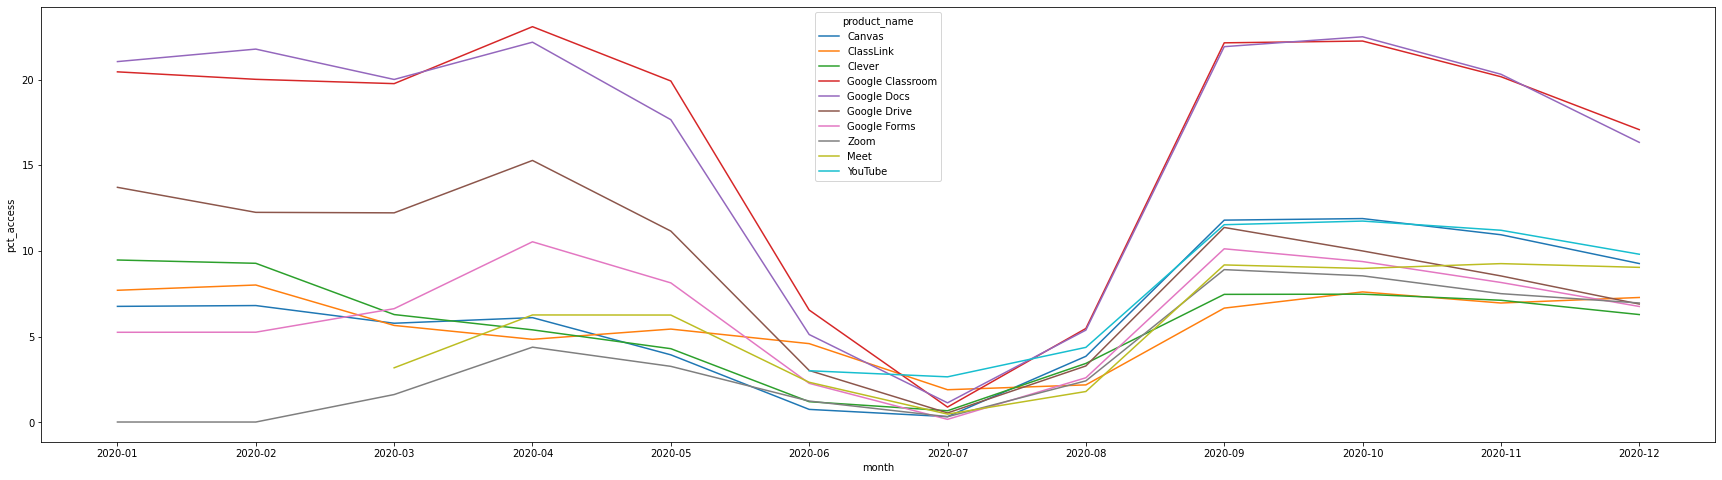

In [ ]:
plt.figure(figsize = (30, 8))

sns.lineplot(data = temp,
             x = 'month', 
             y = 'pct_access',
             hue = 'product_name')

In [ ]:
engagement_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6610517 entries, 0 to 6610516
Data columns (total 28 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   time                    datetime64[ns]
 1   lp_id                   float64       
 2   pct_access              float64       
 3   engagement_index        float64       
 4   district_id             int64         
 5   cw                      int64         
 6   weekday                 int64         
 7   url                     object        
 8   product_name            object        
 9   provider/company_name   object        
 10  sector(s)               object        
 11  primary_function_main   object        
 12  primary_function_sub    object        
 13  state                   object        
 14  locale                  object        
 15  pct_black/hispanic      object        
 16  pct_free/reduced        object        
 17  pp_total_raw            object        
 18  ne

In [ ]:
top10_engage = engagement_full.groupby('product_name')['engagement_index'].mean().sort_values(ascending = False).head(10)

# COMBINE COVID CASE AND ENGAGEMENT DATA 

In [ ]:
covid_case = pd.read_csv(PATH_TO_DB+'covid_cases_country.csv')

In [ ]:
covid_case['New Cases'].describe()

count       586.000000
mean      66582.291809
std       63144.118962
min           1.000000
25%       24387.250000
50%       47066.500000
75%       77789.750000
max      293116.000000
Name: New Cases, dtype: float64

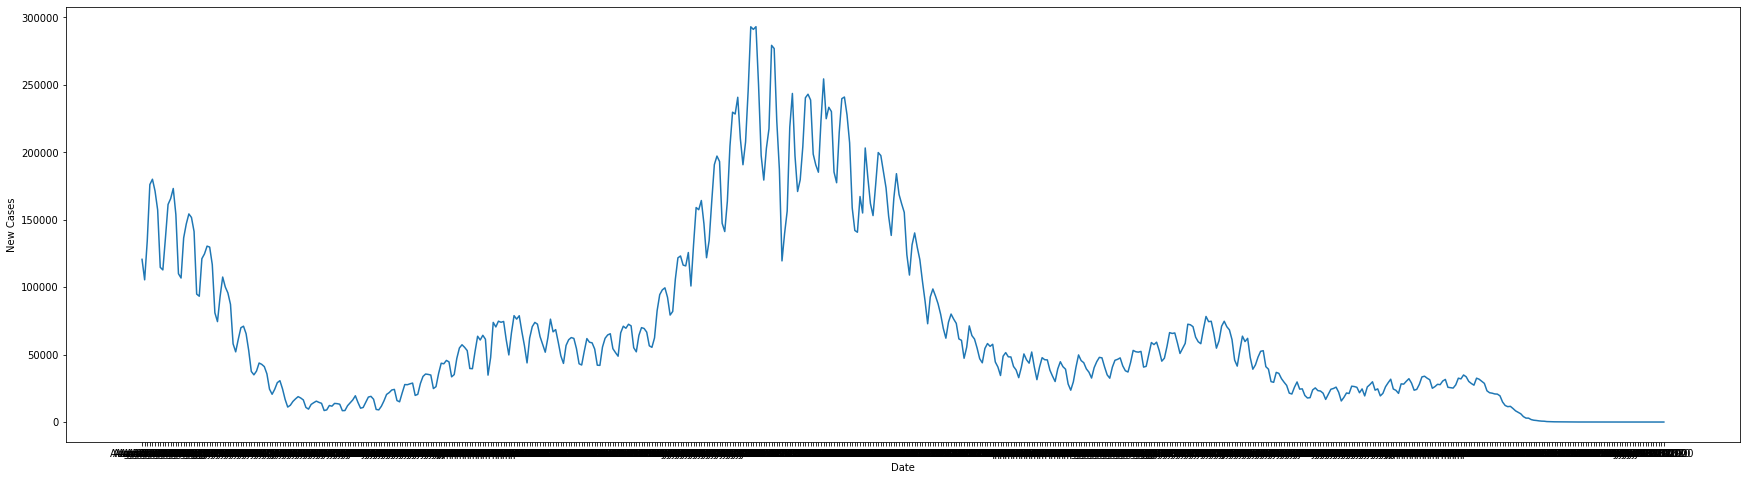

In [ ]:
plt.figure(figsize = (30, 8))
sns.lineplot(data = covid_case,
             x = 'Date',
             y = 'New Cases')

In [ ]:
covid_case['Date'] = pd.to_datetime(covid_case['Date'])
covid_case['cw'] = covid_case['Date'].dt.week



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
# Slicing covid_case data until 31/12/2020

covid_case = covid_case[covid_case['Date']<'2021-01-01']

In [ ]:
engagement_full['time'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                 6610517
unique                    366
top       2020-12-10 00:00:00
freq                    25187
first     2020-01-01 00:00:00
last      2020-12-31 00:00:00
Name: time, dtype: object

In [ ]:
engagement_full['time'] = pd.to_datetime(engagement_full['time'])

#Summarize the pct_access and engagement_index by week: 
engagement_mean = engagement_full.groupby('cw')[['pct_access', 'engagement_index']].mean().reset_index()

#Summarize the new covid cases by week:  
covidcase_mean = covid_case.groupby('cw')['New Cases'].mean().reset_index()

# Merge the 2 data: 
engagement_covid = pd.merge(engagement_mean, covidcase_mean, how = 'left', on = 'cw')

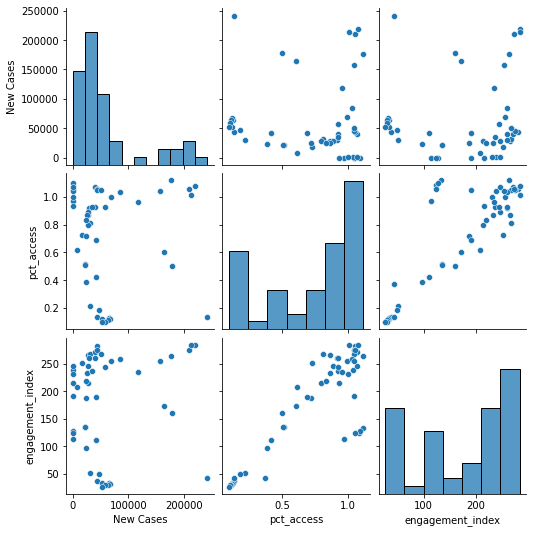

In [ ]:
engagement_covid.head()

#Fill weeks with no new cases as 0: 

sns.pairplot(engagement_covid[['New Cases', 'pct_access', 'engagement_index']])

#Does not look like there is a strong correlation between number of new cases and pct_access / engagement index 

Text(0.5, 1.0, 'Change in engagement_index & number of new cases overtime')

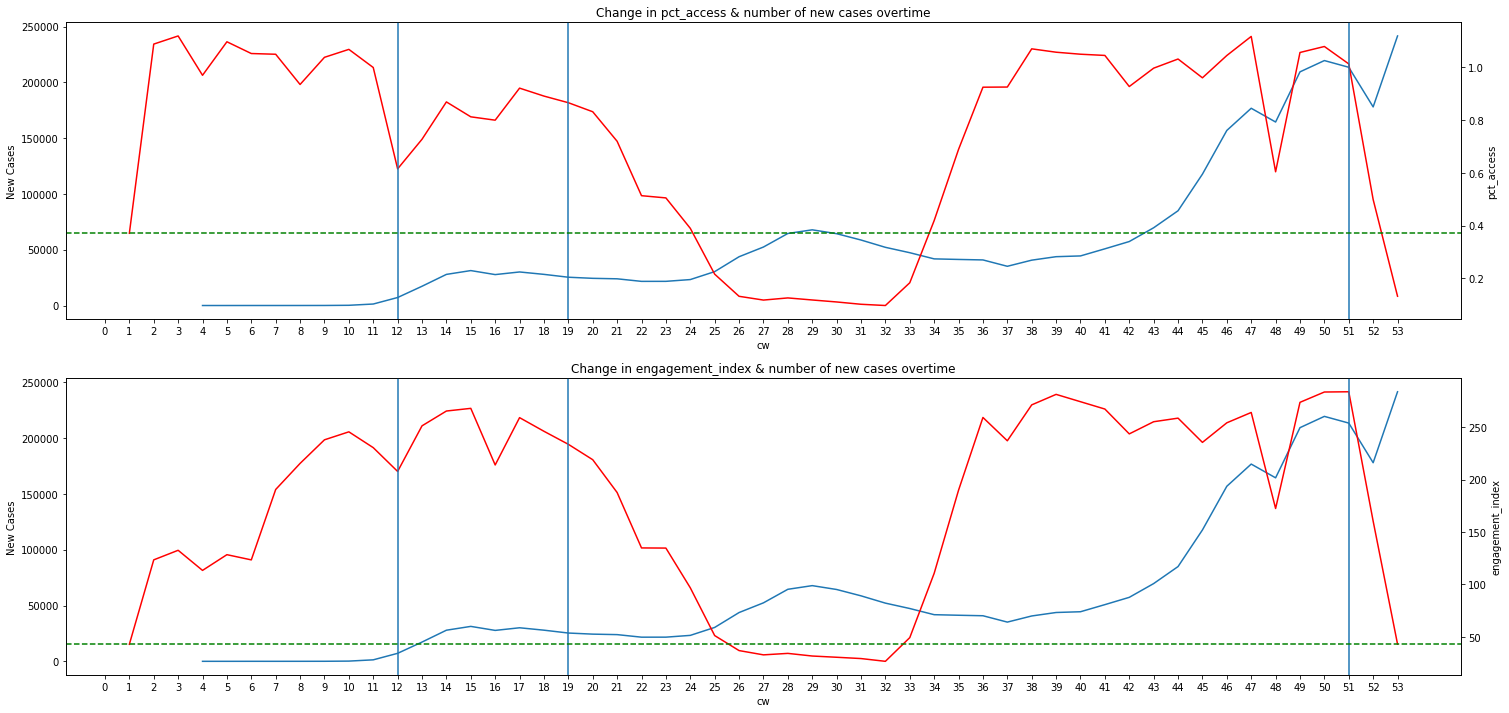

In [ ]:
# Change in pct_access & number of new cases overtime: 

plt.figure(figsize =(25,12))

plt.subplot(211)
sns.lineplot(data = engagement_covid, 
             x = 'cw', 
             y = 'New Cases')
plt.xticks(ticks =range(0,54,1))
plt.twinx()
sns.lineplot(data = engagement_covid, 
             x = 'cw', 
             y = 'pct_access', 
             color = 'red')
plt.axvline(x=12)
plt.axvline(x=19)
plt.axvline(x=51)
plt.axhline(y=engagement_covid.loc[engagement_covid['cw']==1,'pct_access'][0], color='green', linestyle='--')


plt.title('Change in pct_access & number of new cases overtime')

# Change in engagement index & number of new cases overtime: 
plt.subplot(212)
sns.lineplot(data = engagement_covid, 
             x = 'cw', 
             y = 'New Cases')
plt.xticks(ticks =range(0,54,1))
plt.twinx()
sns.lineplot(data = engagement_covid, 
             x = 'cw', 
             y = 'engagement_index', 
             color = 'red')

plt.axvline(x=12)
plt.axvline(x=19)
plt.axvline(x=51)
plt.axhline(y=engagement_covid.loc[engagement_covid['cw']==1,'engagement_index'][0], color='green', linestyle='--')

plt.title('Change in engagement_index & number of new cases overtime')


In [ ]:
engagement_full[engagement_full['time']=='2020-8-15']

,time,lp_id,pct_access,engagement_index,district_id,cw,weekday,url,product_name,provider/company_name,...,new_pct_black/hispanic,new_pct_free/reduced,new_pp_total_raw,state_initial,avg_poverty,avg_no_comp,avg_no_internet,avg_home_broad,avg_broad_avail,avg_access_bbn
384,2020-08-15,32213.0,0.00,0.00,3710,33,5,https://classroom.google.com,Google Classroom,Google LLC,...,0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.961070,0.983970
1242,2020-08-15,95731.0,0.00,0.00,3710,33,5,http://docs.google.com/,Google Docs,Google LLC,...,0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.961070,0.983970
1849,2020-08-15,28504.0,0.00,0.00,3710,33,5,http://google.com/sheets/about/,Google Sheets,Google LLC,...,0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.961070,0.983970
2260,2020-08-15,99916.0,0.00,0.00,3710,33,5,https://drive.google.com/start,Google Drive,Google LLC,...,0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.961070,0.983970
3967,2020-08-15,72758.0,0.00,0.00,3710,33,5,https://www.google.com/calendar,Google Calendar,Google LLC,...,0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.961070,0.983970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6604558,2020-08-15,20677.0,0.00,0.00,3732,33,5,https://www.remove.bg,remove.bg,Kaleido AI GmbH,...,0.5,0.5,13000.0,MI,0.149658,0.118667,0.204497,0.790311,0.894051,0.943875
6604978,2020-08-15,28633.0,0.00,0.00,3732,33,5,http://www.discoveryeducation.com/,Discovery Education,Discovery Communications,...,0.5,0.5,13000.0,MI,0.149658,0.118667,0.204497,0.790311,0.894051,0.943875
6605343,2020-08-15,41424.0,0.01,0.08,3732,33,5,https://www.commonapp.org/,Common App,"The Common Application, Inc.",...,0.5,0.5,13000.0,MI,0.149658,0.118667,0.204497,0.790311,0.894051,0.943875
6606400,2020-08-15,96034.0,0.01,0.08,3732,33,5,http://www.roomrecess.com/,RoomRecess.com,RoomRecess.com,...,0.5,0.5,13000.0,MI,0.149658,0.118667,0.204497,0.790311,0.894051,0.943875


In [ ]:
covid_case

,State,Date,New Cases,Historic Cases,cw
242,United States,2020-12-31,279286,0,53
243,United States,2020-12-30,276911,0,53
244,United States,2020-12-29,223089,0,53
245,United States,2020-12-28,187280,0,53
246,United States,2020-12-27,119462,0,52
...,...,...,...,...,...
581,United States,2020-01-27,1,0,5
582,United States,2020-01-26,3,0,4
583,United States,2020-01-25,3,0,4
584,United States,2020-01-24,1,0,4


In [ ]:
covid_case = covid_case.sort_values(by='Date', ascending=True)

In [ ]:
# covid_case.to_csv(PATH_TO_DB+'Tableau/covid_case_USA.csv', index=False)

# SCHOOL OPENING / CLOSURE DATA

In [ ]:
closure = pd.read_excel(PATH_TO_DB+'COVID SCHOOL CLOSURE   OPENING DATA/School closure 03 2020/coronavirus-school-closures-data-5.15.20.xlsx', header = 1)

In [ ]:
closure['Start Week'] = closure['State Closure Start Date'].dt.week
closure['End Week'] = closure['Date closed for the academic year'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
closure.info()
closure.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   State                              58 non-null     object        
 1   State Abbreviation                 58 non-null     object        
 2   State Status                       58 non-null     object        
 3   State Closure Status               58 non-null     object        
 4   State Closure Start Date           57 non-null     datetime64[ns]
 5   Date closed for the academic year  54 non-null     datetime64[ns]
 6   State Number of Public Schools     57 non-null     object        
 7   State Public School Enrollment     56 non-null     object        
 8   Start Week                         57 non-null     float64       
 9   End Week                           54 non-null     float64       
dtypes: datetime64[ns](2), float64(2), object

,State,State Abbreviation,State Status,State Closure Status,State Closure Start Date,Date closed for the academic year,State Number of Public Schools,State Public School Enrollment,Start Week,End Week
0,Alabama,AL,State ordered closure,Ordered closed for the academic year,2020-03-19,2020-04-06,"1,513","744,930",12.0,15.0
1,Alaska,AK,State ordered closure,Ordered closed for the academic year,2020-03-16,2020-04-09,507,"132,737",12.0,15.0
2,American Samoa,AS,State ordered closure,Ordered closed until further notice,2020-03-23,NaT,28,NaN,13.0,NaN
3,Arizona,AZ,State ordered closure,Ordered closed for the academic year,2020-03-16,2020-03-30,"2,308","1,123,137",12.0,14.0
4,Arkansas,AR,State ordered closure,Ordered closed for the academic year,2020-03-17,2020-04-06,"1,089","493,447",12.0,15.0


In [ ]:
#Earliest closure start week for Acedemic year 2019/2020: 
closure['Start Week'].min()

#Earliset and latest closure end week for Acedemic year 2019/2020: 
closure['End Week'].describe()

closure[closure['End Week']==12]

closure['State Closure Status'].unique()

array(['Ordered closed for the academic year',
       'Ordered closed until further notice', 'Varies by school/district',
       'Recommended closed for the academic year'], dtype=object)

# School year 2020/2021 

In [ ]:
# Merging all sheets of the School Year 2020/2021 files 
df_total = pd.DataFrame()
excel_file = pd.ExcelFile(PATH_TO_DB+'COVID SCHOOL CLOSURE   OPENING DATA/Map_-_Coronavirus_and_School_Closures.xlsx')
sheets = excel_file.sheet_names

for sheet in sheets:               # loop through sheets inside an Excel file
    df = excel_file.parse(sheet_name = sheet)
    df['Date'] = sheet
    df_total = df_total.append(df)

In [ ]:
df_total

,Date,State,State_Abbr,Public School Enrollment,Status,Details,Disclaimer
0,Map Data 6.14.21,Alabama,AL,739716.0,No order in effect,Districts make the decision on what instructio...,NaN
1,Map Data 6.14.21,Alaska,AK,130963.0,No order in effect,"In Alaska, districts decide for themselves whe...",NaN
2,Map Data 6.14.21,Arizona,AZ,1141511.0,Some grades ordered open,All schools must have reopened for in-person l...,<i>*Orders include public statements or action...
3,Map Data 6.14.21,Arkansas,AR,495291.0,Ordered open,The state requires districts to offer in-perso...,<i>*Orders include public statements or action...
4,Map Data 6.14.21,California,CA,6272734.0,No order in effect,School districts may reopen schools at all gra...,NaN
...,...,...,...,...,...,...,...
47,Map Data - 8.19.20,Virginia,VA,NaN,Only hybrid or remote instruction allowed,The state is currently requiring that in-perso...,NaN
48,Map Data - 8.19.20,Washington,WA,NaN,Varies by school/district/dependent on local h...,State officials announced Aug. 6 that they rec...,NaN
49,Map Data - 8.19.20,West Virginia,WV,NaN,State ordered closure in effect (including sta...,Gov. Jim Justice has pushed the start of schoo...,<i>*Orders include public statements or action...
50,Map Data - 8.19.20,Wisconsin,WI,NaN,Varies by school/district/dependent on local h...,Districts will decide whether to return to ful...,NaN


In [ ]:
df_total.to_excel(PATH_TO_DB+'combined_file.xlsx', index=False)

In [ ]:
df_total.iloc[4,0].split('Map Data')[1].split()[-1]

'6.14.21'

In [ ]:
df_total.iloc[2300,0].split('Map Data')[1].split()[-1]

'8.19.20'

In [ ]:
 # Tách và convert date: 
 df_total['Date'] = df_total['Date'].apply(lambda x: x.split('Map Data')[1].split()[-1])

In [ ]:
df_total['Date'] = pd.to_datetime(df_total['Date'])

#Slicing data until the end of 2020: 
df_total = df_total[df_total['Date'] <'2020-12-31']

# Tạo cột week: 
df_total['cw'] = df_total['Date'].dt.week


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
# Tạo cột status category để phân loại status của các state: 

df_total.loc[df_total['Status'].str.contains('No order'), 'Status Category'] = 'No order'
df_total.loc[df_total['Status'].str.contains('Ordered open'), 'Status Category'] = 'Ordered open' 
df_total.loc[df_total['Status'].str.contains('Partial closure'), 'Status Category'] = 'Partial Closure' 
df_total.loc[df_total['Status'].str.contains('Full closure'), 'Status Category'] = 'Full Closure' 


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df_total.loc[df_total['Status']=='Varies by school/district/dependent on local health authorities','Status Category'] = 'No order'
df_total.loc[df_total['Status']=='State-ordered in-person instruction available part-time or full-time*','Status Category'] = 'Partial Closure'
df_total.loc[df_total['Status']=='State-ordered regional closure in effect','Status Category'] = 'Partial Closure'
df_total.loc[df_total['Status']=='Only hybrid or remote instruction allowed','Status Category'] = 'Partial Closure'
df_total.loc[df_total['Status']=='State ordered closure in effect (including states where openings are delayed)','Status Category'] = 'Full Closure'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 0 to 51
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      1092 non-null   datetime64[ns]
 1   State                     1092 non-null   object        
 2   State_Abbr                1092 non-null   object        
 3   Public School Enrollment  884 non-null    float64       
 4   Status                    1092 non-null   object        
 5   Details                   1092 non-null   object        
 6   Disclaimer                277 non-null    object        
 7   cw                        1092 non-null   int64         
 8   Status Category           1092 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 85.3+ KB


In [ ]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 0 to 51
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      1092 non-null   datetime64[ns]
 1   State                     1092 non-null   object        
 2   State_Abbr                1092 non-null   object        
 3   Public School Enrollment  884 non-null    float64       
 4   Status                    1092 non-null   object        
 5   Details                   1092 non-null   object        
 6   Disclaimer                277 non-null    object        
 7   cw                        1092 non-null   int64         
 8   Status Category           1092 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 85.3+ KB


# School year 2019/2020

In [ ]:
import os
import pandas as pd
cwd = os.path.abspath(PATH_TO_DB+'COVID SCHOOL CLOSURE   OPENING DATA/School closure 03-05 2020 (REUP) ') 
files = os.listdir(cwd)

In [ ]:
files

['coronavirus-state-district-closures-3.25.2020-v1.xlsx',
 'coronavirus-school-closures-3.9.2020-v1.csv',
 'coronavirus-school-closures-3.9.2020-v2.xlsx',
 'coronavirus-school-closures-data-3.10.20.xlsx',
 'coronavirus-school-closures-data-3.11.20-v1.xlsx',
 'coronavirus-school-closures-data-3.11.20-v2.xlsx',
 'coronavirus-school-closures-data-3.12.20-v1.xlsx',
 'coronavirus-school-closures-data-3.12.20-v2.xlsx',
 'coronavirus-school-closures-data-3.13.20-v1.xlsx',
 'coronavirus-school-closures-data-3.13.20-v2.xlsx',
 'coronavirus-school-closures-data-3.13.20-v3.xlsx',
 'coronavirus-school-closures-3.14.2020-v1.xlsx',
 'coronavirus-state-district-closures-3.15.2020-v1.xlsx',
 'coronavirus-state-district-closures-3.16.2020-v2.xlsx',
 'coronavirus-state-district-closures-3.16.2020-v3.xlsx',
 'coronavirus-state-district-closures-3.16.2020-v4.xlsx',
 'coronavirus-state-district-closures-3.17.2020-v2.xlsx',
 'coronavirus-state-district-closures-3.18.2020-v1.xlsx',
 'coronavirus-state-distri

In [ ]:
engagement_full[engagement_full['cw'] == 6]['time'].unique()

array(['2020-02-03T00:00:00.000000000', '2020-02-04T00:00:00.000000000',
       '2020-02-05T00:00:00.000000000', '2020-02-06T00:00:00.000000000',
       '2020-02-07T00:00:00.000000000', '2020-02-08T00:00:00.000000000',
       '2020-02-09T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
covid_cases = pd.read_csv(PATH_TO_DB+'covid_cases_country.csv')

covid_cases['Date'] = pd.to_datetime(covid_cases['Date'])
covid_cases['cw'] = covid_cases['Date'].dt.week


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [ ]:
df = pd.DataFrame()
for file in files:
     if file.endswith('.xlsx'):
         df = df.append(pd.read_excel(cwd+'/'+file), ignore_index=True)
         df['Date'] = file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9511 entries, 0 to 9510
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   State                            9452 non-null   object        
 1   State Abbreviation               6570 non-null   object        
 2   State Status                     215 non-null    object        
 3   Reopening Status                 115 non-null    object        
 4   Schools Impacted                 109 non-null    object        
 5   State Closure Start Date         207 non-null    datetime64[ns]
 6   State Number of Public Schools   112 non-null    object        
 7   State Public School Enrollment   110 non-null    object        
 8   State Number of Private Schools  100 non-null    object        
 9   State Private School Enrollment  100 non-null    object        
 10  Date                             9511 non-null   object     

In [ ]:
# a.to_csv(PATH_TO_DB+'Tableau/8425_access.csv', index=False)
# b.to_csv(PATH_TO_DB+'Tableau/8425_engagement.csv', index=False)

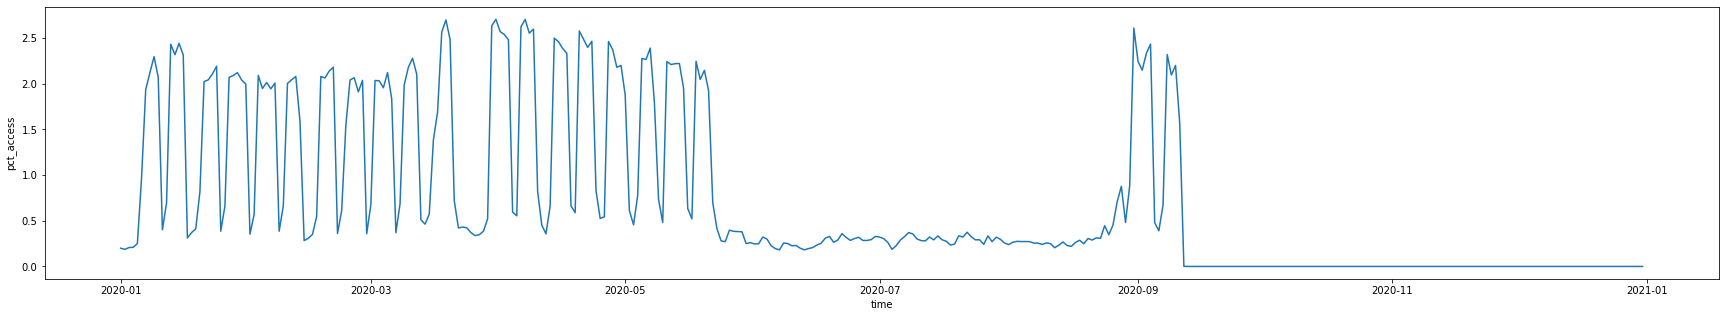

In [ ]:
a= engagement_full[engagement_full['district_id']==8425].groupby('time')['pct_access'].mean().reset_index()

plt.figure(figsize = (30, 5))
sns.lineplot(data = a, 
             x = 'time',
             y = 'pct_access')

In [ ]:
engagement_full[engagement_full['district_id']==8425]

,time,lp_id,pct_access,engagement_index,district_id,cw,weekday,url,product_name,provider/company_name,...,new_pct_black/hispanic,new_pct_free/reduced,new_pp_total_raw,state_initial,avg_poverty,avg_no_comp,avg_no_internet,avg_home_broad,avg_broad_avail,avg_access_bbn
4896128,2020-01-01,15254.0,0.06,75.53,8425,1,2,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,...,0.1,0.1,NaN,OH,0.14524,0.124728,0.196368,0.798483,0.937772,0.960319
4896129,2020-01-06,15254.0,0.40,43.16,8425,2,0,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,...,0.1,0.1,NaN,OH,0.14524,0.124728,0.196368,0.798483,0.937772,0.960319
4896130,2020-01-07,15254.0,0.40,45.43,8425,2,1,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,...,0.1,0.1,NaN,OH,0.14524,0.124728,0.196368,0.798483,0.937772,0.960319
4896131,2020-01-08,15254.0,0.51,63.53,8425,2,2,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,...,0.1,0.1,NaN,OH,0.14524,0.124728,0.196368,0.798483,0.937772,0.960319
4896132,2020-01-09,15254.0,0.62,47.05,8425,2,3,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,...,0.1,0.1,NaN,OH,0.14524,0.124728,0.196368,0.798483,0.937772,0.960319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949312,2020-12-22,87841.0,0.00,0.00,8425,52,1,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,...,0.1,0.1,NaN,OH,0.14524,0.124728,0.196368,0.798483,0.937772,0.960319
4949313,2020-12-24,87841.0,0.00,0.00,8425,52,3,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,...,0.1,0.1,NaN,OH,0.14524,0.124728,0.196368,0.798483,0.937772,0.960319
4949314,2020-12-27,87841.0,0.00,0.00,8425,52,6,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,...,0.1,0.1,NaN,OH,0.14524,0.124728,0.196368,0.798483,0.937772,0.960319
4949315,2020-12-28,87841.0,0.00,0.00,8425,53,0,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,...,0.1,0.1,NaN,OH,0.14524,0.124728,0.196368,0.798483,0.937772,0.960319


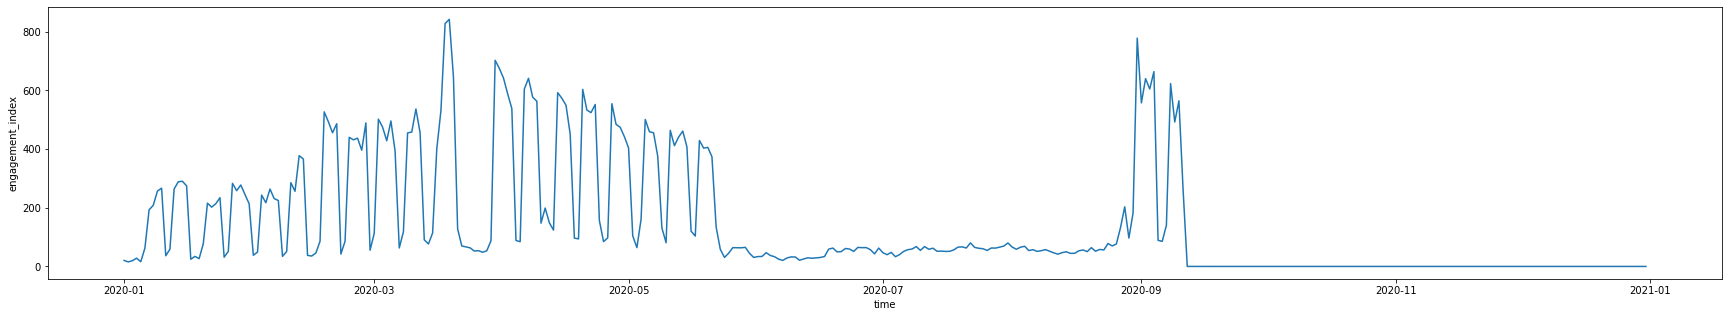

In [ ]:
b= engagement_full[engagement_full['district_id']==8425].groupby('time')['engagement_index'].mean().reset_index()

plt.figure(figsize = (30, 5))
sns.lineplot(data = b, 
             x = 'time',
             y = 'engagement_index')

In [ ]:
districts_info[districts_info['district_id'] ==8425]

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw,new_pct_black/hispanic,new_pct_free/reduced,new_pp_total_raw,state_initial
49,8425,Ohio,Suburb,"[0, 0.2[","[0, 0.2[",NaN,0.1,0.1,NaN,OH


# ENGAGEMENT BY LOCALE 

In [ ]:
engagement_full.head()

,time,lp_id,pct_access,engagement_index,district_id,cw,weekday,url,product_name,provider/company_name,...,new_pct_black/hispanic,new_pct_free/reduced,new_pp_total_raw,state_initial,avg_poverty,avg_no_comp,avg_no_internet,avg_home_broad,avg_broad_avail,avg_access_bbn
0,2020-01-01,15254.0,0.21,2.07,3710,1,2,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,...,0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.96107,0.98397
1,2020-01-04,15254.0,0.41,20.66,3710,1,5,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,...,0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.96107,0.98397
2,2020-01-05,15254.0,0.21,37.19,3710,1,6,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,...,0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.96107,0.98397
3,2020-01-06,15254.0,0.21,6.19,3710,2,0,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,...,0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.96107,0.98397
4,2020-01-07,15254.0,0.21,134.02,3710,2,1,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,...,0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.96107,0.98397


In [ ]:
temp = engagement_full.groupby(['cw', 'locale'])['engagement_index'].mean().reset_index()

In [ ]:
# temp.to_csv(PATH_TO_DB+'Tableau/engagement_by_locale.csv', index=False)

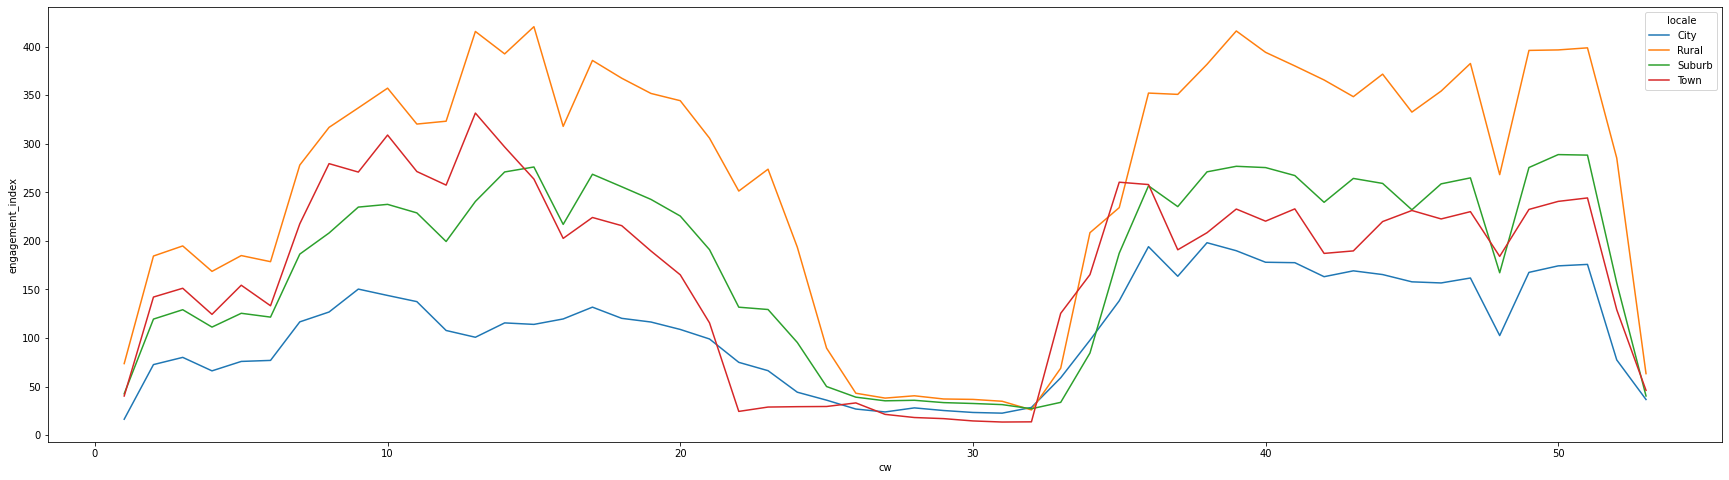

In [ ]:
plt.figure(figsize=(30,8))
sns.lineplot(data = temp, 
             x = 'cw', 
             y = 'engagement_index', 
             hue = 'locale')

#

# External research

In [ ]:
internet_comp = pd.read_csv(PATH_TO_DB+'External data/internet_broadband_modified-csv.csv')
internet_comp

,Month,State,Socio-Economic,Device always available for educational purposes,Device usually available for educational purposes,Device sometimes available for educational purposes,Device rarely available for educational purposes,Device never available for educational purposes,Internet always available for educational purposes,Internet usually available for educational purposes,Internet sometimes available for educational purposes,Internet rarely available for educational purposes,Internet never available for educational purposes,Unnamed: 13
0,04-15-2020,California,Less affluent,0.63,0.23,0.09,0.04,0.01,0.67,0.26,0.05,0.01,0.00,NaN
1,04-15-2020,California,More affluent,0.82,0.11,0.05,0.01,0.00,0.84,0.13,0.01,0.01,0.00,NaN
2,05-15-2020,California,Less affluent,0.52,0.33,0.08,0.01,0.06,0.58,0.31,0.06,0.02,0.03,NaN
3,05-15-2020,California,More affluent,0.84,0.11,0.03,0.01,0.01,0.86,0.11,0.02,0.00,0.00,NaN
4,06-15-2020,California,Less affluent,0.52,0.25,0.07,0.17,0.00,0.57,0.26,0.07,0.09,0.00,NaN
5,06-15-2020,California,More affluent,0.75,0.21,0.02,0.01,0.00,0.75,0.20,0.04,0.00,0.01,NaN
6,07-15-2020,California,Less affluent,0.57,0.20,0.12,0.04,0.08,0.58,0.28,0.05,0.08,0.00,NaN
7,07-15-2020,California,More affluent,0.76,0.16,0.07,0.01,0.00,0.77,0.17,0.05,0.00,0.00,NaN
8,08-15-2020,California,Less affluent,0.64,0.23,0.10,0.03,0.00,0.59,0.29,0.06,0.03,0.00,NaN
9,08-15-2020,California,More affluent,0.84,0.12,0.03,0.01,0.01,0.83,0.15,0.02,0.00,0.00,NaN


In [ ]:
internet_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Month                                                  36 non-null     object 
 1   State                                                  36 non-null     object 
 2   Socio-Economic                                         36 non-null     object 
 3   Device always available for educational purposes       36 non-null     float64
 4   Device usually available for educational purposes      36 non-null     float64
 5   Device sometimes available for educational purposes    36 non-null     float64
 6   Device rarely available for educational purposes       36 non-null     float64
 7   Device never available for educational purposes        36 non-null     float64
 8   Internet always available for educational purposes  

In [ ]:
internet_comp['Month'] = pd.to_datetime(internet_comp['Month'])

In [ ]:
internet_comp.head()

,Month,State,Socio-Economic,Device always available for educational purposes,Device usually available for educational purposes,Device sometimes available for educational purposes,Device rarely available for educational purposes,Device never available for educational purposes,Internet always available for educational purposes,Internet usually available for educational purposes,Internet sometimes available for educational purposes,Internet rarely available for educational purposes,Internet never available for educational purposes,Unnamed: 13
0,2020-04-15,California,Less affluent,0.63,0.23,0.09,0.04,0.01,0.67,0.26,0.05,0.01,0.00,NaN
1,2020-04-15,California,More affluent,0.82,0.11,0.05,0.01,0.00,0.84,0.13,0.01,0.01,0.00,NaN
2,2020-05-15,California,Less affluent,0.52,0.33,0.08,0.01,0.06,0.58,0.31,0.06,0.02,0.03,NaN
3,2020-05-15,California,More affluent,0.84,0.11,0.03,0.01,0.01,0.86,0.11,0.02,0.00,0.00,NaN
4,2020-06-15,California,Less affluent,0.52,0.25,0.07,0.17,0.00,0.57,0.26,0.07,0.09,0.00,NaN


### Device - Cali

In [ ]:
California = internet_comp[internet_comp['State'] == 'California']
California

,Month,State,Socio-Economic,Device always available for educational purposes,Device usually available for educational purposes,Device sometimes available for educational purposes,Device rarely available for educational purposes,Device never available for educational purposes,Internet always available for educational purposes,Internet usually available for educational purposes,Internet sometimes available for educational purposes,Internet rarely available for educational purposes,Internet never available for educational purposes,Unnamed: 13
0,2020-04-15,California,Less affluent,0.63,0.23,0.09,0.04,0.01,0.67,0.26,0.05,0.01,0.00,NaN
1,2020-04-15,California,More affluent,0.82,0.11,0.05,0.01,0.00,0.84,0.13,0.01,0.01,0.00,NaN
2,2020-05-15,California,Less affluent,0.52,0.33,0.08,0.01,0.06,0.58,0.31,0.06,0.02,0.03,NaN
3,2020-05-15,California,More affluent,0.84,0.11,0.03,0.01,0.01,0.86,0.11,0.02,0.00,0.00,NaN
4,2020-06-15,California,Less affluent,0.52,0.25,0.07,0.17,0.00,0.57,0.26,0.07,0.09,0.00,NaN
5,2020-06-15,California,More affluent,0.75,0.21,0.02,0.01,0.00,0.75,0.20,0.04,0.00,0.01,NaN
6,2020-07-15,California,Less affluent,0.57,0.20,0.12,0.04,0.08,0.58,0.28,0.05,0.08,0.00,NaN
7,2020-07-15,California,More affluent,0.76,0.16,0.07,0.01,0.00,0.77,0.17,0.05,0.00,0.00,NaN
8,2020-08-15,California,Less affluent,0.64,0.23,0.10,0.03,0.00,0.59,0.29,0.06,0.03,0.00,NaN
9,2020-08-15,California,More affluent,0.84,0.12,0.03,0.01,0.01,0.83,0.15,0.02,0.00,0.00,NaN


In [ ]:
device_cali = California[['Month', 'State', 'Socio-Economic', 'Device always available for educational purposes', 'Device usually available for educational purposes']]
device_cali['device_always_or_usually'] = (device_cali['Device always available for educational purposes'] + device_cali['Device usually available for educational purposes'])*100
device_cali

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Month,State,Socio-Economic,Device always available for educational purposes,Device usually available for educational purposes,device_always_or_usually
0,2020-04-15,California,Less affluent,0.63,0.23,86.0
1,2020-04-15,California,More affluent,0.82,0.11,93.0
2,2020-05-15,California,Less affluent,0.52,0.33,85.0
3,2020-05-15,California,More affluent,0.84,0.11,95.0
4,2020-06-15,California,Less affluent,0.52,0.25,77.0
5,2020-06-15,California,More affluent,0.75,0.21,96.0
6,2020-07-15,California,Less affluent,0.57,0.20,77.0
7,2020-07-15,California,More affluent,0.76,0.16,92.0
8,2020-08-15,California,Less affluent,0.64,0.23,87.0
9,2020-08-15,California,More affluent,0.84,0.12,96.0


([<matplotlib.axis.YTick at 0x7fb4a2b8df90>,
 <a list of 3 Text major ticklabel objects>)

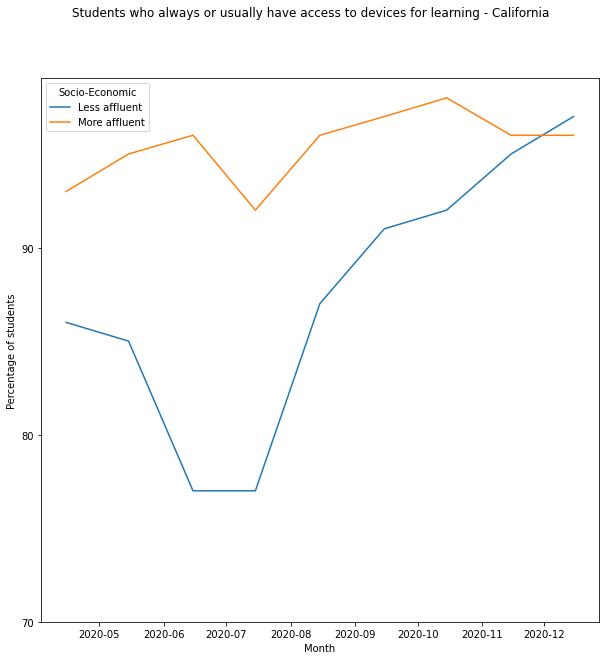

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(data= device_cali, x='Month', y='device_always_or_usually', hue='Socio-Economic')
plt.xlabel('Month')
plt.ylabel('Percentage of students')
plt.suptitle('Students who always or usually have access to devices for learning - California')
plt.yticks(range(70,100,10))

### Internet - Cali

In [ ]:
internet_cali = California[['Month', 'State', 'Socio-Economic', 'Internet always available for educational purposes', 'Internet usually available for educational purposes']]
internet_cali
internet_cali['internet_always_or_usually'] = (internet_cali['Internet always available for educational purposes'] + internet_cali['Internet usually available for educational purposes'])*100
internet_cali

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Month,State,Socio-Economic,Internet always available for educational purposes,Internet usually available for educational purposes,internet_always_or_usually
0,2020-04-15,California,Less affluent,0.67,0.26,93.0
1,2020-04-15,California,More affluent,0.84,0.13,97.0
2,2020-05-15,California,Less affluent,0.58,0.31,89.0
3,2020-05-15,California,More affluent,0.86,0.11,97.0
4,2020-06-15,California,Less affluent,0.57,0.26,83.0
5,2020-06-15,California,More affluent,0.75,0.20,95.0
6,2020-07-15,California,Less affluent,0.58,0.28,86.0
7,2020-07-15,California,More affluent,0.77,0.17,94.0
8,2020-08-15,California,Less affluent,0.59,0.29,88.0
9,2020-08-15,California,More affluent,0.83,0.15,98.0


In [ ]:
poorer = internet_cali[internet_cali['Socio-Economic'] == 'Less affluent']
poorer.rename(columns={'internet_always_or_usually': 'poor_internet_always'}, inplace=True)
poorer

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Month,State,Socio-Economic,Internet always available for educational purposes,Internet usually available for educational purposes,poor_internet_always
0,2020-04-15,California,Less affluent,0.67,0.26,93.0
2,2020-05-15,California,Less affluent,0.58,0.31,89.0
4,2020-06-15,California,Less affluent,0.57,0.26,83.0
6,2020-07-15,California,Less affluent,0.58,0.28,86.0
8,2020-08-15,California,Less affluent,0.59,0.29,88.0
10,2020-09-15,California,Less affluent,0.62,0.28,90.0
12,2020-10-15,California,Less affluent,0.72,0.19,91.0
14,2020-11-15,California,Less affluent,0.67,0.27,94.0
16,2020-12-15,California,Less affluent,0.65,0.29,94.0


In [ ]:
richer = internet_cali[internet_cali['Socio-Economic'] == 'More affluent']
richer.rename(columns={'internet_always_or_usually': 'rich_internet_always'}, inplace=True)
richer

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Month,State,Socio-Economic,Internet always available for educational purposes,Internet usually available for educational purposes,rich_internet_always
1,2020-04-15,California,More affluent,0.84,0.13,97.0
3,2020-05-15,California,More affluent,0.86,0.11,97.0
5,2020-06-15,California,More affluent,0.75,0.20,95.0
7,2020-07-15,California,More affluent,0.77,0.17,94.0
9,2020-08-15,California,More affluent,0.83,0.15,98.0
11,2020-09-15,California,More affluent,0.81,0.16,97.0
13,2020-10-15,California,More affluent,0.79,0.19,98.0
15,2020-11-15,California,More affluent,0.81,0.14,95.0
17,2020-12-15,California,More affluent,0.78,0.19,97.0


In [ ]:
gap_cali = pd.merge(richer,poorer, how='inner', on = 'Month')
gap_cali['Gap'] = gap_cali['rich_internet_always'] - gap_cali['poor_internet_always']
gap_cali

,Month,State_x,Socio-Economic_x,Internet always available for educational purposes_x,Internet usually available for educational purposes_x,rich_internet_always,State_y,Socio-Economic_y,Internet always available for educational purposes_y,Internet usually available for educational purposes_y,poor_internet_always,Gap
0,2020-04-15,California,More affluent,0.84,0.13,97.0,California,Less affluent,0.67,0.26,93.0,4.0
1,2020-05-15,California,More affluent,0.86,0.11,97.0,California,Less affluent,0.58,0.31,89.0,8.0
2,2020-06-15,California,More affluent,0.75,0.20,95.0,California,Less affluent,0.57,0.26,83.0,12.0
3,2020-07-15,California,More affluent,0.77,0.17,94.0,California,Less affluent,0.58,0.28,86.0,8.0
4,2020-08-15,California,More affluent,0.83,0.15,98.0,California,Less affluent,0.59,0.29,88.0,10.0
5,2020-09-15,California,More affluent,0.81,0.16,97.0,California,Less affluent,0.62,0.28,90.0,7.0
6,2020-10-15,California,More affluent,0.79,0.19,98.0,California,Less affluent,0.72,0.19,91.0,7.0
7,2020-11-15,California,More affluent,0.81,0.14,95.0,California,Less affluent,0.67,0.27,94.0,1.0
8,2020-12-15,California,More affluent,0.78,0.19,97.0,California,Less affluent,0.65,0.29,94.0,3.0


Text(0.5, 0.98, 'Students who always or usually have access to internet for learning - California')

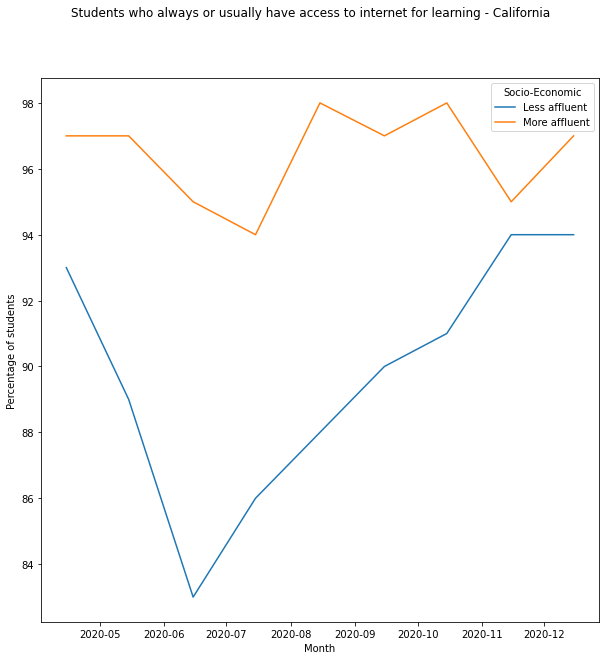

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(data= internet_cali, x='Month', y='internet_always_or_usually', hue='Socio-Economic')
plt.xlabel('Month')
plt.ylabel('Percentage of students')
plt.suptitle('Students who always or usually have access to internet for learning - California')

In [ ]:
# device_cali.to_csv(PATH_TO_DB+'Tableau/device_cali.csv', index=False)
# internet_cali.to_csv(PATH_TO_DB+'Tableau/internet_cali.csv', index=False)

### Device - Illinois

In [ ]:
Illinois = internet_comp[internet_comp['State'] == 'Illinois']
Illinois

,Month,State,Socio-Economic,Device always available for educational purposes,Device usually available for educational purposes,Device sometimes available for educational purposes,Device rarely available for educational purposes,Device never available for educational purposes,Internet always available for educational purposes,Internet usually available for educational purposes,Internet sometimes available for educational purposes,Internet rarely available for educational purposes,Internet never available for educational purposes,Unnamed: 13
18,2020-04-15,Illinois,Less affluent,0.61,0.24,0.04,0.04,0.07,0.58,0.20,0.12,0.08,0.02,NaN
19,2020-04-15,Illinois,More affluent,0.78,0.16,0.02,0.03,0.00,0.79,0.17,0.02,0.02,0.00,NaN
20,2020-05-15,Illinois,Less affluent,0.80,0.13,0.03,0.02,0.01,0.58,0.22,0.01,0.18,0.00,NaN
21,2020-05-15,Illinois,More affluent,0.77,0.18,0.04,0.01,0.00,0.76,0.18,0.06,0.00,0.00,NaN
22,2020-06-15,Illinois,Less affluent,0.57,0.12,0.22,0.00,0.07,0.60,0.17,0.16,0.01,0.06,NaN
23,2020-06-15,Illinois,More affluent,0.78,0.15,0.06,0.00,0.00,0.75,0.19,0.05,0.01,0.00,NaN
24,2020-07-15,Illinois,Less affluent,0.61,0.16,0.13,0.03,0.04,0.47,0.32,0.11,0.06,0.03,NaN
25,2020-07-15,Illinois,More affluent,0.75,0.22,0.03,0.00,0.00,0.77,0.20,0.03,0.00,0.00,NaN
26,2020-08-15,Illinois,Less affluent,0.58,0.24,0.11,0.05,0.02,0.59,0.26,0.15,0.01,0.00,NaN
27,2020-08-15,Illinois,More affluent,0.84,0.11,0.04,0.01,0.00,0.85,0.14,0.01,0.00,0.00,NaN


In [ ]:
device_illi = Illinois[['Month', 'State', 'Socio-Economic', 'Device always available for educational purposes', 'Device usually available for educational purposes']]
device_illi
device_illi['device_always_or_usually'] = (device_illi['Device always available for educational purposes'] + device_illi['Device usually available for educational purposes'])*100
device_illi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Month,State,Socio-Economic,Device always available for educational purposes,Device usually available for educational purposes,device_always_or_usually
18,2020-04-15,Illinois,Less affluent,0.61,0.24,85.0
19,2020-04-15,Illinois,More affluent,0.78,0.16,94.0
20,2020-05-15,Illinois,Less affluent,0.80,0.13,93.0
21,2020-05-15,Illinois,More affluent,0.77,0.18,95.0
22,2020-06-15,Illinois,Less affluent,0.57,0.12,69.0
23,2020-06-15,Illinois,More affluent,0.78,0.15,93.0
24,2020-07-15,Illinois,Less affluent,0.61,0.16,77.0
25,2020-07-15,Illinois,More affluent,0.75,0.22,97.0
26,2020-08-15,Illinois,Less affluent,0.58,0.24,82.0
27,2020-08-15,Illinois,More affluent,0.84,0.11,95.0


([<matplotlib.axis.YTick at 0x7fb4a2608690>,
 <a list of 3 Text major ticklabel objects>)

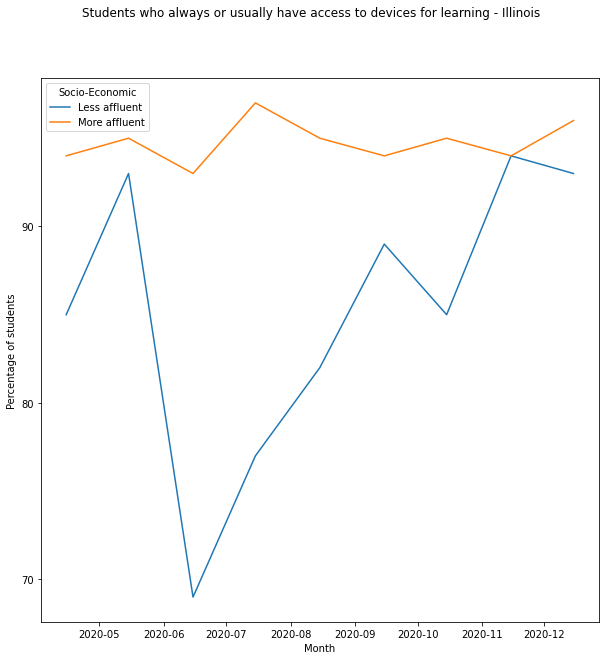

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(data= device_illi, x='Month', y='device_always_or_usually', hue='Socio-Economic')
plt.xlabel('Month')
plt.ylabel('Percentage of students')
plt.suptitle('Students who always or usually have access to devices for learning - Illinois')
plt.yticks(range(70,100,10))

### Internet - Illinois

In [ ]:
internet_illi = Illinois[['Month', 'State', 'Socio-Economic', 'Internet always available for educational purposes', 'Internet usually available for educational purposes']]
internet_illi 
internet_illi['internet_always_or_usually'] = (internet_illi['Internet always available for educational purposes'] + internet_illi['Internet usually available for educational purposes'])*100
internet_illi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Month,State,Socio-Economic,Internet always available for educational purposes,Internet usually available for educational purposes,internet_always_or_usually
18,2020-04-15,Illinois,Less affluent,0.58,0.20,78.0
19,2020-04-15,Illinois,More affluent,0.79,0.17,96.0
20,2020-05-15,Illinois,Less affluent,0.58,0.22,80.0
21,2020-05-15,Illinois,More affluent,0.76,0.18,94.0
22,2020-06-15,Illinois,Less affluent,0.60,0.17,77.0
23,2020-06-15,Illinois,More affluent,0.75,0.19,94.0
24,2020-07-15,Illinois,Less affluent,0.47,0.32,79.0
25,2020-07-15,Illinois,More affluent,0.77,0.20,97.0
26,2020-08-15,Illinois,Less affluent,0.59,0.26,85.0
27,2020-08-15,Illinois,More affluent,0.85,0.14,99.0


In [ ]:
richer_illi = internet_illi[internet_illi['Socio-Economic'] == 'More affluent']
richer_illi.rename(columns={'internet_always_or_usually': 'rich_internet_always'}, inplace=True)
richer_illi

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Month,State,Socio-Economic,Internet always available for educational purposes,Internet usually available for educational purposes,rich_internet_always
19,2020-04-15,Illinois,More affluent,0.79,0.17,96.0
21,2020-05-15,Illinois,More affluent,0.76,0.18,94.0
23,2020-06-15,Illinois,More affluent,0.75,0.19,94.0
25,2020-07-15,Illinois,More affluent,0.77,0.20,97.0
27,2020-08-15,Illinois,More affluent,0.85,0.14,99.0
29,2020-09-15,Illinois,More affluent,0.81,0.18,99.0
31,2020-10-15,Illinois,More affluent,0.85,0.11,96.0
33,2020-11-15,Illinois,More affluent,0.79,0.16,95.0
35,2020-12-15,Illinois,More affluent,0.85,0.14,99.0


In [ ]:
poor_illi = internet_illi[internet_illi['Socio-Economic'] == 'Less affluent']
poor_illi.rename(columns={'internet_always_or_usually': 'poor_internet_always'}, inplace=True)
poor_illi

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Month,State,Socio-Economic,Internet always available for educational purposes,Internet usually available for educational purposes,poor_internet_always
18,2020-04-15,Illinois,Less affluent,0.58,0.20,78.0
20,2020-05-15,Illinois,Less affluent,0.58,0.22,80.0
22,2020-06-15,Illinois,Less affluent,0.60,0.17,77.0
24,2020-07-15,Illinois,Less affluent,0.47,0.32,79.0
26,2020-08-15,Illinois,Less affluent,0.59,0.26,85.0
28,2020-09-15,Illinois,Less affluent,0.69,0.24,93.0
30,2020-10-15,Illinois,Less affluent,0.53,0.33,86.0
32,2020-11-15,Illinois,Less affluent,0.60,0.33,93.0
34,2020-12-15,Illinois,Less affluent,0.60,0.26,86.0


In [ ]:
gap_illi = pd.merge(richer_illi,poor_illi, how='inner', on = 'Month')
gap_illi['Gap'] = gap_illi['rich_internet_always'] - gap_illi['poor_internet_always']
gap_illi

,Month,State_x,Socio-Economic_x,Internet always available for educational purposes_x,Internet usually available for educational purposes_x,rich_internet_always,State_y,Socio-Economic_y,Internet always available for educational purposes_y,Internet usually available for educational purposes_y,poor_internet_always,Gap
0,2020-04-15,Illinois,More affluent,0.79,0.17,96.0,Illinois,Less affluent,0.58,0.20,78.0,18.0
1,2020-05-15,Illinois,More affluent,0.76,0.18,94.0,Illinois,Less affluent,0.58,0.22,80.0,14.0
2,2020-06-15,Illinois,More affluent,0.75,0.19,94.0,Illinois,Less affluent,0.60,0.17,77.0,17.0
3,2020-07-15,Illinois,More affluent,0.77,0.20,97.0,Illinois,Less affluent,0.47,0.32,79.0,18.0
4,2020-08-15,Illinois,More affluent,0.85,0.14,99.0,Illinois,Less affluent,0.59,0.26,85.0,14.0
5,2020-09-15,Illinois,More affluent,0.81,0.18,99.0,Illinois,Less affluent,0.69,0.24,93.0,6.0
6,2020-10-15,Illinois,More affluent,0.85,0.11,96.0,Illinois,Less affluent,0.53,0.33,86.0,10.0
7,2020-11-15,Illinois,More affluent,0.79,0.16,95.0,Illinois,Less affluent,0.60,0.33,93.0,2.0
8,2020-12-15,Illinois,More affluent,0.85,0.14,99.0,Illinois,Less affluent,0.60,0.26,86.0,13.0


([<matplotlib.axis.YTick at 0x7fb4a259d350>,
 <a list of 3 Text major ticklabel objects>)

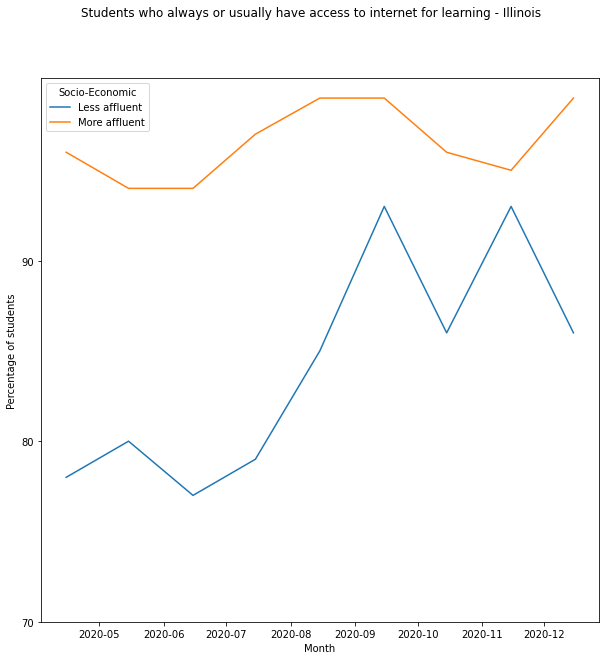

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(data= internet_illi, x='Month', y='internet_always_or_usually', hue='Socio-Economic')
plt.xlabel('Month')
plt.ylabel('Percentage of students')
plt.suptitle('Students who always or usually have access to internet for learning - Illinois')
plt.yticks(range(70,100,10))

In [ ]:
# device_illi.to_csv(PATH_TO_DB+'Tableau/device_illi.csv', index=False)
# internet_illi.to_csv(PATH_TO_DB+'Tableau/internet_illi.csv', index=False)

### Internet gap - Cali vs Illinois

In [ ]:
illi_internet_gap = gap_illi[['Month','State_x', 'Gap']]
illi_internet_gap

,Month,State_x,Gap
0,2020-04-15,Illinois,18.0
1,2020-05-15,Illinois,14.0
2,2020-06-15,Illinois,17.0
3,2020-07-15,Illinois,18.0
4,2020-08-15,Illinois,14.0
5,2020-09-15,Illinois,6.0
6,2020-10-15,Illinois,10.0
7,2020-11-15,Illinois,2.0
8,2020-12-15,Illinois,13.0


In [ ]:
illi_internet_gap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Month    9 non-null      datetime64[ns]
 1   State_x  9 non-null      object        
 2   Gap      9 non-null      float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 288.0+ bytes


In [ ]:
cali_internet_gap = gap_cali[['Month','State_x', 'Gap']]
cali_internet_gap

,Month,State_x,Gap
0,2020-04-15,California,4.0
1,2020-05-15,California,8.0
2,2020-06-15,California,12.0
3,2020-07-15,California,8.0
4,2020-08-15,California,10.0
5,2020-09-15,California,7.0
6,2020-10-15,California,7.0
7,2020-11-15,California,1.0
8,2020-12-15,California,3.0


In [ ]:
cali_internet_gap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Month    9 non-null      datetime64[ns]
 1   State_x  9 non-null      object        
 2   Gap      9 non-null      float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 288.0+ bytes


In [ ]:
internet_gap = pd.concat([illi_internet_gap,cali_internet_gap], axis=0, ignore_index=True)
internet_gap

,Month,State_x,Gap
0,2020-04-15,Illinois,18.0
1,2020-05-15,Illinois,14.0
2,2020-06-15,Illinois,17.0
3,2020-07-15,Illinois,18.0
4,2020-08-15,Illinois,14.0
5,2020-09-15,Illinois,6.0
6,2020-10-15,Illinois,10.0
7,2020-11-15,Illinois,2.0
8,2020-12-15,Illinois,13.0
9,2020-04-15,California,4.0


In [ ]:
internet_gap.rename(columns={'State_x':'State'},inplace=True)
internet_gap['Month'] = internet_gap['Month'].astype(str)

In [ ]:
# plt.figure(figsize=(10,10))
# sns.lineplot(data= illi_internet_gap, x='Month', y = 'Gap', color = 'magenta')
# plt.twinx()
# sns.lineplot(data= cali_internet_gap, x='Month', y = 'Gap', color = 'green')
# plt.suptitle('Internet access gap between more affluent and less affluent groups in California and Illinois')

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

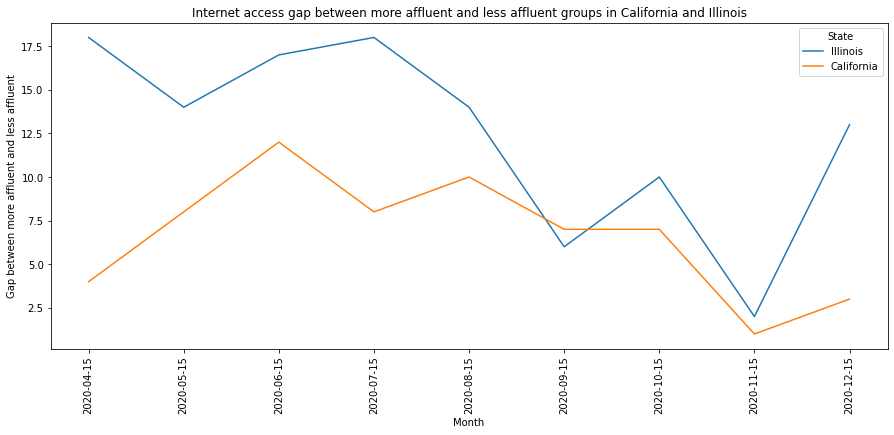

In [ ]:
plt.figure(figsize=(15, 6))
plt.title('Internet access gap between more affluent and less affluent groups in California and Illinois')
sns.lineplot(data=internet_gap,
             x = 'Month',
             y = 'Gap',
             hue = 'State')
plt.xlabel('Month')
plt.ylabel('Gap between more affluent and less affluent')
plt.xticks(rotation=90)

### Device gap - Cali vs Illinois

In [ ]:
richer_illi_device = device_illi[device_illi['Socio-Economic'] == 'More affluent']
richer_illi_device.rename(columns={'device_always_or_usually': 'rich_device_always'}, inplace=True)
richer_illi_device

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Month,State,Socio-Economic,Device always available for educational purposes,Device usually available for educational purposes,rich_device_always
19,2020-04-15,Illinois,More affluent,0.78,0.16,94.0
21,2020-05-15,Illinois,More affluent,0.77,0.18,95.0
23,2020-06-15,Illinois,More affluent,0.78,0.15,93.0
25,2020-07-15,Illinois,More affluent,0.75,0.22,97.0
27,2020-08-15,Illinois,More affluent,0.84,0.11,95.0
29,2020-09-15,Illinois,More affluent,0.84,0.10,94.0
31,2020-10-15,Illinois,More affluent,0.88,0.07,95.0
33,2020-11-15,Illinois,More affluent,0.83,0.11,94.0
35,2020-12-15,Illinois,More affluent,0.88,0.08,96.0


In [ ]:
poorer_illi_device = device_illi[device_illi['Socio-Economic'] == 'Less affluent']
poorer_illi_device.rename(columns={'device_always_or_usually': 'poor_device_always'}, inplace=True)
poorer_illi_device

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Month,State,Socio-Economic,Device always available for educational purposes,Device usually available for educational purposes,poor_device_always
18,2020-04-15,Illinois,Less affluent,0.61,0.24,85.0
20,2020-05-15,Illinois,Less affluent,0.80,0.13,93.0
22,2020-06-15,Illinois,Less affluent,0.57,0.12,69.0
24,2020-07-15,Illinois,Less affluent,0.61,0.16,77.0
26,2020-08-15,Illinois,Less affluent,0.58,0.24,82.0
28,2020-09-15,Illinois,Less affluent,0.68,0.21,89.0
30,2020-10-15,Illinois,Less affluent,0.68,0.17,85.0
32,2020-11-15,Illinois,Less affluent,0.76,0.18,94.0
34,2020-12-15,Illinois,Less affluent,0.77,0.16,93.0


In [ ]:
gap_illi_device = pd.merge(richer_illi_device, poorer_illi_device, how='inner', on = 'Month')
gap_illi_device['Gap'] = gap_illi_device['rich_device_always'] - gap_illi_device['poor_device_always']
gap_illi_device

,Month,State_x,Socio-Economic_x,Device always available for educational purposes_x,Device usually available for educational purposes_x,rich_device_always,State_y,Socio-Economic_y,Device always available for educational purposes_y,Device usually available for educational purposes_y,poor_device_always,Gap
0,2020-04-15,Illinois,More affluent,0.78,0.16,94.0,Illinois,Less affluent,0.61,0.24,85.0,9.0
1,2020-05-15,Illinois,More affluent,0.77,0.18,95.0,Illinois,Less affluent,0.80,0.13,93.0,2.0
2,2020-06-15,Illinois,More affluent,0.78,0.15,93.0,Illinois,Less affluent,0.57,0.12,69.0,24.0
3,2020-07-15,Illinois,More affluent,0.75,0.22,97.0,Illinois,Less affluent,0.61,0.16,77.0,20.0
4,2020-08-15,Illinois,More affluent,0.84,0.11,95.0,Illinois,Less affluent,0.58,0.24,82.0,13.0
5,2020-09-15,Illinois,More affluent,0.84,0.10,94.0,Illinois,Less affluent,0.68,0.21,89.0,5.0
6,2020-10-15,Illinois,More affluent,0.88,0.07,95.0,Illinois,Less affluent,0.68,0.17,85.0,10.0
7,2020-11-15,Illinois,More affluent,0.83,0.11,94.0,Illinois,Less affluent,0.76,0.18,94.0,0.0
8,2020-12-15,Illinois,More affluent,0.88,0.08,96.0,Illinois,Less affluent,0.77,0.16,93.0,3.0


In [ ]:
illi_device_gap = gap_illi_device[['Month','State_x', 'Gap']]
illi_device_gap

,Month,State_x,Gap
0,2020-04-15,Illinois,9.0
1,2020-05-15,Illinois,2.0
2,2020-06-15,Illinois,24.0
3,2020-07-15,Illinois,20.0
4,2020-08-15,Illinois,13.0
5,2020-09-15,Illinois,5.0
6,2020-10-15,Illinois,10.0
7,2020-11-15,Illinois,0.0
8,2020-12-15,Illinois,3.0


In [ ]:
device_cali = California[['Month', 'State', 'Socio-Economic', 'Device always available for educational purposes', 'Device usually available for educational purposes']]
device_cali
device_cali['device_always_or_usually'] = (device_cali['Device always available for educational purposes'] + device_cali['Device usually available for educational purposes'])*100
device_cali

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Month,State,Socio-Economic,Device always available for educational purposes,Device usually available for educational purposes,device_always_or_usually
0,2020-04-15,California,Less affluent,0.63,0.23,86.0
1,2020-04-15,California,More affluent,0.82,0.11,93.0
2,2020-05-15,California,Less affluent,0.52,0.33,85.0
3,2020-05-15,California,More affluent,0.84,0.11,95.0
4,2020-06-15,California,Less affluent,0.52,0.25,77.0
5,2020-06-15,California,More affluent,0.75,0.21,96.0
6,2020-07-15,California,Less affluent,0.57,0.20,77.0
7,2020-07-15,California,More affluent,0.76,0.16,92.0
8,2020-08-15,California,Less affluent,0.64,0.23,87.0
9,2020-08-15,California,More affluent,0.84,0.12,96.0


In [ ]:
richer_cali_device = device_cali[device_cali['Socio-Economic'] == 'More affluent']
richer_cali_device.rename(columns={'device_always_or_usually': 'rich_device_always'}, inplace=True)
richer_cali_device

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Month,State,Socio-Economic,Device always available for educational purposes,Device usually available for educational purposes,rich_device_always
1,2020-04-15,California,More affluent,0.82,0.11,93.0
3,2020-05-15,California,More affluent,0.84,0.11,95.0
5,2020-06-15,California,More affluent,0.75,0.21,96.0
7,2020-07-15,California,More affluent,0.76,0.16,92.0
9,2020-08-15,California,More affluent,0.84,0.12,96.0
11,2020-09-15,California,More affluent,0.89,0.08,97.0
13,2020-10-15,California,More affluent,0.92,0.06,98.0
15,2020-11-15,California,More affluent,0.86,0.10,96.0
17,2020-12-15,California,More affluent,0.84,0.12,96.0


In [ ]:
poorer_cali_device = device_cali[device_cali['Socio-Economic'] == 'Less affluent']
poorer_cali_device.rename(columns={'device_always_or_usually': 'poor_device_always'}, inplace=True)
poorer_cali_device

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Month,State,Socio-Economic,Device always available for educational purposes,Device usually available for educational purposes,poor_device_always
0,2020-04-15,California,Less affluent,0.63,0.23,86.0
2,2020-05-15,California,Less affluent,0.52,0.33,85.0
4,2020-06-15,California,Less affluent,0.52,0.25,77.0
6,2020-07-15,California,Less affluent,0.57,0.20,77.0
8,2020-08-15,California,Less affluent,0.64,0.23,87.0
10,2020-09-15,California,Less affluent,0.74,0.17,91.0
12,2020-10-15,California,Less affluent,0.84,0.08,92.0
14,2020-11-15,California,Less affluent,0.80,0.15,95.0
16,2020-12-15,California,Less affluent,0.72,0.25,97.0


In [ ]:
gap_cali_device = pd.merge(richer_cali_device, poorer_cali_device, how='inner', on = 'Month')
gap_cali_device['Gap'] = gap_cali_device['rich_device_always'] - gap_cali_device['poor_device_always']
gap_cali_device

,Month,State_x,Socio-Economic_x,Device always available for educational purposes_x,Device usually available for educational purposes_x,rich_device_always,State_y,Socio-Economic_y,Device always available for educational purposes_y,Device usually available for educational purposes_y,poor_device_always,Gap
0,2020-04-15,California,More affluent,0.82,0.11,93.0,California,Less affluent,0.63,0.23,86.0,7.0
1,2020-05-15,California,More affluent,0.84,0.11,95.0,California,Less affluent,0.52,0.33,85.0,10.0
2,2020-06-15,California,More affluent,0.75,0.21,96.0,California,Less affluent,0.52,0.25,77.0,19.0
3,2020-07-15,California,More affluent,0.76,0.16,92.0,California,Less affluent,0.57,0.20,77.0,15.0
4,2020-08-15,California,More affluent,0.84,0.12,96.0,California,Less affluent,0.64,0.23,87.0,9.0
5,2020-09-15,California,More affluent,0.89,0.08,97.0,California,Less affluent,0.74,0.17,91.0,6.0
6,2020-10-15,California,More affluent,0.92,0.06,98.0,California,Less affluent,0.84,0.08,92.0,6.0
7,2020-11-15,California,More affluent,0.86,0.10,96.0,California,Less affluent,0.80,0.15,95.0,1.0
8,2020-12-15,California,More affluent,0.84,0.12,96.0,California,Less affluent,0.72,0.25,97.0,-1.0


In [ ]:
cali_device_gap = gap_cali_device[['Month','State_x', 'Gap']]
cali_device_gap

,Month,State_x,Gap
0,2020-04-15,California,7.0
1,2020-05-15,California,10.0
2,2020-06-15,California,19.0
3,2020-07-15,California,15.0
4,2020-08-15,California,9.0
5,2020-09-15,California,6.0
6,2020-10-15,California,6.0
7,2020-11-15,California,1.0
8,2020-12-15,California,-1.0


In [ ]:
device_gap = pd.concat([illi_device_gap,cali_device_gap], axis=0, ignore_index=True)
device_gap

,Month,State_x,Gap
0,2020-04-15,Illinois,9.0
1,2020-05-15,Illinois,2.0
2,2020-06-15,Illinois,24.0
3,2020-07-15,Illinois,20.0
4,2020-08-15,Illinois,13.0
5,2020-09-15,Illinois,5.0
6,2020-10-15,Illinois,10.0
7,2020-11-15,Illinois,0.0
8,2020-12-15,Illinois,3.0
9,2020-04-15,California,7.0


In [ ]:
device_gap.rename(columns={'State_x':'State'},inplace=True)
device_gap['Month'] = device_gap['Month'].astype(str)

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

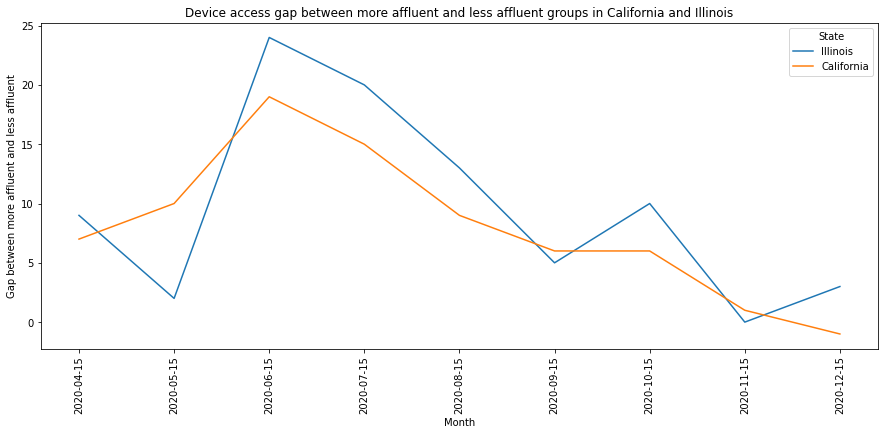

In [ ]:
fig = plt.figure(figsize=(15, 6))
plt.title('Device access gap between more affluent and less affluent groups in California and Illinois')
sns.lineplot(data=device_gap,
             x = 'Month',
             y = 'Gap',
             hue = 'State')
plt.xlabel('Month')
plt.ylabel('Gap between more affluent and less affluent')
plt.xticks(rotation=90)

In [ ]:
# internet_gap.to_csv(PATH_TO_DB+'Tableau/internet_gap.csv', index=False)
# device_gap.to_csv(PATH_TO_DB+'Tableau/device_gap.csv', index=False)

## Count district id per state

In [ ]:
engagement_product = pd.read_csv(PATH_TO_DB+'Tableau/engagement_product.csv')
engagement_product

,cw,district_id,engagement_index,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw,new_pct_black/hispanic,new_pct_free/reduced,new_pp_total_raw,state_initial,avg_poverty,avg_no_comp,avg_no_internet,avg_home_broad,avg_broad_avail,avg_access_bbn,product number,Socio-Economic
0,1,1000,60677.44,Connecticut,Suburb,"[0.6, 0.8[","[0.2, 0.4[",NaN,0.7,0.3,NaN,CT,0.100204,0.103784,0.157293,0.838444,0.991412,0.993728,250,More affluent
1,1,1044,10626.68,Missouri,Suburb,"[0, 0.2[","[0, 0.2[","[10000, 12000[",0.1,0.1,11000.0,MO,0.141723,0.126083,0.217449,0.777118,0.608562,0.930155,221,More affluent
2,1,1052,5948.92,Illinois,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[16000, 18000[",0.3,0.3,17000.0,IL,0.130527,0.115315,0.187288,0.808061,0.760500,0.968503,77,More affluent
3,1,1142,605.35,Connecticut,Rural,"[0, 0.2[","[0.2, 0.4[",NaN,0.1,0.3,NaN,CT,0.100204,0.103784,0.157293,0.838444,0.991412,0.993728,58,More affluent
4,1,1204,851.68,Utah,Suburb,"[0, 0.2[","[0, 0.2[","[6000, 8000[",0.1,0.1,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.961070,0.983970,54,More affluent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5931,53,9553,27735.60,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000[",0.1,0.1,15000.0,IL,0.130527,0.115315,0.187288,0.808061,0.760500,0.968503,195,More affluent
5932,53,9589,17788.84,Connecticut,Suburb,"[0.2, 0.4[","[0.2, 0.4[",NaN,0.3,0.3,NaN,CT,0.100204,0.103784,0.157293,0.838444,0.991412,0.993728,195,More affluent
5933,53,9778,9460.76,Utah,Town,"[0, 0.2[","[0.4, 0.6[","[8000, 10000[",0.1,0.5,9000.0,UT,0.103676,0.055116,0.137981,0.857276,0.961070,0.983970,156,More affluent
5934,53,9812,31664.93,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[6000, 8000[",0.1,0.3,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.961070,0.983970,280,More affluent


In [ ]:
len(engagement_product['state'].unique())

15

In [ ]:
district_count = engagement_product.groupby('state')['district_id'].nunique().reset_index().sort_values(by='district_id', ascending=False)
district_count

,state,district_id
1,Connecticut,29
12,Utah,24
3,Illinois,13
0,California,9
11,Ohio,8
6,Missouri,6
4,Indiana,5
14,Washington,4
10,North Carolina,3
13,Virginia,3


In [ ]:
district_count['district_id'].sum()

112

Text(0, 0.5, 'Number of school districts')

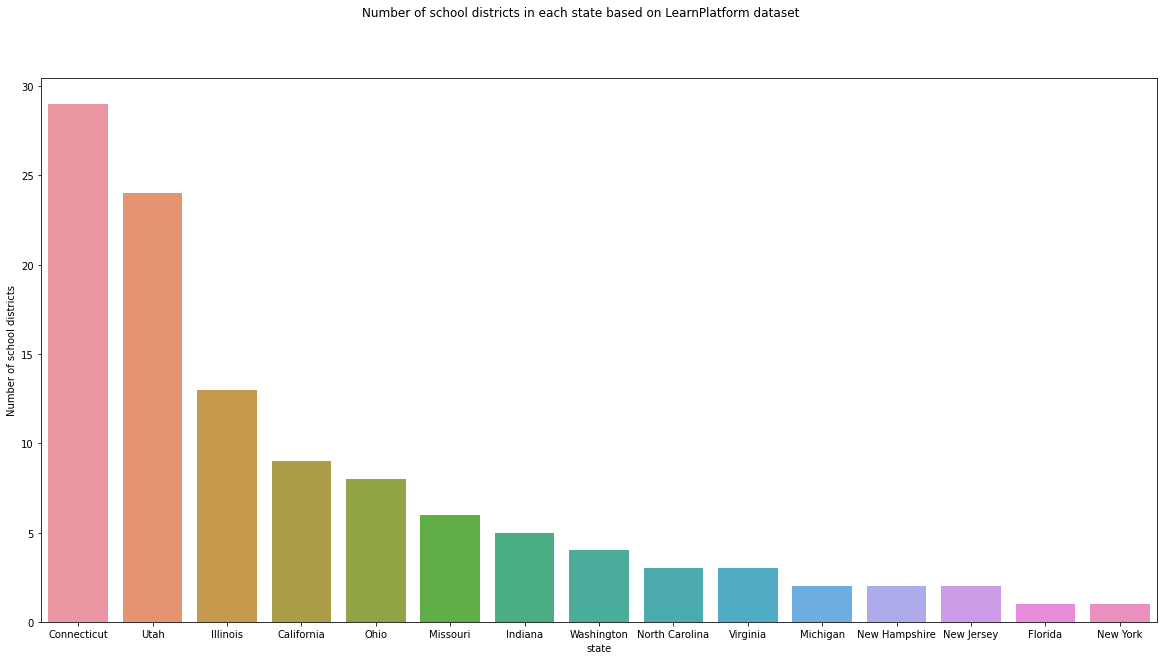

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.barplot(data=district_count, x='state', y='district_id')
plt.suptitle('Number of school districts in each state based on LearnPlatform dataset')
plt.ylabel('Number of school districts')

## Broadband availability

In [ ]:
district_state = pd.read_csv('/content/drive/MyDrive/Data Science 02.22/FINAL PROJECT - COVID LEARNING/district_state.csv')
district_state

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw,new_pct_black/hispanic,new_pct_free/reduced,new_pp_total_raw,state_initial,avg_poverty,avg_no_comp,avg_no_internet,avg_home_broad,avg_broad_avail,avg_access_bbn
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000[",0.1,0.1,15000.0,IL,0.130527,0.115315,0.187288,0.808061,0.760500,0.968503
1,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[6000, 8000[",0.1,0.3,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.961070,0.983970
2,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[10000, 12000[",0.1,0.1,11000.0,WI,NaN,NaN,NaN,NaN,NaN,NaN
3,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[6000, 8000[",0.1,0.5,7000.0,UT,0.103676,0.055116,0.137981,0.857276,0.961070,0.983970
4,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[8000, 10000[",0.3,0.3,9000.0,NC,0.153692,0.123827,0.210196,0.785462,0.766737,0.960590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[18000, 20000[",0.1,0.5,19000.0,NY,0.146110,0.117105,0.186727,0.809456,0.655982,0.988170
172,8103,Tennessee,Rural,"[0.2, 0.4[",NaN,"[8000, 10000[",0.3,NaN,9000.0,TN,NaN,NaN,NaN,NaN,NaN,NaN
173,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[12000, 14000[",0.1,0.5,13000.0,VA,0.109704,0.096915,0.168780,0.826518,0.783526,0.936789
174,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[",NaN,0.7,0.7,NaN,CA,0.143044,0.083924,0.150233,0.845930,0.956689,0.986406


In [ ]:
broadband_avail = district_state[district_state['state'].isin(['Illinois', 'California'])].groupby('state')['avg_broad_avail'].mean().reset_index()
broadband_avail 

,state,avg_broad_avail
0,California,0.956689
1,Illinois,0.760500


In [ ]:
comp_avail = district_state[district_state['state'].isin(['Illinois', 'California'])].groupby('state')['avg_no_comp'].mean().reset_index()
comp_avail['with_comp'] = 1- comp_avail['avg_no_comp'] 
comp_avail

,state,avg_no_comp,with_comp
0,California,0.083924,0.916076
1,Illinois,0.115315,0.884685


In [ ]:
# comp_avail.to_csv(PATH_TO_DB+'Tableau/comp_avail.csv', index=False)
# broadband_avail.to_csv(PATH_TO_DB+'Tableau/broadband_avail.csv', index=False)

Text(0.5, 0.98, 'Avarage device/computer availability for California and Illinois (as of December 2020)')

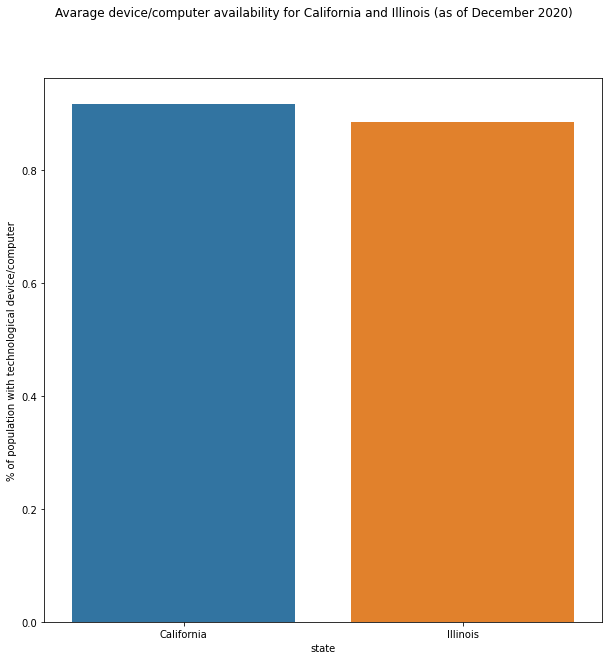

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.barplot(data=comp_avail, x='state', y='with_comp')
plt.ylabel('% of population with technological device/computer')
plt.suptitle('Avarage device/computer availability for California and Illinois (as of December 2020)')

Text(0.5, 0.98, 'Avarage broadband availability for California and Illinois (as of December 2020)')

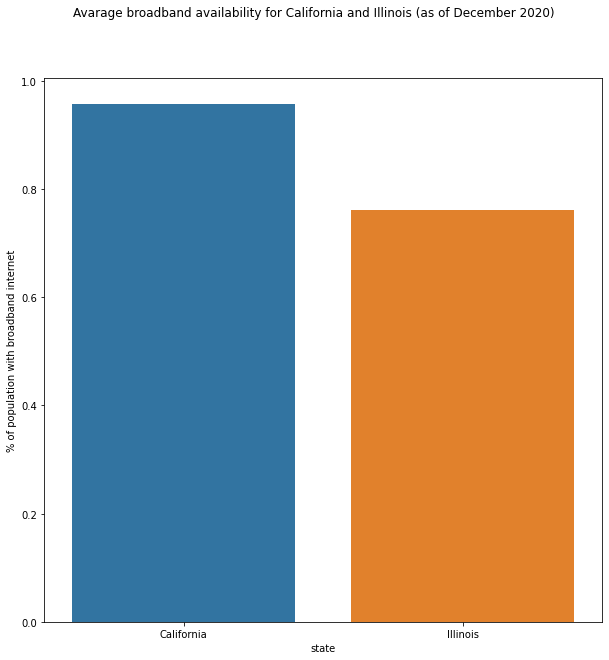

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.barplot(data=broadband_avail, x='state', y='avg_broad_avail')
plt.ylabel('% of population with broadband internet')
plt.suptitle('Avarage broadband availability for California and Illinois (as of December 2020)')

## Engagement gap & Internet gap - Illinois theo tháng

In [ ]:
engagement_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6610517 entries, 0 to 6610516
Data columns (total 28 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   time                    datetime64[ns]
 1   lp_id                   float64       
 2   pct_access              float64       
 3   engagement_index        float64       
 4   district_id             int64         
 5   cw                      int64         
 6   weekday                 int64         
 7   url                     object        
 8   product_name            object        
 9   provider/company_name   object        
 10  sector(s)               object        
 11  primary_function_main   object        
 12  primary_function_sub    object        
 13  state                   object        
 14  locale                  object        
 15  pct_black/hispanic      object        
 16  pct_free/reduced        object        
 17  pp_total_raw            object        
 18  ne

In [ ]:
engagement_full['time'] = pd.to_datetime(engagement_full['time'])

In [ ]:
engagement_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6610517 entries, 0 to 6610516
Data columns (total 28 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   time                    datetime64[ns]
 1   lp_id                   float64       
 2   pct_access              float64       
 3   engagement_index        float64       
 4   district_id             int64         
 5   cw                      int64         
 6   weekday                 int64         
 7   url                     object        
 8   product_name            object        
 9   provider/company_name   object        
 10  sector(s)               object        
 11  primary_function_main   object        
 12  primary_function_sub    object        
 13  state                   object        
 14  locale                  object        
 15  pct_black/hispanic      object        
 16  pct_free/reduced        object        
 17  pp_total_raw            object        
 18  ne

In [ ]:
engagement_full['month_year']= engagement_full['time'].dt.to_period('M')

In [ ]:
engagement_full['month_year'].unique()

<PeriodArray>
['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07',
 '2020-08', '2020-09', '2020-10', '2020-11', '2020-12']
Length: 12, dtype: period[M]

In [ ]:
engagement_full = engagement_full[engagement_full['cw'] <= 51]

In [ ]:
engagement_full['cw'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 28, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 24, 25, 26, 27, 29, 30, 31, 32, 33])

In [ ]:
engagement_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6467768 entries, 0 to 6610505
Data columns (total 29 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   time                    datetime64[ns]
 1   lp_id                   float64       
 2   pct_access              float64       
 3   engagement_index        float64       
 4   district_id             int64         
 5   cw                      int64         
 6   weekday                 int64         
 7   url                     object        
 8   product_name            object        
 9   provider/company_name   object        
 10  sector(s)               object        
 11  primary_function_main   object        
 12  primary_function_sub    object        
 13  state                   object        
 14  locale                  object        
 15  pct_black/hispanic      object        
 16  pct_free/reduced        object        
 17  pp_total_raw            object        
 18  ne

In [ ]:
product = engagement_full[['time', 'month_year', 'lp_id', 'engagement_index', 'pct_access','district_id', 'cw', 'state', 'locale', 'product_name', 'provider/company_name', 
                 'sector(s)','primary_function_sub','primary_function_main','new_pct_free/reduced']]

In [ ]:
product_monthly = product.groupby(['month_year', 'district_id', 'lp_id'])['engagement_index', 'pct_access'].agg({'engagement_index': 'mean', 'pct_access': 'mean'}).reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
district_state = pd.read_csv('/content/drive/MyDrive/Data Science 02.22/FINAL PROJECT - COVID LEARNING/district_state.csv')

In [ ]:
district_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   district_id             176 non-null    int64  
 1   state                   176 non-null    object 
 2   locale                  176 non-null    object 
 3   pct_black/hispanic      176 non-null    object 
 4   pct_free/reduced        148 non-null    object 
 5   pp_total_raw            118 non-null    object 
 6   new_pct_black/hispanic  176 non-null    float64
 7   new_pct_free/reduced    148 non-null    float64
 8   new_pp_total_raw        118 non-null    float64
 9   state_initial           176 non-null    object 
 10  avg_poverty             142 non-null    float64
 11  avg_no_comp             142 non-null    float64
 12  avg_no_internet         142 non-null    float64
 13  avg_home_broad          142 non-null    float64
 14  avg_broad_avail         142 non-null    fl

In [ ]:
def classify_social_economic(row):
    if row <0.7:
        return "More affluent"
    else: 
        return "Less affluent"

In [ ]:
district_state['Socio-Economic'] = district_state['new_pct_free/reduced'].apply(classify_social_economic)

In [ ]:
product_monthly_full = pd.merge(product_monthly, district_state[['district_id', 'state', 'Socio-Economic']], how = 'left', on = 'district_id')
product_monthly_full.head()

,month_year,district_id,lp_id,engagement_index,pct_access,state,Socio-Economic
0,2020-01,1000,10533.0,23.683448,0.246552,Connecticut,More affluent
1,2020-01,1000,10650.0,3.436957,0.074348,Connecticut,More affluent
2,2020-01,1000,10745.0,0.100000,0.010000,Connecticut,More affluent
3,2020-01,1000,11069.0,1.141667,0.025000,Connecticut,More affluent
4,2020-01,1000,11206.0,2.685455,0.136364,Connecticut,More affluent


In [ ]:
product_monthly_full = product_monthly_full[product_monthly_full['month_year'] >= '2020-04']

In [ ]:
product_monthly_full = product_monthly_full[product_monthly_full['state'] == 'Illinois']

In [ ]:
product_monthly_full['month_year'].unique()

<PeriodArray>
['2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10',
 '2020-11', '2020-12']
Length: 9, dtype: period[M]

In [ ]:
product_monthly_full.head()

,month_year,district_id,lp_id,engagement_index,pct_access,state,Socio-Economic
95171,2020-04,1052,10533.0,140.139000,1.132000,Illinois,More affluent
95172,2020-04,1052,10650.0,2.460667,0.090667,Illinois,More affluent
95173,2020-04,1052,10745.0,21.401923,0.192308,Illinois,More affluent
95174,2020-04,1052,11069.0,26.517143,0.324286,Illinois,More affluent
95175,2020-04,1052,11206.0,11.533043,0.361304,Illinois,More affluent


In [ ]:
ic1 = product_monthly_full.groupby(['month_year', 'district_id'])['engagement_index'].sum().reset_index()

ic2 = pd.merge(ic1, district_state, how = 'left', on = 'district_id')

ic3  = ic2.groupby(['month_year', 'Socio-Economic', 'state'])['engagement_index'].mean().reset_index()

ic3

,month_year,Socio-Economic,state,engagement_index
0,2020-04,Less affluent,Illinois,62798.989908
1,2020-04,More affluent,Illinois,83186.940469
2,2020-05,Less affluent,Illinois,35847.628733
3,2020-05,More affluent,Illinois,53086.946154
4,2020-06,Less affluent,Illinois,6112.915288
5,2020-06,More affluent,Illinois,10231.378951
6,2020-07,Less affluent,Illinois,4050.833245
7,2020-07,More affluent,Illinois,6428.609027
8,2020-08,Less affluent,Illinois,34684.220323
9,2020-08,More affluent,Illinois,35927.571517


In [ ]:
more_affluent_ic3 = ic3[ic3['Socio-Economic'] == 'More affluent']
less_affluent_ic3 = ic3[ic3['Socio-Economic'] == 'Less affluent']
less_affluent_ic3

,month_year,Socio-Economic,state,engagement_index
0,2020-04,Less affluent,Illinois,62798.989908
2,2020-05,Less affluent,Illinois,35847.628733
4,2020-06,Less affluent,Illinois,6112.915288
6,2020-07,Less affluent,Illinois,4050.833245
8,2020-08,Less affluent,Illinois,34684.220323
10,2020-09,Less affluent,Illinois,64234.600579
12,2020-10,Less affluent,Illinois,55941.504446
14,2020-11,Less affluent,Illinois,43526.148083
16,2020-12,Less affluent,Illinois,60493.438922


In [ ]:
engagement_gap_monthly_illy = pd.merge(more_affluent_ic3, less_affluent_ic3, how ='inner', on='month_year')
engagement_gap_monthly_illy

,month_year,Socio-Economic_x,state_x,engagement_index_x,Socio-Economic_y,state_y,engagement_index_y
0,2020-04,More affluent,Illinois,83186.940469,Less affluent,Illinois,62798.989908
1,2020-05,More affluent,Illinois,53086.946154,Less affluent,Illinois,35847.628733
2,2020-06,More affluent,Illinois,10231.378951,Less affluent,Illinois,6112.915288
3,2020-07,More affluent,Illinois,6428.609027,Less affluent,Illinois,4050.833245
4,2020-08,More affluent,Illinois,35927.571517,Less affluent,Illinois,34684.220323
5,2020-09,More affluent,Illinois,102429.948596,Less affluent,Illinois,64234.600579
6,2020-10,More affluent,Illinois,86833.611766,Less affluent,Illinois,55941.504446
7,2020-11,More affluent,Illinois,72675.383044,Less affluent,Illinois,43526.148083
8,2020-12,More affluent,Illinois,100576.104938,Less affluent,Illinois,60493.438922


In [ ]:
engagement_gap_monthly_illy['Monthly_engagement_gap'] = engagement_gap_monthly_illy['engagement_index_x'] - engagement_gap_monthly_illy['engagement_index_y']
engagement_gap_monthly_illy

,month_year,Socio-Economic_x,state_x,engagement_index_x,Socio-Economic_y,state_y,engagement_index_y,Monthly_engagement_gap
0,2020-04,More affluent,Illinois,83186.940469,Less affluent,Illinois,62798.989908,20387.950561
1,2020-05,More affluent,Illinois,53086.946154,Less affluent,Illinois,35847.628733,17239.317421
2,2020-06,More affluent,Illinois,10231.378951,Less affluent,Illinois,6112.915288,4118.463663
3,2020-07,More affluent,Illinois,6428.609027,Less affluent,Illinois,4050.833245,2377.775782
4,2020-08,More affluent,Illinois,35927.571517,Less affluent,Illinois,34684.220323,1243.351195
5,2020-09,More affluent,Illinois,102429.948596,Less affluent,Illinois,64234.600579,38195.348017
6,2020-10,More affluent,Illinois,86833.611766,Less affluent,Illinois,55941.504446,30892.107321
7,2020-11,More affluent,Illinois,72675.383044,Less affluent,Illinois,43526.148083,29149.234961
8,2020-12,More affluent,Illinois,100576.104938,Less affluent,Illinois,60493.438922,40082.666016


In [ ]:
engagement_gap_monthly_illy.rename(columns={'engagement_index_x': 'rich_engagement_index','engagement_index_y': 'poor_engagement_index'}, inplace=True)

In [ ]:
# # Illinois và Cali: 

# ic1 = product_monthly_full.groupby(['month_year', 'district_id'])['engagement_index'].sum().reset_index()

# ic2 = pd.merge(ic1, district_state, how = 'left', on = 'district_id')

# ic3  = ic2.groupby(['month_year', 'Socio-Economic', 'state'])['engagement_index'].mean().reset_index()

# ic3

# ic4 = pd.pivot_table(data = ic3, 
#                index = 'month_year', 
#                columns = ['Socio-Economic', 'state'], 
#                values = 'engagement_index').reset_index()
# ic4.columns

# ic4.columns = ['month_year', 'less_affluent_ill', 'more_affluent_ill']
# # ic4['diff_cali'] = ic4['more_affluent_cali'] - ic4['less_affluent_cali']
# ic4['diff_ill'] = ic4['more_affluent_ill'] - ic4['less_affluent_ill']

In [ ]:
engagement_gap_monthly_illy['month_year'] = engagement_gap_monthly_illy['month_year'].astype(str)

In [ ]:
# Internet gap Illinois: 
gap_illi = pd.merge(richer_illi,poor_illi, how='inner', on = 'Month')
gap_illi['Gap'] = gap_illi['rich_internet_always'] - gap_illi['poor_internet_always']
gap_illi

,Month,State_x,Socio-Economic_x,Internet always available for educational purposes_x,Internet usually available for educational purposes_x,rich_internet_always,State_y,Socio-Economic_y,Internet always available for educational purposes_y,Internet usually available for educational purposes_y,poor_internet_always,Gap
0,2020-04-15,Illinois,More affluent,0.79,0.17,96.0,Illinois,Less affluent,0.58,0.20,78.0,18.0
1,2020-05-15,Illinois,More affluent,0.76,0.18,94.0,Illinois,Less affluent,0.58,0.22,80.0,14.0
2,2020-06-15,Illinois,More affluent,0.75,0.19,94.0,Illinois,Less affluent,0.60,0.17,77.0,17.0
3,2020-07-15,Illinois,More affluent,0.77,0.20,97.0,Illinois,Less affluent,0.47,0.32,79.0,18.0
4,2020-08-15,Illinois,More affluent,0.85,0.14,99.0,Illinois,Less affluent,0.59,0.26,85.0,14.0
5,2020-09-15,Illinois,More affluent,0.81,0.18,99.0,Illinois,Less affluent,0.69,0.24,93.0,6.0
6,2020-10-15,Illinois,More affluent,0.85,0.11,96.0,Illinois,Less affluent,0.53,0.33,86.0,10.0
7,2020-11-15,Illinois,More affluent,0.79,0.16,95.0,Illinois,Less affluent,0.60,0.33,93.0,2.0
8,2020-12-15,Illinois,More affluent,0.85,0.14,99.0,Illinois,Less affluent,0.60,0.26,86.0,13.0


In [ ]:
gap_illi['Month']= gap_illi['Month'].dt.to_period('M')

In [ ]:
gap_illi['Month'] = gap_illi['Month'].astype(str)

In [ ]:
# engagement_gap_monthly_illy.to_csv(PATH_TO_DB+'Tableau/engagement_gap_monthly_illy.csv', index=False)
# gap_illi.to_csv(PATH_TO_DB+'Tableau/gap_illi.csv', index=False)

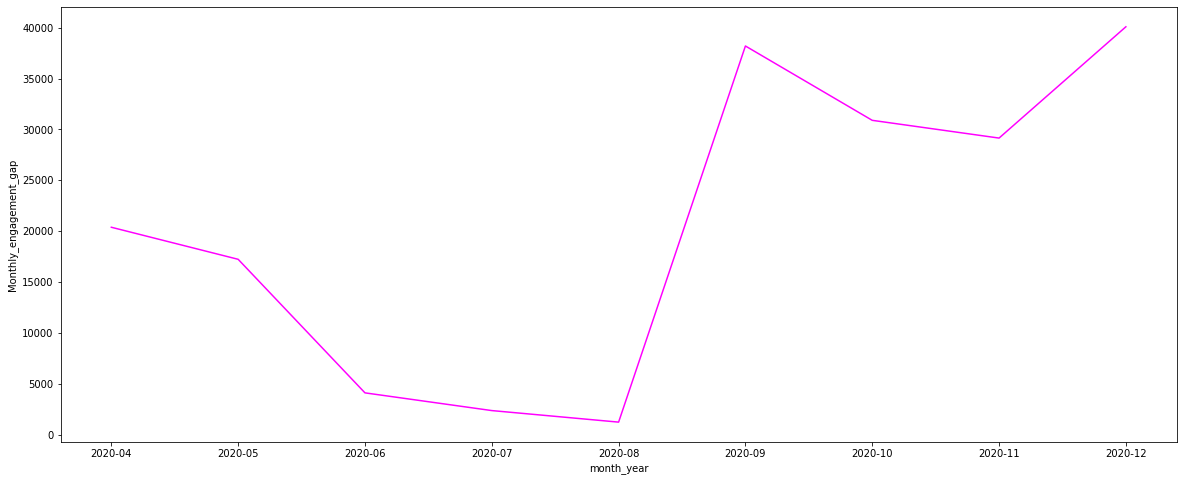

In [ ]:
# Plot engagement_index gap over time in Illinois: 
plt.figure(figsize=(20,8))
sns.lineplot(data=engagement_gap_monthly_illy, x='month_year', y ='Monthly_engagement_gap', color = 'Magenta')
# plt.twinx()
# sns.lineplot(data=gap_illi, x='Month', y ='Gap', color = 'Green')

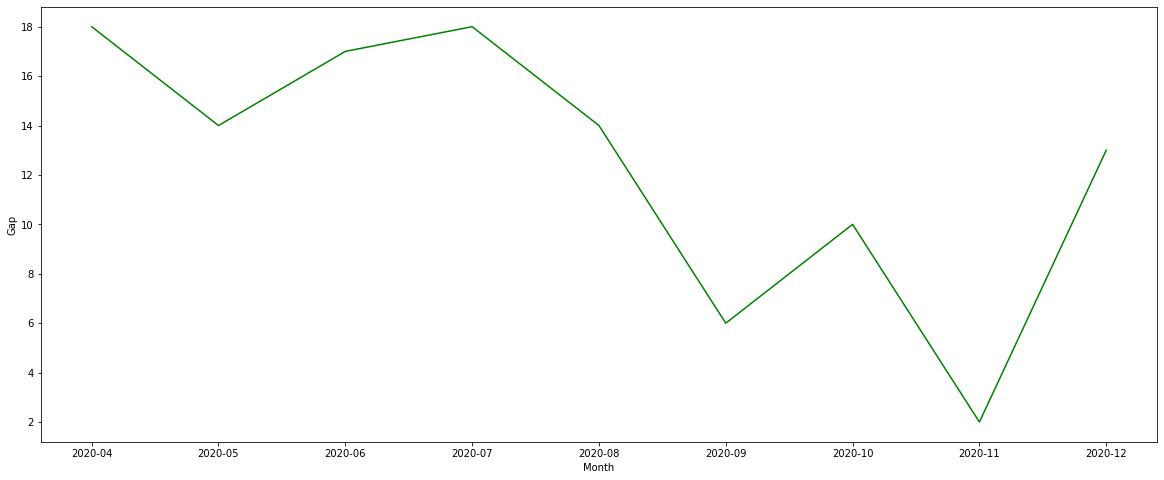

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=gap_illi, x='Month', y ='Gap', color = 'Green')

# VII. References

1.   National School Lunch Program
https://www.ers.usda.gov/topics/food-nutrition-assistance/child-nutrition-programs/national-school-lunch-program/
https://aspe.hhs.gov/topics/poverty-economic-mobility/poverty-guidelines/prior-hhs-poverty-guidelines-federal-register-references/2020-poverty-guidelines

2.   Illinois school closure policy : https://www.fox32chicago.com/news/illinois-shuts-down-all-schools-due-to-coronavirus
https://www.nbcchicago.com/news/local/illinois-schools-to-remain-closed-to-on-site-learning-through-april-30/2248015/

3. Illinois school closure timeline: 
https://ballotpedia.org/School_responses_in_Illinois_to_the_coronavirus_(COVID-19)_pandemic#cite_note-IL417-18

4. California school closure policy: 
https://calmatters.org/health/coronavirus/2020/03/california-coronavirus-half-of-californians-gavin-newsom-donald-trump/

5. Californian school closure timeline: 
https://ballotpedia.org/School_responses_in_California_to_the_coronavirus_(COVID-19)_pandemic

6. Importance of broadband service: 
https://www.pewtrusts.org/en/research-and-analysis/articles/2020/11/30/how-much-broadband-speed-do-americans-need

https://heytutor.com/resources/blog/states-with-the-best-internet-access-for-online-learning/

7. Problem of providing broadband Internet:
https://www.illinoistimes.com/springfield/congress-fails-schoolkids-struggling-to-learn-online/Content?oid=13815825

8. Cali’s Bringing the Digital Divide Fund:
https://www.cde.ca.gov/nr/ne/yr20/yr20rel21.asp

9. Illinois releases wifi hostpot map of 200 hotspots for students 
https://www.kwqc.com/content/news/Pritzker-administration-releases-WiFi-hotspot-map-to-support-Illinois-students--569734011.html

10. California supporting Internet plans for students 
https://www.cde.ca.gov/ls/he/hn/availableinternetplans.asp

11. Quotes from Michael K.Powell
https://www.huffpost.com/entry/broadband-internet-keeps_b_447825

12. Internet & Device access in  the US, including California and Illinois: 
https://www.census.gov/programs-surveys/household-pulse-survey/data.html

13. Internet speed dequate for online learning is 25/3 Mpbs:
https://www.commonsensemedia.org/sites/default/files/featured-content/files/common_sense_media_report_final_7_1_3pm_web.pdf
https://www.commonsensemedia.org/sites/default/files/featured-content/files/common_sense_media_partner_report_final.pdf (page 8) 

14. McKinsey - GDP loss: 
https://www.mckinsey.com/industries/education/our-insights/covid-19-and-student-learning-in-the-united-states-the-hurt-could-last-a-lifetime

15. AT& T Internet support internate packages: 
https://www.citizensutilityboard.org/att-offers-10month-high-speed-internet-low-income-families/#:~:text=AT%26T's%20%E2%80%9CAccess%E2%80%9D%20program%20provides%20qualifying,wireline%20Internet%20service%20in%20Illinois.

16. Private internet company support during pandemic: 
https://www.citizensutilityboard.org/blog/2020/03/19/cubs-guide-utility-services-during-the-covid-19-public-health-emergency/

17. Additional reading: 

https://hbr.org/2021/07/how-to-close-the-digital-divide-in-the-u-s

https://www.pewresearch.org/fact-tank/2021/06/22/digital-divide-persists-even-as-americans-with-lower-incomes-make-gains-in-tech-adoption/

https://www.chalkbeat.org/2020/6/26/21304405/surveys-remote-learning-coronavirus-success-failure-teachers-parents

https://www.fcc.gov/broadbandbenefit

https://www.latimes.com/california/story/2020-08-13/online-learning-fails-low-income-students-covid-19-left-behind-project
